# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* **Booking_ID**: unique identifier of each booking
* **no_of_adults**: Number of adults
* **no_of_children**: Number of Children
* **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan**: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year**: Year of arrival date
* **arrival_month**: Month of arrival date
* **arrival_date**: Date of the month
* **market_segment_type**: Market segment designation.
* **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status**: Flag indicating if the booking was canceled or not.

## Importing Libraries

In [ ]:
# Installing the libraries with the specified version.
# Commented out because the libraries are already installed for me.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Filter  warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to help with statistical analysis
import scipy.stats as stats
from scipy.stats import norm

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Library to assess model metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading the Dataset

In [ ]:
# Load Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define path to data file
path = r'/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/4-Supervised Machine Learning Classification/Project 4/'
df = pd.read_csv(path + 'INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Check the shape of the data
df.shape
print('The data set has', df.shape[0], 'rows', 'and', df.shape[1], 'columns')

The data set has 36275 rows and 19 columns


In [ ]:
# Check the dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Iterate through each column and determine its data type

# Calculate number of rows and columns
num_rows, num_cols = df.shape

# Initialize dictionary to store counts of each data type
data_type_counts = {}

# Iterate through each column and determine its data type
for col in df.columns:
    data_type = str(df[col].dtype)
    if data_type in data_type_counts:
        data_type_counts[data_type] += 1
    else:
        data_type_counts[data_type] = 1

# Print summary information
print(f'The data has {num_rows} rows and {num_cols} columns (series) total:')
print()
for dtype, count in data_type_counts.items():
    print(f'*   {count} columns of type {dtype}')

The data has 36275 rows and 19 columns (series) total:

*   5 columns of type object
*   13 columns of type int64
*   1 columns of type float64


In [ ]:
# Check for null values
df.isnull()

# No nulls exist in this dataset.

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0           False         False           False                 False   
1           False         False           False                 False   
2           False         False           False                 False   
3           False         False           False                 False   
4           False         False           False                 False   
...           ...           ...             ...                   ...   
36270       False         False           False                 False   
36271       False         False           False                 False   
36272       False         False           False                 False   
36273       False         False           False                 False   
36274       False         False           False                 False   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  False              False                       False   
1                  False              False                       False   
2                  False              False                       False   
3                  False              False                       False   
4                  False              False                       False   
...                  ...                ...                         ...   
36270              False              False                       False   
36271              False              False                       False   
36272              False              False                       False   
36273              False              False                       False   
36274              False              False                       False   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                   False      False         False          False   
1                   False      False         False          False   
2                   False      False         False          False   
3                   False      False         False          False   
4                   False      False         False          False   
...                   ...        ...           ...            ...   
36270               False      False         False          False   
36271               False      False         False          False   
36272               False      False         False          False   
36273               False      False         False          False   
36274               False      False         False          False   

       arrival_date  market_segment_type  repeated_guest  \
0             False                False           False   
1             False                False           False   
2             False                False           False   
3             False                False           False   
4             False                False           False   
...             ...                  ...             ...   
36270         False                False           False   
36271         False                False           False   
36272         False                False           False   
36273         False                False           False   
36274         False                False           False   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                             False                                 False   
4                             False                                 False   
...                             ...                                   ...   
36270                         False                                 False   
36271                         False                            

In [ ]:
# Retrieve and preview the categorial column values, using a list.
# Create numerical and categorical column lists
list_catcol = df.select_dtypes(include=['object']).columns.to_list()
list_numcol = df.select_dtypes(exclude=['object']).columns.to_list()

# Use a for loop to show the counts and percent contribution of each categorical column.
for col in list_catcol:
  print(f'\n***** {col} *****')
  print('\nPreview counts for:',df[col].value_counts())
  print('\nPreview % breakdown for:',df[col].value_counts(normalize=True))


***** Booking_ID *****

Preview counts for: Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64

Preview % breakdown for: Booking_ID
INN00001    0.000028
INN24187    0.000028
INN24181    0.000028
INN24182    0.000028
INN24183    0.000028
              ...   
INN12086    0.000028
INN12085    0.000028
INN12084    0.000028
INN12083    0.000028
INN36275    0.000028
Name: proportion, Length: 36275, dtype: float64

***** type_of_meal_plan *****

Preview counts for: type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

Preview % breakdown for: type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64

***** room_type_reserved *****

Preview counts for: room_type_reserved


In [ ]:
# Check counts, unique counts and duplicate values for each column. Based on this, we can decide how to approach each variable.

# Create a dictionary to store series unique values for categorical variables
series_values = {}

# Since we have some numerical values that are not continuous data, we need to inspect each column
for col in df.columns:
    # Calculate the number of duplicate values
    duplicate_count = df[col].count() - df[col].nunique()

    print('\nSeries', col, 'has', df[col].nunique(), 'unique values and', duplicate_count, 'duplicates.' )

    # Let's store a series in the dictionary for any column with less than 25 unique values - for this particuar dataset 25 will work)
    if df[col].nunique() < 25:
        # Store unique values in dictionary with column name as key
        series_values[col] = list(df[col].unique())
        print('    Unique values for', col, ':', series_values[col])


Series Booking_ID has 36275 unique values and 0 duplicates.

Series no_of_adults has 5 unique values and 36270 duplicates.
    Unique values for no_of_adults : [2, 1, 3, 0, 4]

Series no_of_children has 6 unique values and 36269 duplicates.
    Unique values for no_of_children : [0, 2, 1, 3, 10, 9]

Series no_of_weekend_nights has 8 unique values and 36267 duplicates.
    Unique values for no_of_weekend_nights : [1, 2, 0, 4, 3, 6, 5, 7]

Series no_of_week_nights has 18 unique values and 36257 duplicates.
    Unique values for no_of_week_nights : [2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8, 14, 12, 17, 16]

Series type_of_meal_plan has 4 unique values and 36271 duplicates.
    Unique values for type_of_meal_plan : ['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']

Series required_car_parking_space has 2 unique values and 36273 duplicates.
    Unique values for required_car_parking_space : [0, 1]

Series room_type_reserved has 7 unique values and 36268 duplicates.
    Uniq

In [ ]:
# Preview the data characteristics for numerical columns
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [ ]:
# Preview the data
df

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

**OBSERVATIONS**

The data has 36275 rows and 19 columns (series) total, and covers 2 years of data.

*   5 columns of type object
*   13 columns of type int64
*   1 columns of type float64

No null values exist in the dataset, so we do not need to perform NaN or fillna.() activities.

The average_price_per_room and lead_time data both have a very wide range, and  average_price_per_room has a minimum value of 0. We need to inspect these outliers later.

The dataset includes two series with binary values.
* required_car_parking_space
* repeated_guest

Three series represent datetime parts, and we may want to consider converting these to true datetime data types if we want to chart values over time.

Finally, series such as the booking identifier do not have much use and we will likely delete them. However, they can be useful for univariate counting so we will leave in place for now.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### EDA Helpers

To assist with our analysis, let's define some functions that we will leverage later.

In [ ]:
# Copy the dataframe so we don't taint the original
df_eda = df.copy()

# Create an integer for booking_status
status_mapping = {
    'Canceled': 1,
    'Not_Canceled': 0
}

# Map the values in the 'booking_status' column
df['booking_status_int'] = df['booking_status'].map(status_mapping)

# Add an index
df_eda['id'] = df_eda.index

In [ ]:
# The functions below are defined here so we can avoid repeating similar code for commonly used plots.
# These functions are called throughout this notebook.

def calculate_bins(data, num_bins=None, use_whole_numbers=True):
    """ Calculate bin edges for a histogram.
    Returns:
    - bin_edges: numpy array, calculated bin edges for histogram.

    # Example: Calculate bins with whole number bins
    bins = calculate_bins(data, use_whole_numbers=True)

    # Example: Calculate bins without enforcing whole numbers
    bins = calculate_bins(data, use_whole_numbers=False)
    """
    # Convert data to numeric type to handle strings and mixed types
    data = np.asarray(data)
    data = data.astype(float, errors='ignore')

    # Determine number of bins if not specified
    if num_bins is None:
        num_bins = int(1 + np.log2(len(data)))

    # Calculate bin edges ensuring they are whole numbers if specified
    if use_whole_numbers:
        min_val = np.floor(np.min(data))
        max_val = np.ceil(np.max(data))
        bin_edges = np.arange(min_val, max_val + 1.5, 1)  # Ensure whole number bins
    else:
        min_val = np.min(data)
        max_val = np.max(data)
        bin_edges = np.linspace(min_val, max_val, num_bins + 1)

    return bin_edges


# This function prints a histplot and a boxplot side by side.
def print_dual_box_hist_plots(data, column, width, height, legend=True, hue=None, bins=None, method='auto', kde=False):
  """ Print a side-by-side histogram and boxplot
      with title and labels """

  # set figure size
  plt.figure(figsize=(width, height))

  # set bins
  if bins == None:
    bin = bins
  else:
    method='auto'

  # find the counts for the column and sort
  value_counts_df = data[column].value_counts().reset_index()
  value_counts_df.columns = [column, 'count']
  sorted_df = value_counts_df.sort_values(by='count', ascending=False)

  # define first plot
  plt.subplot(1, 2, 1)
  title1 = 'Histogram for: ' + column
  plt.tight_layout()
  plt.xticks(rotation=90)

  # set hue optionally
  if hue == None:
    if bins:
        sns.histplot(data=sorted_df, x=column, legend=legend, hue=hue, bins=bins, kde=kde);
    else:
        sns.histplot(data=sorted_df, x=column, legend=legend, hue=hue, kde=kde)
  else:
    sns.histplot(data=sorted_df, x=column, y='count', legend=legend, hue=hue, bins=bins);
  plt.title(title1)
  plt.xticks(rotation=90)

  # define second plot
  plt.subplot(1, 2, 2)
  title2 = 'Boxplot for: ' + column
  sns.boxplot(data=df, x=column, hue=hue, showmeans=True);
  plt.title(title2)
  plt.xticks(rotation=90)

# This function prints a boxplot with several controllable options, including size and title
def print_boxplot(data, column, width, height, titleText):
  """ Print a single boxplot with title and labels """

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)

  # define plot
  sns.boxplot(data=data,x=column, showmeans=True);
  plt.show()

# This function prints a barplot with several controllable options, including hue, top N count, size and title
def print_barplot(data, xCol, yCol, width, height, titleText, hue=None, topRowCount=None):
  """ Print a single barplot with title and labels """

  # set figure size and other elements
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)
  plt.xlabel(xCol)
  plt.ylabel(yCol)

  # dynamically set the hue and top N rows based on values passed in
  if hue == None:
    if topRowCount == None:
        sns.barplot(data=data, x=xCol, y=yCol);
    else:
        sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol, perc=True);
  else:
    if topRowCount == None:
      sns.barplot(data=data, x=xCol, y=yCol, hue=xCol);
    else:
      sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol, hue=xCol, perc=True);


# This function prints a stacked bar plot
def print_stacked_barplot(data, indexCol, xCol, width, height, titleText):
  """ Print a stacked barplot with title and labels """

  # Create a pivot table to count booking_status by market_segment
  pivot_df = data.pivot_table(index=indexCol, columns=xCol, aggfunc='size', fill_value=0)

  # Plotting
  fig, ax = plt.subplots(figsize=(width, height))

  # Stacked bar chart
  pivot_df.plot(kind='bar', stacked=True, ax=ax)

  # Set labels and title
  ax.set_xlabel(xCol)
  ax.set_ylabel('Count')
  ax.set_title(titleText)

  # Rotate x-axis labels for better visibility if needed
  plt.xticks(rotation=45)

  # Show plot
  plt.tight_layout()
  plt.show()

# This function prints a histogram with several controllable options, including hue, size and title
def print_histogram(data, column, width, height, titleText, hue=None, bins=None, method='auto'):
  """ Print a single, sorted histogram with title and labels and optional hue"""

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)

  # dynamically set the hue if passed in
  if hue == None:
    sns.histplot(data=data,x=column, legend=False);
  else:
    sns.histplot(data=data,x=column, hue=column, legend=False);

  # dynamically set bins
  if bins is None:
      if method == 'auto':
        bins = 'auto'
      else:
        bins = method


# This function prints a violin plot with several controllable options, including size and title
def print_violin(data, column, width, height, titleText):
  """ Print a single, violin plot with title and labels """

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)

  # define plot
  sns.violinplot(data=df,x=column);


# This function prints a line chart
def print_linechart(data, x_column, y_column, width, height, titleText):
  """ Print a line chart plot """
  plt.figure(figsize=(width, height))
  sns.lineplot(data=data, x=x_column, y=y_column, marker='o', color='blue', linestyle='-', markersize=8)

  # Add labels and title
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Counts by ',x_column)

  # Show plot
  plt.grid(True)
  plt.tight_layout()
  plt.show()

# This function prints a bar chart with counts
def print_simple_count_barplot(data, x_column, width, height, titleText):
  """ Print a line chart plot """

  # Compute value counts of column
  category_counts = df[x_column].value_counts()

  # Convert Series to DataFrame and reset index
  df_counts = category_counts.reset_index()

  # Rename columns for clarity
  df_counts.columns = ['category', 'count']

  # Plotting with Seaborn
  plt.figure(figsize=(width, height))
  ax = sns.barplot(data=df_counts, x=df_counts['category'], y=df_counts['count'], palette='viridis', hue=df_counts['category'], legend=False)

  # Turn off grid
  ax.grid(False)

  # Add labels and title
  plt.xlabel(x_column)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.title(titleText)

# This function formats monetary values as Euros
def format_euros(x):
    return '€{:,.2f}'.format(x)

### Questions

Later in this analysis, we will answer the following business questions:

1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate Analysis

Our first activity will be to examine each variable independently to get an overview of its structure and normality or skewness.

In [ ]:

# chart values
for col in list_numcol:
  mean = df[col].mean()
  median = df[col].median()
  min = df[col].min()
  max = df[col].max()

  this_range = max-min
  print('\n\nFor', col, ':')
  print(' * Mean =', mean)
  print(' * Median =' , median)
  print(' * Range =', min, 'to' , max,'(', round(this_range,3), ')')

  if mean > median and abs(this_range) >= 1 and abs(this_range) <= 2:
    print(' * Distribution is close to normal, but slightly skewed to the right.', end='')
  elif mean < median and abs(this_range) >= 1 and abs(this_range) <= 2:
    print(' * Distribution is close to normal, but slightly skewed to the left.', end='')
  if mean > median and abs(this_range) >= 2:
    print(' * Distribution is skewed to the right.', end='')
  elif mean < median and abs(this_range) >= 2:
    print(' * Distribution is skewed to the left.', end='')
  else:
    print(' * Distribution is normal.', end='')




For no_of_adults :
 * Mean = 1.8449620951068229
 * Median = 2.0
 * Range = 0 to 4 ( 4 )
 * Distribution is skewed to the left.

For no_of_children :
 * Mean = 0.10527911784975878
 * Median = 0.0
 * Range = 0 to 10 ( 10 )
 * Distribution is skewed to the right.

For no_of_weekend_nights :
 * Mean = 0.810723638869745
 * Median = 1.0
 * Range = 0 to 7 ( 7 )
 * Distribution is skewed to the left.

For no_of_week_nights :
 * Mean = 2.2043004824259134
 * Median = 2.0
 * Range = 0 to 17 ( 17 )
 * Distribution is skewed to the right.

For required_car_parking_space :
 * Mean = 0.0309855272226051
 * Median = 0.0
 * Range = 0 to 1 ( 1 )
 * Distribution is close to normal, but slightly skewed to the right. * Distribution is normal.

For lead_time :
 * Mean = 85.23255685733976
 * Median = 57.0
 * Range = 0 to 443 ( 443 )
 * Distribution is skewed to the right.

For arrival_year :
 * Mean = 2017.8204272915232
 * Median = 2018.0
 * Range = 2017 to 2018 ( 1 )
 * Distribution is close to normal, but

Also, since we have a couple of boolean-type variables, let's convert those to categorical for purpose of EDA, in the dataframe copy we created earlier.

In [ ]:
# Add yes/no columns for 0 and 1 value series
df_eda['repeated_guest_object'] = df_eda['repeated_guest']
df_eda['repeated_guest_object'] = df_eda['repeated_guest_object'].map(lambda x: 'Yes' if x == 1 else 'No')

df_eda['required_car_parking_space_object'] = df_eda['required_car_parking_space']
df_eda['required_car_parking_space_object'] = df_eda['required_car_parking_space_object'].map(lambda x: 'Yes' if x == 1 else 'No')

In [ ]:
df_eda

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  ...  market_segment_type  \
0            Room_Type 1        224          2017  ...              Offline   
1            Room_Type 1          5          2018  ...               Online   
2            Room_Type 1          1          2018  ...               Online   
3            Room_Type 1        211          2018  ...               Online   
4            Room_Type 1         48          2018  ...               Online   
...                  ...        ...           ...  ...                  ...   
36270        Room_Type 4         85          2018  ...               Online   
36271        Room_Type 1        228          2018  ...               Online   
36272        Room_Type 1        148          2018  ...               Online   
36273        Room_Type 1         63          2018  ...               Online   
36274        Room_Type 1        207          2018  ...              Offline   

       repeated_guest no_of_previous_cancellations  \
0                   0                            0   
1                   0                            0   
2                   0                            0   
3                   0                            0   
4                   0                            0   
...               ...                          ...   
36270               0                            0   
36271               0                            0   
36272               0                            0   
36273               0                            0   
36274               0                            0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0              167.80   
36271                                     0               90.95   
36272                                     0        

####Booking_ID

This variable represents independent bookings, which is already represented by the row counts.

We don't need to plot this, and already know that there are 36,275 bookings that have occurred during 2017 and 2018 (the duration of our dataset).

####no_of_adults

For no_of_adults :
 * Mean = 1.8449620951068229
 * Median = 2.0
 * Range = 0 to 4 ( 4 )

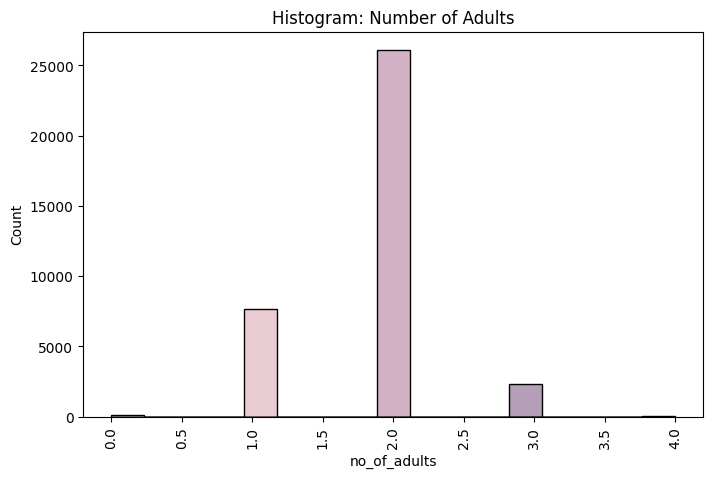

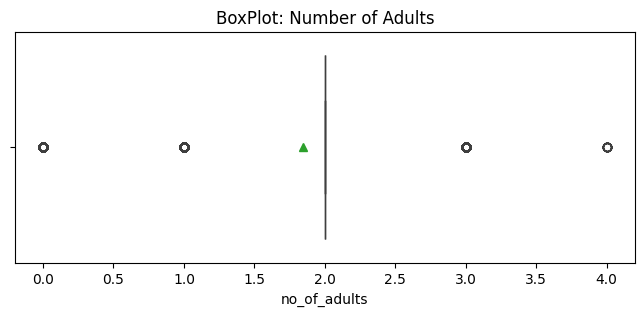

In [ ]:
# Print simple histogram for counts by number of adults
print_histogram(df_eda, 'no_of_adults', 8, 5, 'Histogram: Number of Adults', hue='no_of_adults')

# Print Boxplot for number of adults
print_boxplot(df_eda, 'no_of_adults', 8, 3, 'BoxPlot: Number of Adults')

####no_of_children

For no_of_children :
 * Mean = 0.10527911784975878
 * Median = 0.0
 * Range = 0 to 10 ( 10 )
 * Distribution is skewed to the right.


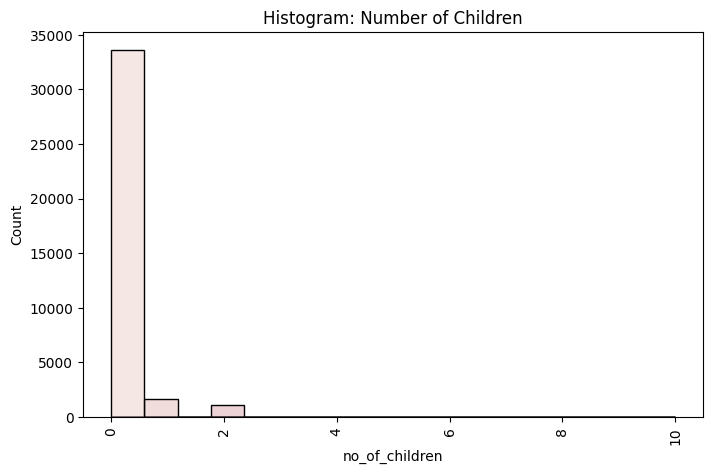

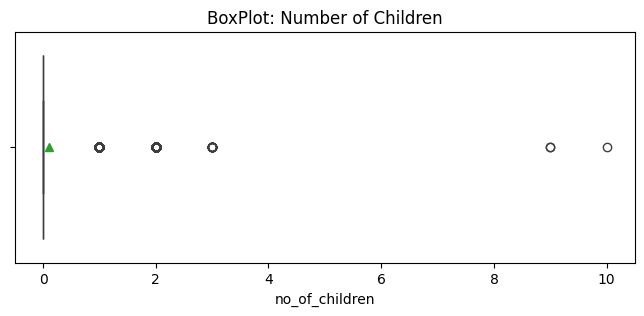

In [ ]:
# Print simple histogram for counts by number of children
print_histogram(df_eda, 'no_of_children', 8, 5, 'Histogram: Number of Children', hue='no_of_children')

# Print Boxplot for number of children
print_boxplot(df_eda, 'no_of_children', 8, 3, 'BoxPlot: Number of Children')

####no_of_weekend_nights

For no_of_weekend_nights :
 * Mean = 0.810723638869745
 * Median = 1.0
 * Range = 0 to 7 ( 7 )
 * Distribution is skewed to the left.


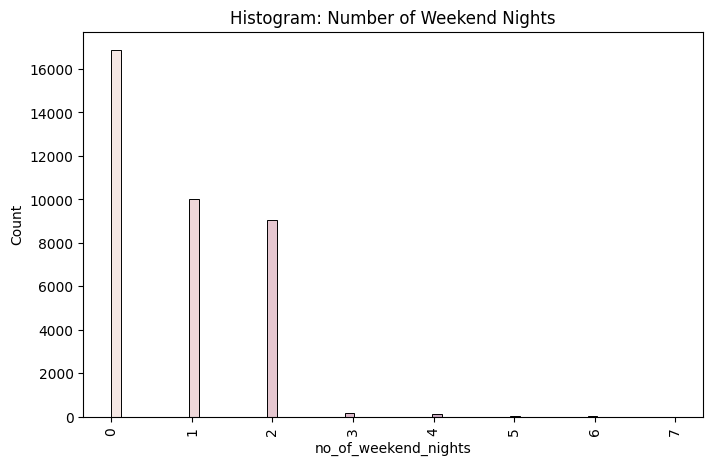

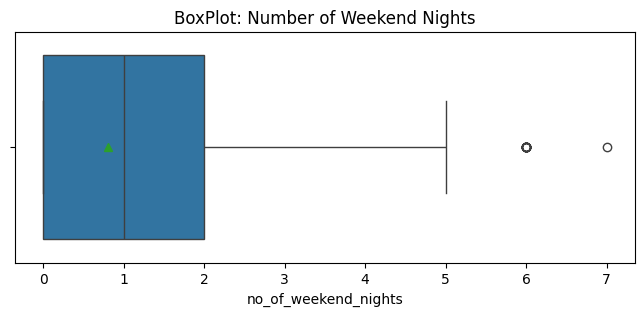

In [ ]:
# Print simple histogram for counts by number of Weekend Nights
print_histogram(df_eda, 'no_of_weekend_nights', 8, 5, 'Histogram: Number of Weekend Nights', hue='no_of_weekend_nights')

# Print Boxplot for number of Weekend Nights
print_boxplot(df_eda, 'no_of_weekend_nights', 8, 3, 'BoxPlot: Number of Weekend Nights')

####no_of_week_nights

For no_of_week_nights :
 * Mean = 2.2043004824259134
 * Median = 2.0
 * Range = 0 to 17 ( 17 )
 * Distribution is skewed to the right.




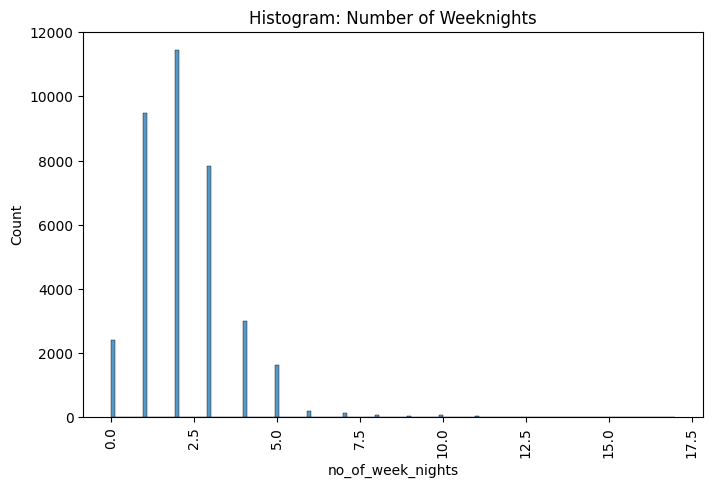

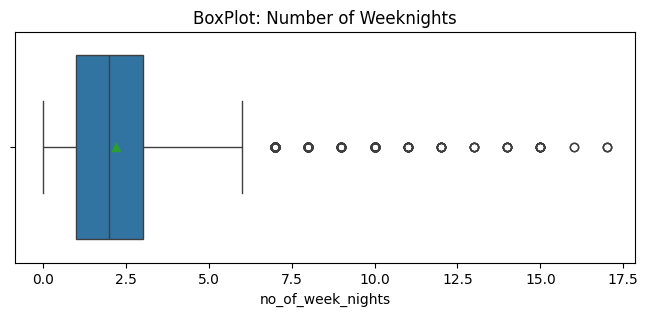

In [ ]:
# Print simple histogram for counts by number of Weeknights
print_histogram(df_eda, 'no_of_week_nights', 8, 5, 'Histogram: Number of Weeknights', hue=None)

# Print Boxplot for number of Weeknights
print_boxplot(df_eda, 'no_of_week_nights', 8, 3, 'BoxPlot: Number of Weeknights')

####type_of_meal_plan

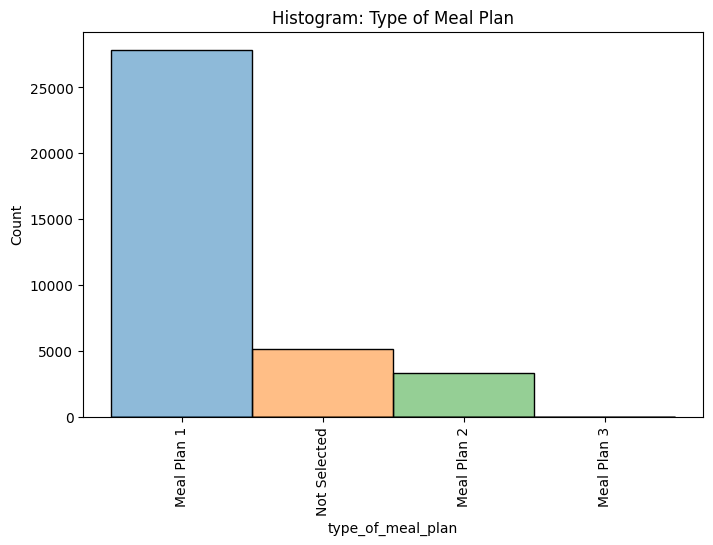

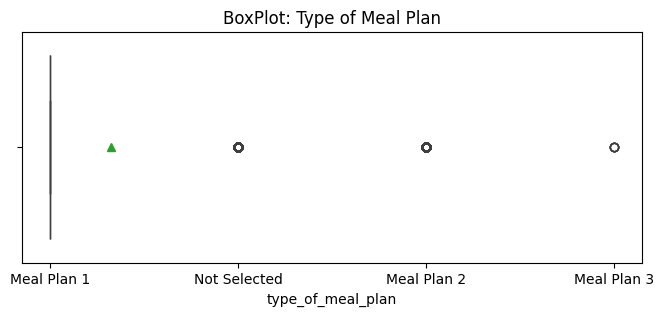

In [ ]:
# Print simple histogram for counts by type_of_meal_plan
print_histogram(df_eda, 'type_of_meal_plan', 8, 5, 'Histogram: Type of Meal Plan', hue='type_of_meal_plan')

# Print Boxplot for type of meal plan
print_boxplot(df_eda, 'type_of_meal_plan', 8, 3, 'BoxPlot: Type of Meal Plan')

####required_car_parking_space

For required_car_parking_space :
 * Mean = 0.0309855272226051
 * Median = 0.0
 * Range = 0 to 1 ( 1 )
 * Distribution is close to normal, but slightly skewed to the right. * Distribution is normal.

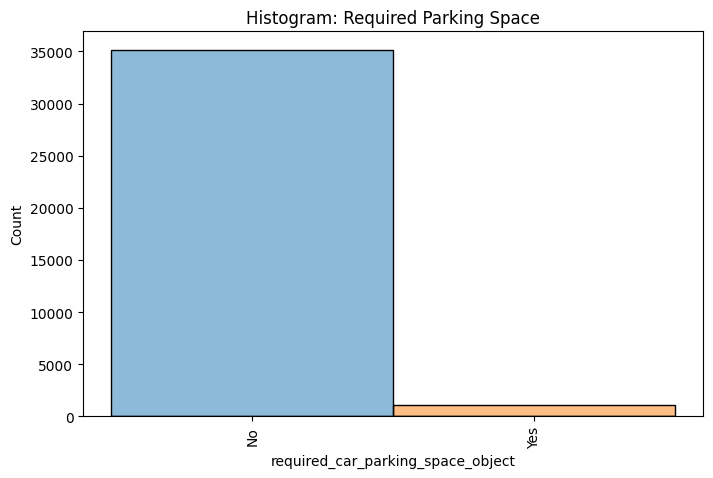

In [ ]:
# Print simple histogram for counts by required_car_parking_space
print_histogram(df_eda, 'required_car_parking_space_object', 8, 5, 'Histogram: Required Parking Space', hue='required_car_parking_space_object')

####room_type_reserved


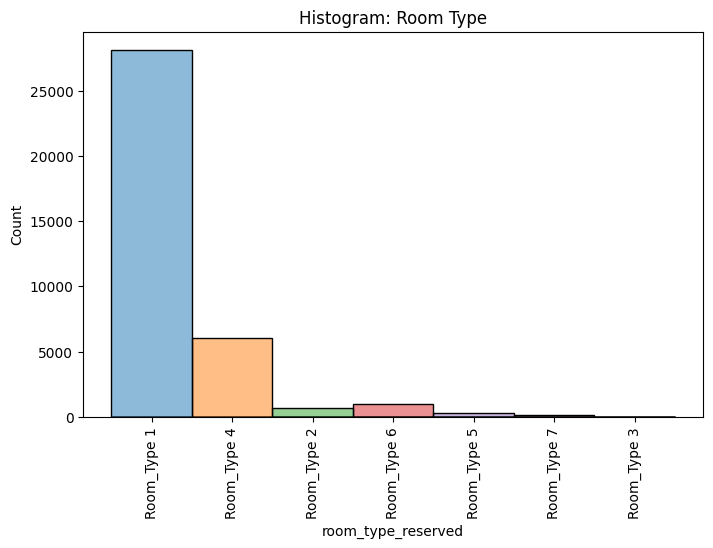

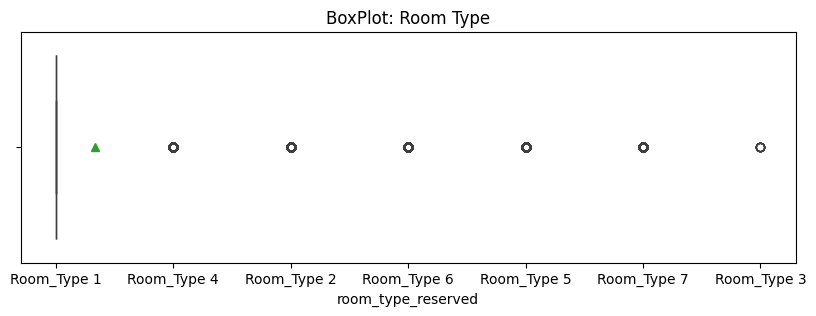

In [ ]:
# Print simple histogram for counts by room_type_reserved
print_histogram(df_eda, 'room_type_reserved', 8, 5, 'Histogram: Room Type', hue='room_type_reserved')

# Print Boxplot for room_type_reserved
print_boxplot(df_eda, 'room_type_reserved', 10, 3, 'BoxPlot: Room Type')

####lead_time

For lead_time :
 * Mean = 85.23255685733976
 * Median = 57.0
 * Range = 0 to 443 ( 443 )
 * Distribution is skewed to the right.

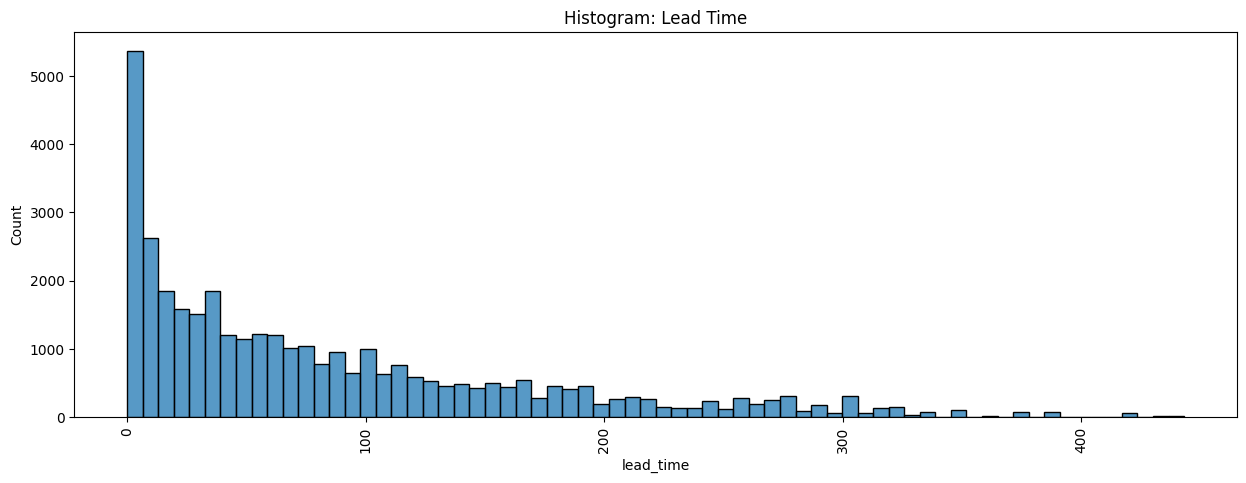

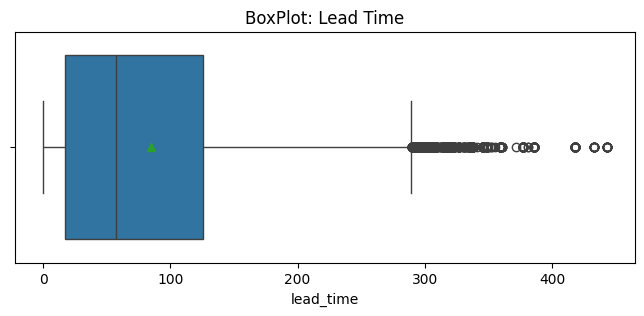

In [ ]:
# Print simple histogram for counts by lead_time
print_histogram(df_eda, 'lead_time', 15, 5, 'Histogram: Lead Time', hue=None)

# Print Boxplot for lead_time
print_boxplot(df_eda, 'lead_time', 8, 3, 'BoxPlot: Lead Time')

####arrival_year

For arrival_year :
 * Mean = 2017.8204272915232
 * Median = 2018.0
 * Range = 2017 to 2018 ( 1 )
 * Distribution is close to normal, but slightly skewed to the left. * Distribution is normal.


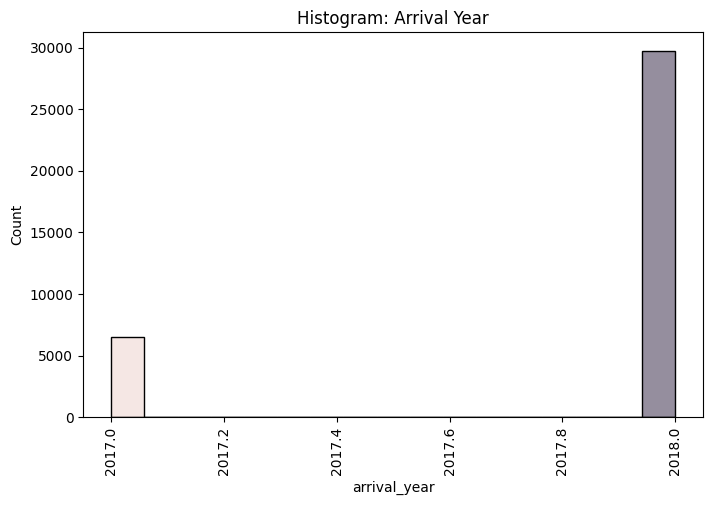

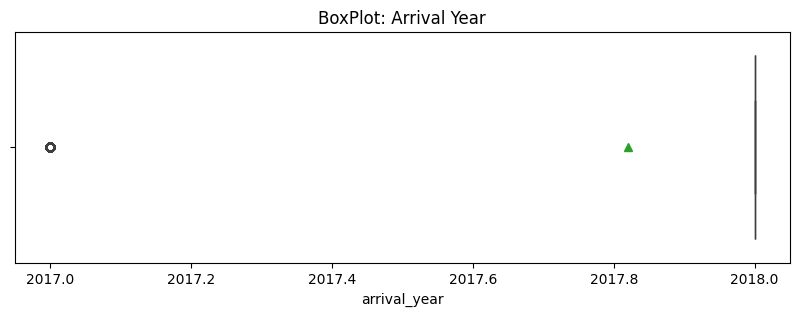

In [ ]:
# Print simple histogram for counts by arrival_year
print_histogram(df_eda, 'arrival_year', 8, 5, 'Histogram: Arrival Year', hue='arrival_year')

# Print Boxplot for arrival year
print_boxplot(df_eda, 'arrival_year', 10, 3, 'BoxPlot: Arrival Year')

####arrival_month

For arrival_month :
 * Mean = 7.423652653342522
 * Median = 8.0
 * Range = 1 to 12 ( 11 )
 * Distribution is skewed to the left.


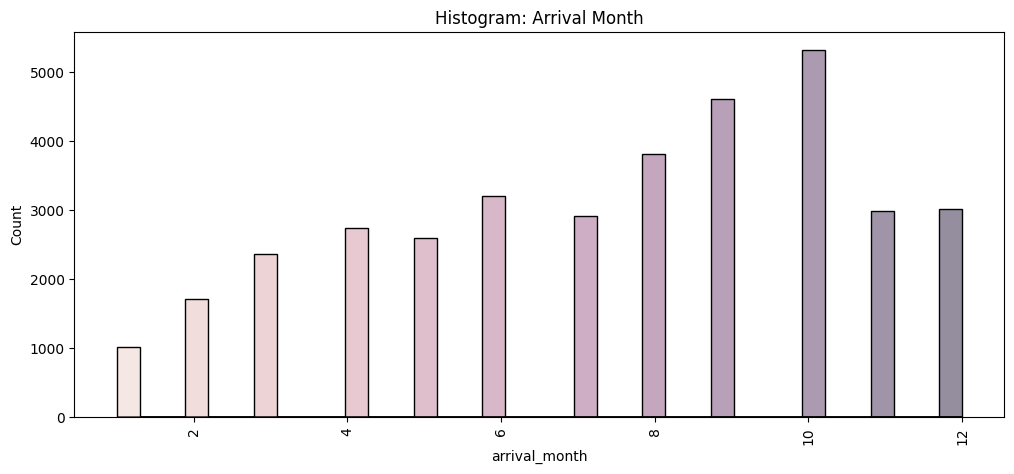

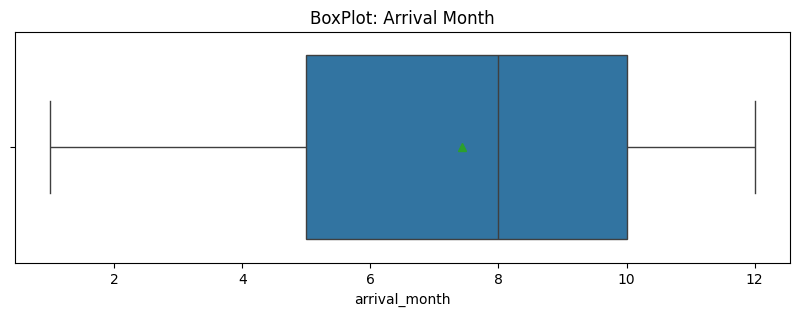

In [ ]:
# Print simple histogram for counts by arrival month
print_histogram(df_eda, 'arrival_month', 12, 5, 'Histogram: Arrival Month', hue='arrival_month')

# Print Boxplot for arrival month
print_boxplot(df_eda, 'arrival_month', 10, 3, 'BoxPlot: Arrival Month')

####arrival_date

For arrival_date :
 * Mean = 15.596995175740869
 * Median = 16.0
 * Range = 1 to 31 ( 30 )
 * Distribution is skewed to the left.

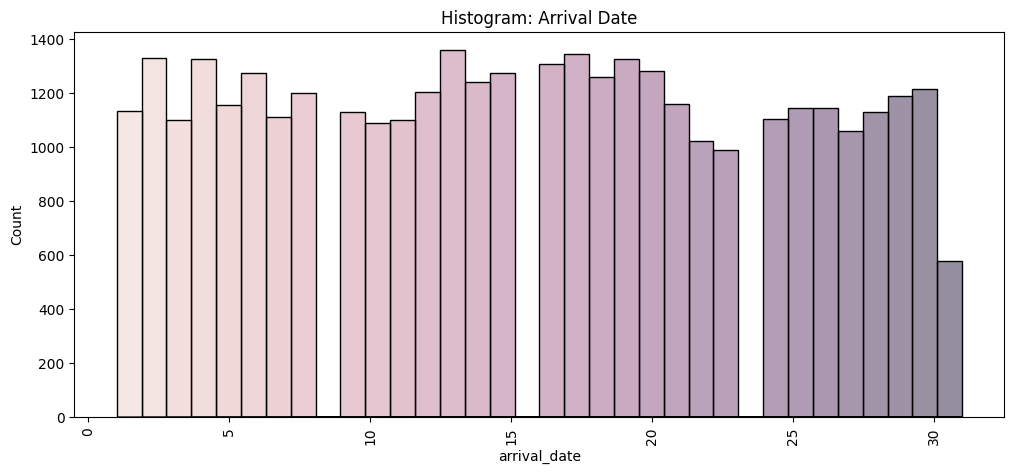

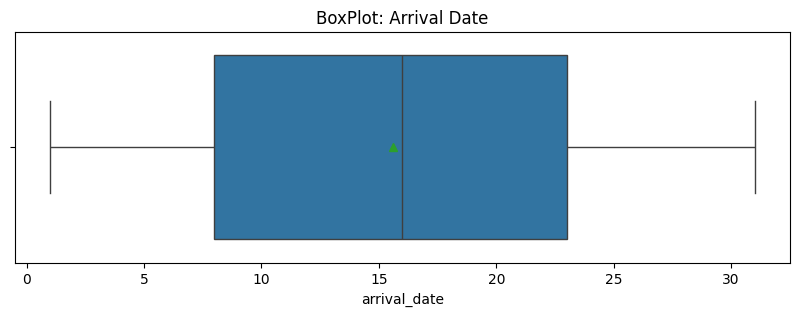

In [ ]:
# Print simple histogram for counts by arrival date
print_histogram(df_eda, 'arrival_date', 12, 5, 'Histogram: Arrival Date', hue='arrival_date', bins=31)

# Print Boxplot for arrival date
print_boxplot(df_eda, 'arrival_date', 10, 3, 'BoxPlot: Arrival Date')

####market_segment_type

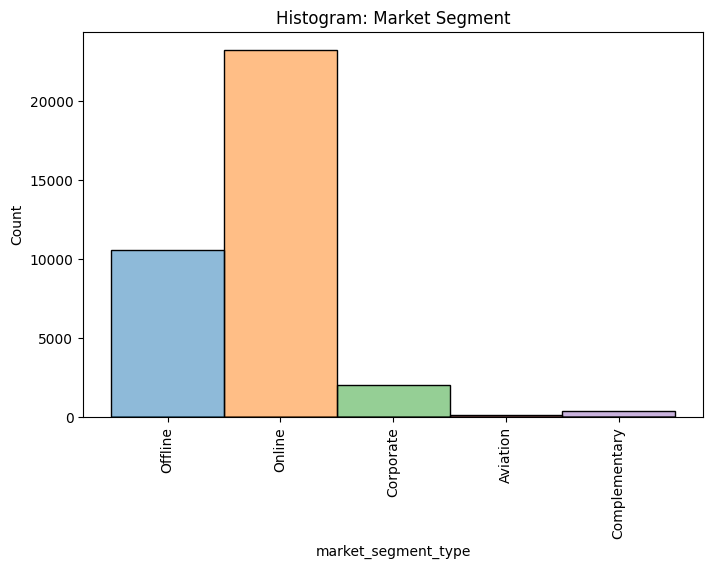

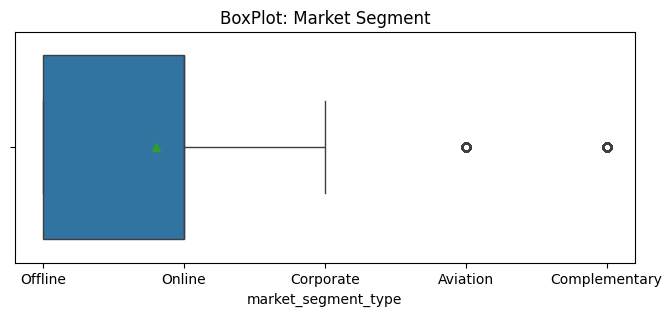

In [ ]:
# Print simple histogram for counts by Market Segment
print_histogram(df_eda, 'market_segment_type', 8, 5, 'Histogram: Market Segment', hue='market_segment_type')

# Print Boxplot for type of Market Segment
print_boxplot(df_eda, 'market_segment_type', 8, 3, 'BoxPlot: Market Segment')

####repeated_guest

For repeated_guest :
 * Mean = 0.02563749138525155
 * Median = 0.0
 * Range = 0 to 1 ( 1 )
 * Distribution is close to normal, but slightly skewed to the right. * Distribution is normal.


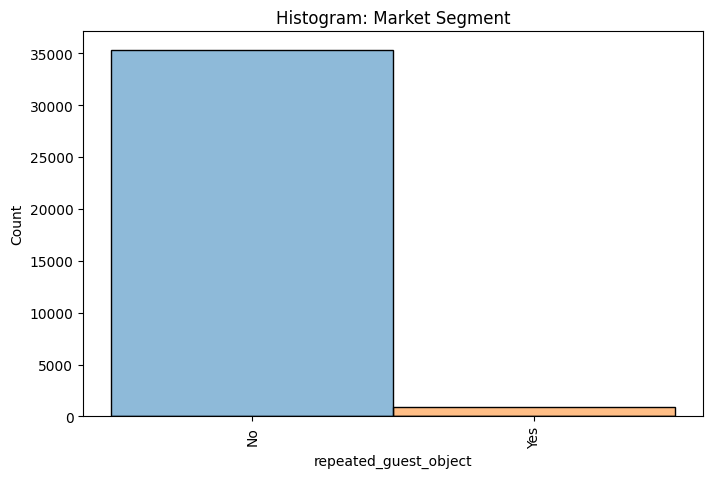

In [ ]:
# Print simple histogram for counts by Repeated Guest
print_histogram(df_eda, 'repeated_guest_object', 8, 5, 'Histogram: Market Segment', hue='repeated_guest_object')

####no_of_previous_cancellations

For no_of_previous_cancellations :
 * Mean = 0.023349414197105445
 * Median = 0.0
 * Range = 0 to 13 ( 13 )
 * Distribution is skewed to the right.


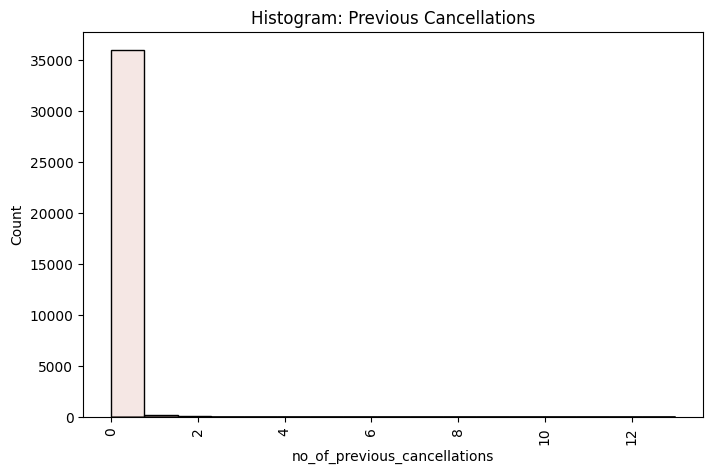

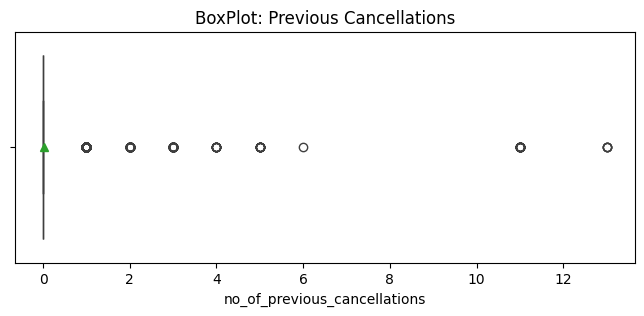

In [ ]:
# Print simple histogram for counts by Previous Cancellations
print_histogram(df_eda, 'no_of_previous_cancellations', 8, 5, 'Histogram: Previous Cancellations', hue='no_of_previous_cancellations')

# Print Boxplot for type of Previous Cancellations
print_boxplot(df_eda, 'no_of_previous_cancellations', 8, 3, 'BoxPlot: Previous Cancellations')

####no_of_previous_bookings_not_canceled

For no_of_previous_bookings_not_canceled :
 * Mean = 0.15341144038594073
 * Median = 0.0
 * Range = 0 to 58 ( 58 )
 * Distribution is skewed to the right.

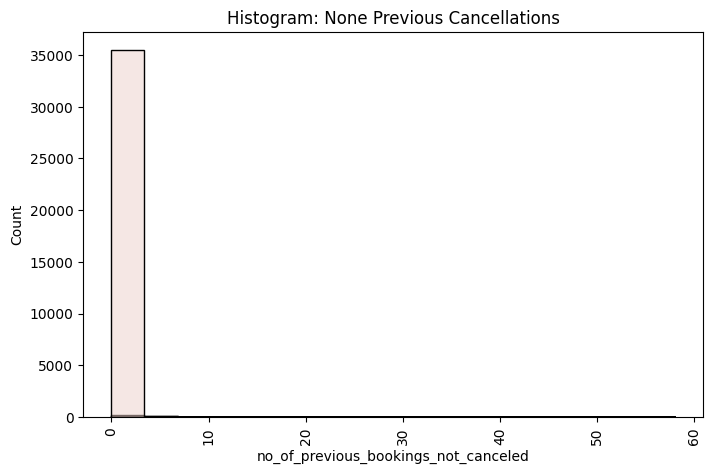

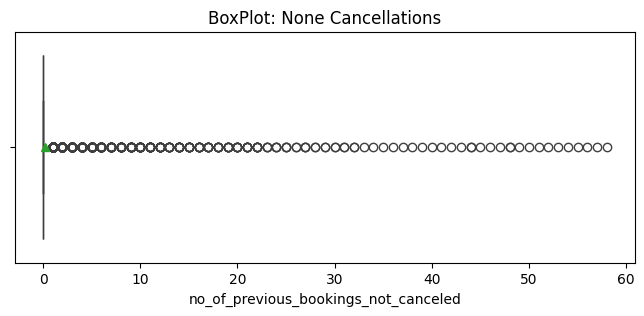

In [ ]:
# Print simple histogram for counts by NO Previous Cancellations
print_histogram(df_eda, 'no_of_previous_bookings_not_canceled', 8, 5, 'Histogram: None Previous Cancellations', hue='no_of_previous_bookings_not_canceled')

# Print Boxplot for type of NO Previous Cancellations
print_boxplot(df_eda, 'no_of_previous_bookings_not_canceled', 8, 3, 'BoxPlot: None Cancellations')

####avg_price_per_room

For avg_price_per_room :
 * Mean = 103.42353907649897
 * Median = 99.45
 * Range = 0.0 to 540.0 ( 540.0 )
 * Distribution is skewed to the right.


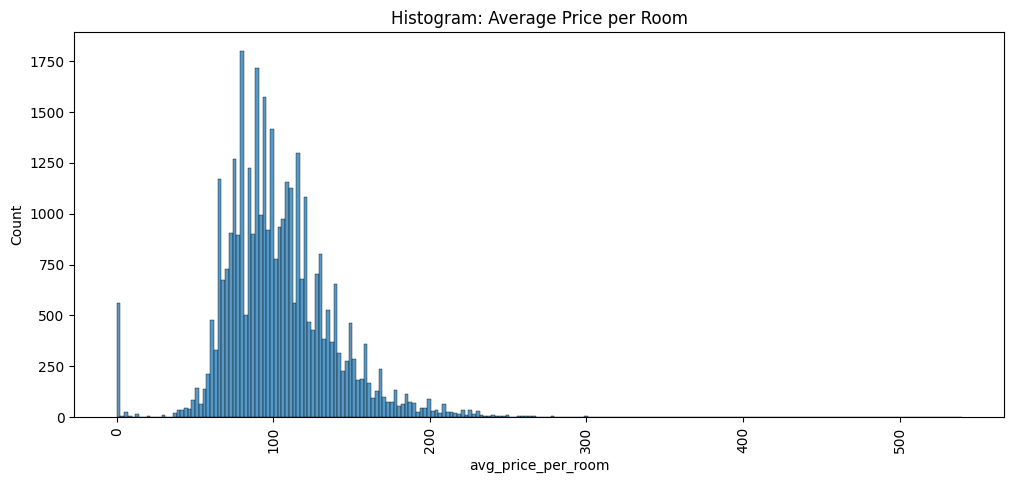

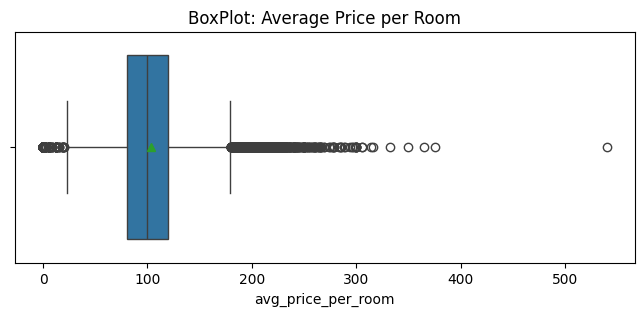

In [ ]:
# Print simple histogram for average price per room
print_histogram(df_eda, 'avg_price_per_room', 12, 5, 'Histogram: Average Price per Room', hue=None)

# Print Boxplot for average price per room
print_boxplot(df_eda, 'avg_price_per_room', 8, 3, 'BoxPlot: Average Price per Room')

####no_of_special_requests

For no_of_special_requests :
 * Mean = 0.6196554100620262
 * Median = 0.0
 * Range = 0 to 5 ( 5 )
 * Distribution is skewed to the right.


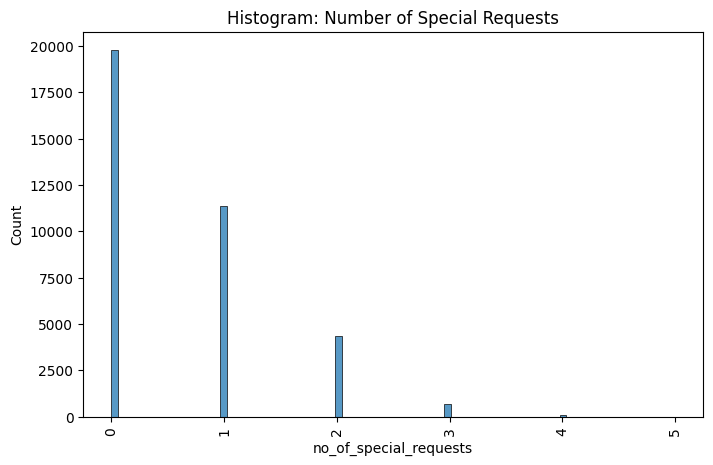

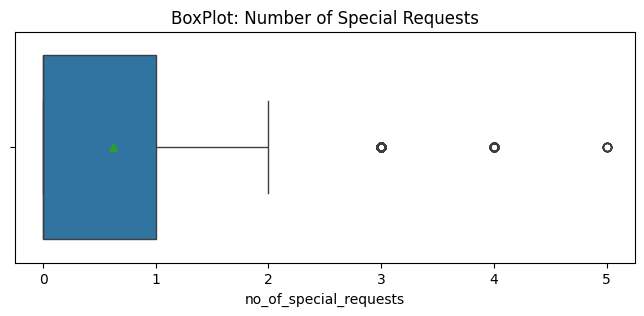

In [ ]:
# Print simple histogram for no_of_special_requests
print_histogram(df_eda, 'no_of_special_requests', 8, 5, 'Histogram: Number of Special Requests', hue=None)

# Print Boxplot for no_of_special_requests
print_boxplot(df_eda, 'no_of_special_requests', 8, 3, 'BoxPlot: Number of Special Requests')

####booking_status

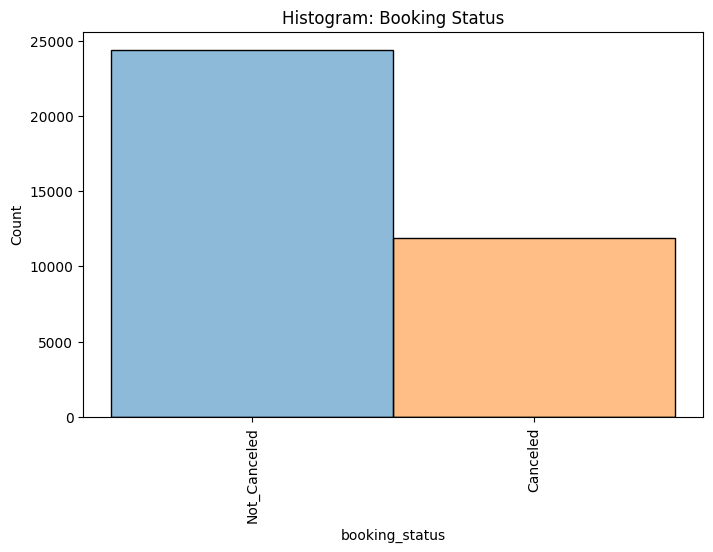

In [ ]:
# Print simple histogram for booking_status
print_histogram(df_eda, 'booking_status', 8, 5, 'Histogram: Booking Status', hue='booking_status')

In [ ]:
# Determine % cancellations
df_eda['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

**OBSERVATIONS**

* About 1/3 of all bookings are canceled.
* Most commonly a room is booked for two adults and no children. Otherwise, single occupants are most common vs. more.
* The value of 0 for no_of_adults is suspect, as it is doubtful the company rents to minors. We need to investigate this outlier and address.
* The majority of bookings occur during weekdays for 2 days, although we have a few outliers with exceptionally long date ranges. However, when they are made on weekends, most are booked for 1 night.
* Meal Plan 1 is most popular.
* Most people who book rooms do not require parking arrangements. The hotel's location and proximity to area attractions or transportation options may contribute to this.
* Room Type 1 is most commonly booksed, followed by Room type 4.
* Many bookings appear to be made last minute, as 0 to 1 days lead time is most common. However, this data is highly skewed to the right with some bookings as far out as 443 days, impacting the overall mean value of 85 days and median of 57 days.
* Many more bookings occurred in 2018 than in 2017. This could be the result of expansion, amount of data gathered, or other factors. Therefore our dataset is primarily driven by 2018 bookings.
* While October has the most bookings overall, 50% of bookings occur in August. January is the slowest month for bookings.
* Bookings are fairly evenly distributed across days of the month, although around the  middle of the month constitutes 50% of bookings. The fact that Day 31 has fewer bookings is irrelevant as not all months have 31 days. We may want to consider dropping Day 31 from our dataset to avoid these outliers.
* Bookings are most commonly made online, although about half as many are made offline as well. Not very many bookings are corporate in nature; this could represent a segment to target assuming corporate visitors fall within the hotel's ideal customer profile.
* Very few repeat bookings are made. This could be worth investigating later, as repeat business is critical for the business.
* While most reservations are not canceled,a number of cancelations do exist. This makes sense since we do not have that many repeat customers.
	* However, most guests have not canceled a prior booking. This makes sense
	* In addition, it seems we have two variables measuring essentially the same data point (no_of_previous_cancellations and no_of_previous_bookings_not_canceled)
* The average booking price is 100 USD. There are some bookings with a price of 0, which are likely complementary rooms, or data errors. Most rooms are under 200 USD.
* Most guests do not have special requests, although many have one or two requests. It may be worth examining what these requests are, if new standard offerings should be included with stays.


## Bivariate Analysis

Next, let's examine how various features are related. We can start by checking overall correlation, and then determining which pairs to investigate further.

We know, from the project directive, that cancellations are our primary concern. Therefore, we should focus on features that we believe impact cancellations.

In addition, we have a number of categorical variables. In order to view these from a collinearity perspective, we may need to alter our EDA dataset copy to represent some of these as binary values.

In [ ]:
# Convert Booking Status from a categorical variable to a more useful numerical one
df_eda['booking_status_active_int'] = df_eda['booking_status'].map(lambda x: 0 if x == 'Canceled' else 1)

# Create a numerical column list for EDA only
list_numcol_eda = df_eda.select_dtypes(np.number)

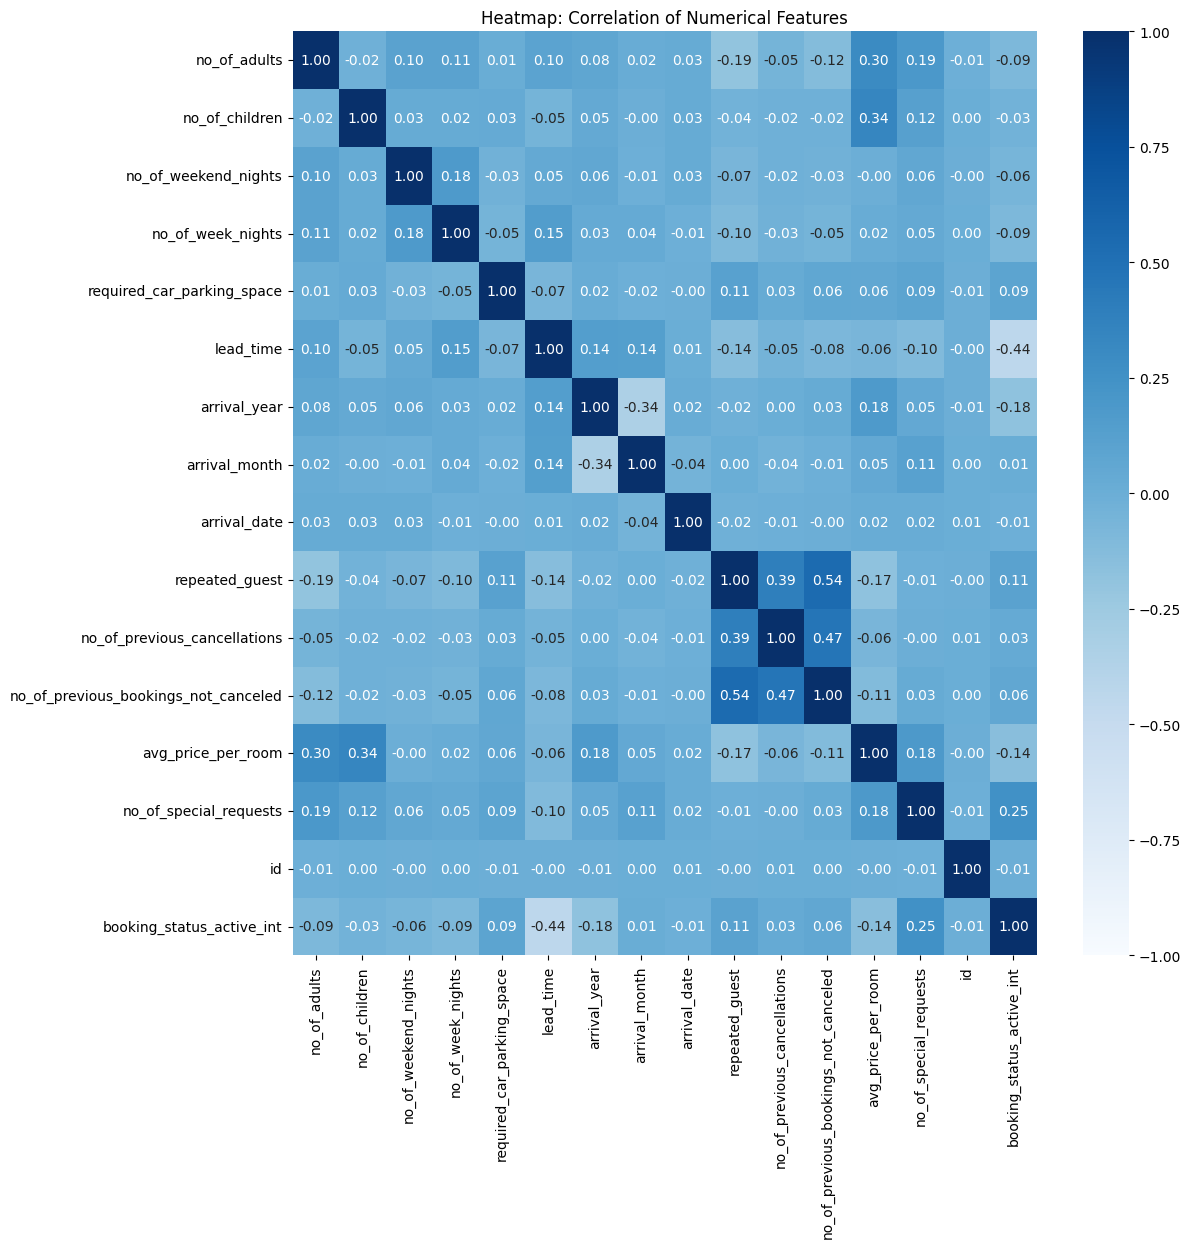

In [ ]:
# Plot the variable correlations for our numerical variables

# Set figure size and title
plt.figure(figsize=(12, 12))
plt.title('Heatmap: Correlation of Numerical Features')

# Create a heat map
sns.heatmap(list_numcol_eda.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Blues')
plt.show();

Next, we can make a few observations based on examining the correlations:

* Repeat guests correlate highly with no prior cancellations.
* Price increases with the number of occupants (children and/or adults).
* A strong negative correlation exists between lead time for the booking and active status (meaning inactive/canceled ones increase with lead time).
* A slightly negative correlation exists with repeat guests and average room price.
* Strong relationships appear to exist between repeat customers and whether prior bookings are canceled or not.
* Few other notable correlations exist.

Our next step will be to examine some of the feature relationships through bivariate analysis. Since cancellations are the primary focus of this project, we should examine cancellations across numerous features.

* Bookings by Occupancy Metrics
* Price by Weeknights vs. Weekends
* Cancellations for Weeknights vs. Weekends
* Cancellations by Price
* Cancellations by Market Segment
* Cancellations by Meal Plan Type
* Cancellations by Room Type
* Cancellations by Arrival Month
* Cancellations by Lead Time
* Cancellations by Repeat Guests
* Cancellations by Special Request Count
* CAncellations by Parking Space Request Count


###Bookings by Occupancy Metrics

How many bookings were all adults vs. adults vs. children?

In [ ]:
# Create new column for occupant type
df_eda['occupant_type'] = ''

# Assign occupant type by checking adults vs. children for booking
for index, row in df_eda.iterrows():
  if row['no_of_adults'] > 0 and row['no_of_children'] > 0:
       df_eda.loc[index, 'occupant_type'] = 'Family'
  elif row['no_of_adults'] == 0 and row['no_of_children'] > 0:
       df_eda.loc[index, 'occupant_type'] = 'Children'
  elif row['no_of_adults'] > 0 and row['no_of_children'] == 0:
       df_eda.loc[index, 'occupant_type'] = 'Adult'
  else:
    row['occupant_type'] = np.nan



In [ ]:
# Create pivot table for occupancy by type (counts and percentages)
df_group_occupancy_pivot_counts = df_eda.pivot_table(
    index='booking_status',
    values=['no_of_adults', 'no_of_children'],
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)

# Calculate percentages across each row (booking status)
df_group_occupancy_pivot_percentages = df_group_occupancy_pivot_counts.div(df_group_occupancy_pivot_counts.iloc[-1, :], axis=1) * 100
df_group_occupancy_pivot_percentages = df_group_occupancy_pivot_percentages.round(2)

# Calculate percentages across each column (no_of_adults and no_of_children)
df_percentages_by_category = df_group_occupancy_pivot_counts.div(df_group_occupancy_pivot_counts.sum(axis=0), axis=1) * 100
df_percentages_by_category = df_percentages_by_category.round(2)

# Combine counts, percentages of totals, and percentages by category for display
df_combined_occupancy = pd.concat([df_group_occupancy_pivot_counts, df_group_occupancy_pivot_percentages, df_percentages_by_category], keys=['Counts', 'Percentages of Totals', 'Percentages by Category'])

# Display the combined DataFrame
display(df_combined_occupancy)

no_of_adults  no_of_children
                        booking_status                              
Counts                  Canceled            22695.00         1478.00
                        Not_Canceled        44231.00         2341.00
                        Total               66926.00         3819.00
Percentages of Totals   Canceled               33.91           38.70
                        Not_Canceled           66.09           61.30
                        Total                 100.00          100.00
Percentages by Category Canceled               16.96           19.35
                        Not_Canceled           33.04           30.65
                        Total                  50.00           50.00

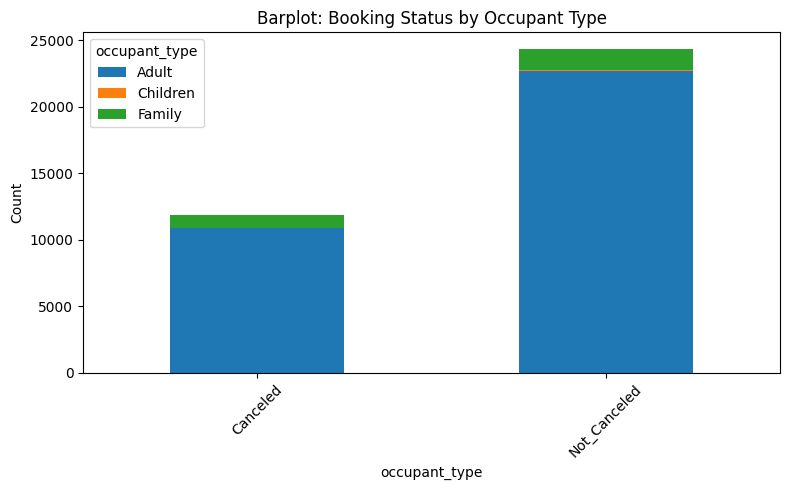

In [ ]:
# Print simple stacked barplot for bookings by occupancy type
print_stacked_barplot(df_eda, 'booking_status', 'occupant_type', 8, 5, 'Barplot: Booking Status by Occupant Type')

In [ ]:
print('Averages by Occupancy Type:', df_eda['occupant_type'].value_counts(normalize=True))
print('\nCancellation Averages by Occupancy Type:', df_eda[df_eda['booking_status']=='Canceled']['occupant_type'].value_counts(normalize=True))
print('\nNon-Cancellation Averages by Occupancy Type:', df_eda[df_eda['booking_status']=='Not_Canceled']['occupant_type'].value_counts(normalize=True))

Averages by Occupancy Type: occupant_type
Adult       0.925624
Family      0.070544
Children    0.003832
Name: proportion, dtype: float64

Cancellation Averages by Occupancy Type: occupant_type
Adult       0.915608
Family      0.080690
Children    0.003702
Name: proportion, dtype: float64

Non-Cancellation Averages by Occupancy Type: occupant_type
Adult       0.930504
Family      0.065601
Children    0.003895
Name: proportion, dtype: float64


**OBSERVATION**

* The majority of bookings are for adults with no children (93%).
* No discernible trend exists for cancellations with regard to only adults, or families. The ratios are fairly similar for both canceled and non-canceled bookings.

###Price by Weeknights vs. Weekends


In [ ]:
# Create new column for booking span
df_eda['booking_span'] = ''

# Assign occupant type by checking adults vs. children for booking
for index, row in df_eda.iterrows():
  if row['no_of_weekend_nights'] > 0 and row['no_of_week_nights'] > 0:
       df_eda.loc[index, 'booking_span'] = 'Both'
  elif row['no_of_weekend_nights'] == 0 and row['no_of_week_nights'] > 0:
       df_eda.loc[index, 'booking_span'] = 'Weekday'
  elif row['no_of_weekend_nights'] > 0 and row['no_of_week_nights'] == 0:
       df_eda.loc[index, 'booking_span'] = 'Weekend'
  elif row['no_of_weekend_nights'] == 0 and row['no_of_week_nights'] == 0:
       df_eda.loc[index, 'booking_span'] = 'Missing Data'
  else:
    row['booking_span'] = 0


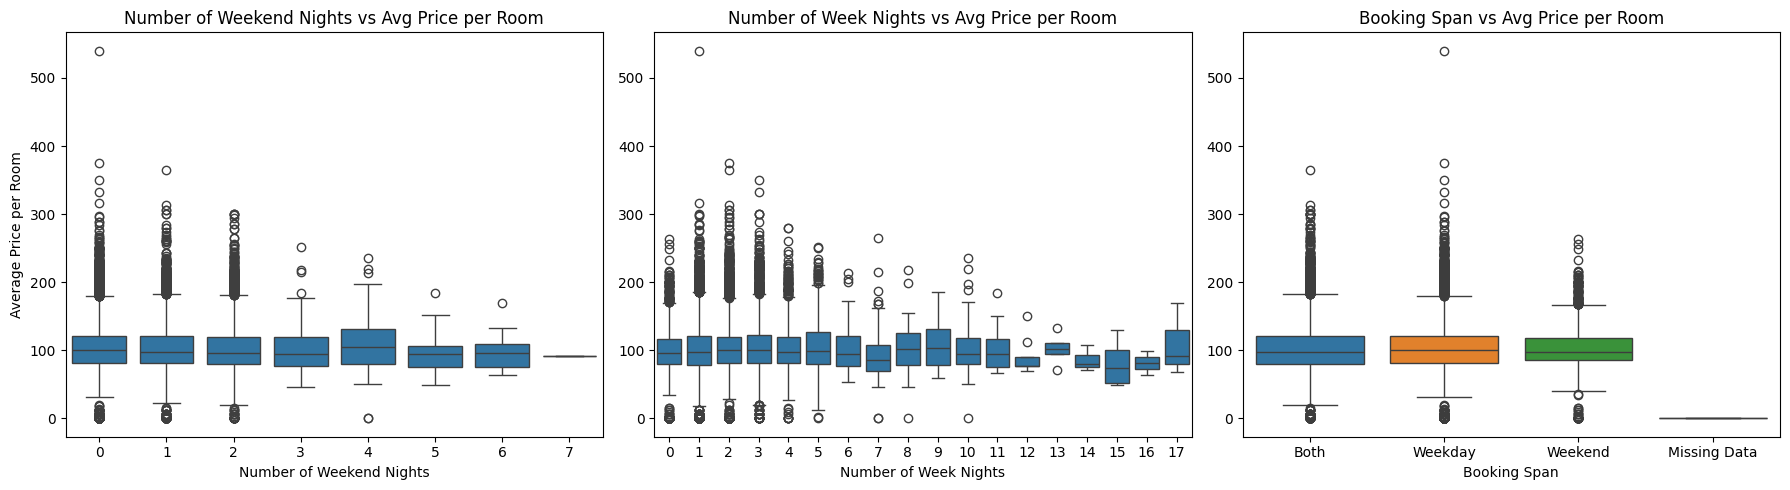

In [ ]:

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot boxplot for no_of_weekend_nights vs avg_price_per_room
sns.boxplot(data=df_eda, x='no_of_weekend_nights', y='avg_price_per_room', ax=axes[0])
axes[0].set_title('Number of Weekend Nights vs Avg Price per Room')
axes[0].set_xlabel('Number of Weekend Nights')
axes[0].set_ylabel('Average Price per Room')

# Plot boxplot for no_of_week_nights vs avg_price_per_room
sns.boxplot(data=df_eda, x='no_of_week_nights', y='avg_price_per_room', ax=axes[1])
axes[1].set_title('Number of Week Nights vs Avg Price per Room')
axes[1].set_xlabel('Number of Week Nights')
axes[1].set_ylabel('')  # Remove y-axis label to avoid duplication

# Plot boxplot for booking_span vs avg_price_per_room
sns.boxplot(data=df_eda, x='booking_span', y='avg_price_per_room', ax=axes[2], hue='booking_span')
axes[2].set_title('Booking Span vs Avg Price per Room')
axes[2].set_xlabel('Booking Span')
axes[2].set_ylabel('')  # Remove y-axis label to avoid duplication

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Display the plots
plt.show()

Let's examine the high-priced outlier

In [ ]:
df_eda[df_eda['avg_price_per_room'] > 500]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
33114   INN33115             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
33114                  1       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  ...  \
33114        Room_Type 1         35          2018  ...   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0               540.0   

      no_of_special_requests  booking_status     id  repeated_guest_object  \
33114                      0        Canceled  33114                     No   

       required_car_parking_space_object  booking_status_active_int  \
33114                                 No                          0   

      occupant_type  booking_span  
33114         Adult       Weekday  

[1 rows x 25 columns]

**OBSERVATION**

* Average prices are fairly consistent (around 100 EUR), regardless of whether the booking is for a weekend, weekday, or spans both.
* However, length of stay does seem to impact price.
  * Shorter bookings often have higher-priced rates
  * Longer bookings tend to settle close to the average.
  * This holds true for weekends and weekdays.
* We can observe a very high-priced outlier that indicates some special spike in price, or a property that is a pricing anomaly compared to others.

###Cancellations by Weeknights vs. Weekends

How many bookings and cancellations were only for weekdays, vs. only for weekends?

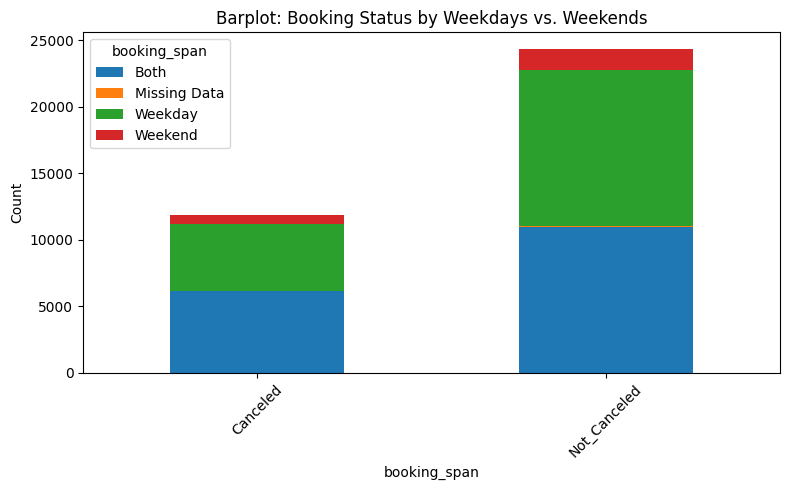

In [ ]:
# Print simple stacked barplot for bookings by occupancy type
print_stacked_barplot(df_eda, 'booking_status', 'booking_span', 8, 5, 'Barplot: Booking Status by Weekdays vs. Weekends')

In [ ]:
# Inspect the rows that did not yield a result
df_eda[df_eda['booking_span']=='Missing Data']

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
209     INN00210             1               0                     0   
1158    INN01159             2               0                     0   
1403    INN01404             3               0                     0   
1907    INN01908             2               0                     0   
1986    INN01987             2               0                     0   
...          ...           ...             ...                   ...   
33218   INN33219             1               0                     0   
33537   INN33538             2               0                     0   
34750   INN34751             1               0                     0   
35472   INN35473             1               0                     0   
35949   INN35950             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
209                    0       Meal Plan 1                           0   
1158                   0       Meal Plan 1                           0   
1403                   0       Meal Plan 1                           0   
1907                   0       Meal Plan 2                           0   
1986                   0       Meal Plan 1                           0   
...                  ...               ...                         ...   
33218                  0       Meal Plan 1                           0   
33537                  0       Meal Plan 1                           0   
34750                  0       Meal Plan 1                           0   
35472                  0       Meal Plan 1                           0   
35949                  0       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  ...  \
209          Room_Type 1          4          2018  ...   
1158         Room_Type 1        145          2018  ...   
1403         Room_Type 4         57          2018  ...   
1907         Room_Type 1        247          2018  ...   
1986         Room_Type 1         43          2017  ...   
...                  ...        ...           ...  ...   
33218        Room_Type 1          1          2018  ...   
33537        Room_Type 2        166          2018  ...   
34750        Room_Type 4          1          2017  ...   
35472        Room_Type 1          7          2018  ...   
35949        Room_Type 1         30          2017  ...   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
209                                       0                 0.0   
1158                                      0                 0.0   
1403                                      0                 0.0   
1907                                      0                 0.0   
1986                                      0                 0.0   
...                                     ...                 ...   
33218                                     0                 0.0   
33537                                     0                 0.0   
34750                                     0                 0.0   
35472                                     0                 0.0   
35949                                     0                 0.0   

      no_of_special_requests  booking_status     id  repeated_guest_object  \
209                        1    Not_Canceled    209                     No   
1158                       1    Not_Canceled   1158                     No   
1403                       2    Not_Canceled   1403                     No   
1907                       1    Not_Canceled   1907                     No   
1986                       1    Not_Canceled   1986                     No   
...                      ...             ...    ...                    ...   
33218                      0    Not_Canceled  33218                     No   
33537                      2    Not_Canceled  33537                     No   
34750                      0    Not_Canceled  34

In [ ]:
# Create a pivot table for booking span by type
df_group_booking_span_pivot_active = df_eda.pivot_table(index=['booking_status']
                                                     ,values=['no_of_weekend_nights', 'no_of_week_nights']
                                                     ,aggfunc='sum'
                                                     ,margins=True
                                                     ,margins_name='Total Number of Days Canceled'
                                                     )
df_group_booking_span_pivot_active


no_of_week_nights  no_of_weekend_nights
booking_status                                                        
Canceled                                   28432                 10548
Not_Canceled                               51529                 18861
Total Number of Days Canceled              79961                 29409

In [ ]:
# Create pivot table for weeknights/weekdays (counts and percentages)
df_group_days_pivot_counts = df_eda.pivot_table(
    index='booking_status',
    values=['no_of_weekend_nights', 'no_of_week_nights'],
    aggfunc='sum',
    margins=True,
    margins_name='Total Nights Weekends vs. Weekdays'
)

# Calculate percentages across each row (booking status)
df_group_days_pivot_percentages = df_group_days_pivot_counts.div(df_group_days_pivot_counts.iloc[-1, :], axis=1) * 100
df_group_days_pivot_percentages = df_group_days_pivot_percentages.round(2)

# Calculate percentages across each column
df_percentages_by_category = df_group_days_pivot_counts.div(df_group_days_pivot_counts.sum(axis=0), axis=1) * 100
df_percentages_by_category = df_percentages_by_category.round(2)

# Combine counts, percentages of totals, and percentages by category for display
df_combined_days = pd.concat([df_group_days_pivot_counts, df_group_days_pivot_percentages, df_percentages_by_category], keys=['Counts', 'Percentages of Totals', 'Percentages by Category'])

# Display the combined DataFrame
display(df_combined_days)

no_of_week_nights  \
                        booking_status                                          
Counts                  Canceled                                     28432.00   
                        Not_Canceled                                 51529.00   
                        Total Nights Weekends vs. Weekdays           79961.00   
Percentages of Totals   Canceled                                        35.56   
                        Not_Canceled                                    64.44   
                        Total Nights Weekends vs. Weekdays             100.00   
Percentages by Category Canceled                                        17.78   
                        Not_Canceled                                    32.22   
                        Total Nights Weekends vs. Weekdays              50.00   

                                                            no_of_weekend_nights  
                        booking_status                                            
Counts                  Canceled                                        10548.00  
                        Not_Canceled                                    18861.00  
                        Total Nights Weekends vs. Weekdays              29409.00  
Percentages of Totals   Canceled                                           35.87  
                        Not_Canceled                                       64.13  
                        Total Nights Weekends vs. Weekdays                100.00  
Percentages by Category Canceled                                           17.93  
                        Not_Canceled                                       32.07  
                        Total Nights Weekends vs. Weekdays                 50.00

**OBSERVATIONS**

* We have some data (78 rows) that do not correctly specify weekend vs. weekday bookings.
* In looking at counts of days canceled:
  * About the same percentage of booking days for weekends (17.93%) and weekdays (17.78%) are canceled.
  * Similarly, about the same percentage of booking days for weekends 32.07%) and weekdays (32.22%) are canceled.
* We can clearly see that cancellations do not vary by weekends vs. weeknights.
* The ratio of days canceled mirrors the overall cancellation ration of about 1/3.


###Cancellations by Price

Let's see if the previous trends differ for cancellations vs. non-cancellations

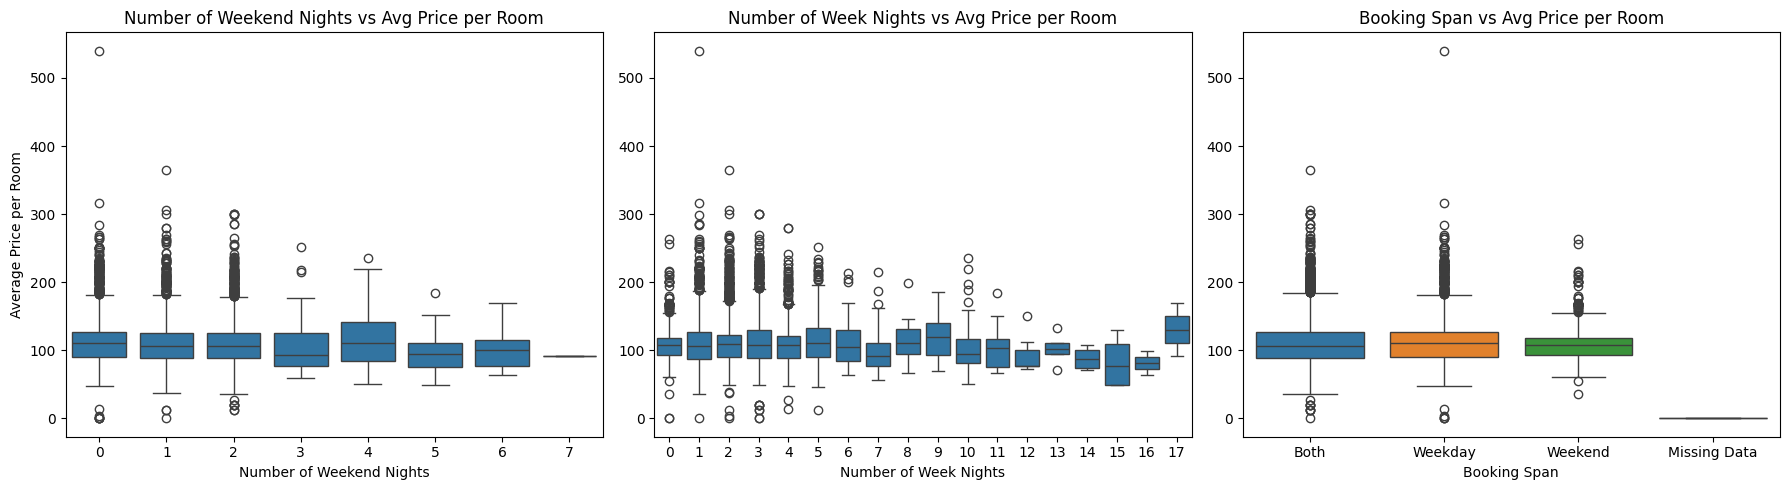

In [ ]:
# Repeat what we did earlier, but looking only at canceled bookings

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot boxplot for no_of_weekend_nights vs avg_price_per_room
sns.boxplot(data=df_eda[df_eda['booking_status']=='Canceled']
, x='no_of_weekend_nights', y='avg_price_per_room', ax=axes[0])
axes[0].set_title('Number of Weekend Nights vs Avg Price per Room')
axes[0].set_xlabel('Number of Weekend Nights')
axes[0].set_ylabel('Average Price per Room')

# Plot boxplot for no_of_week_nights vs avg_price_per_room
sns.boxplot(data=df_eda[df_eda['booking_status']=='Canceled']
, x='no_of_week_nights', y='avg_price_per_room', ax=axes[1])
axes[1].set_title('Number of Week Nights vs Avg Price per Room')
axes[1].set_xlabel('Number of Week Nights')
axes[1].set_ylabel('')  # Remove y-axis label to avoid duplication

# Plot boxplot for booking_span vs avg_price_per_room
sns.boxplot(data=df_eda[df_eda['booking_status']=='Canceled']
, x='booking_span', y='avg_price_per_room', ax=axes[2], hue='booking_span')
axes[2].set_title('Booking Span vs Avg Price per Room')
axes[2].set_xlabel('Booking Span')
axes[2].set_ylabel('')  # Remove y-axis label to avoid duplication

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# Calculate sum of lost revenue due to cancellations

# Group the data
df_eda_cancellation_revenue_loss = df_eda.groupby(['booking_status'])['avg_price_per_room'].agg('sum')
display(df_eda_cancellation_revenue_loss)

# Extract values
canceled_revenue = df_eda_cancellation_revenue_loss['Canceled']
not_canceled_revenue = df_eda_cancellation_revenue_loss['Not_Canceled']
total_revenue = canceled_revenue + not_canceled_revenue
percentage_lost_to_cancellations = round((canceled_revenue / total_revenue) * 100,3)

print(f'Total Revenue: {total_revenue}')
print(f'Revenue loss due to cancellations: {canceled_revenue} ({percentage_lost_to_cancellations}%)')
print(f'* Canceled: {canceled_revenue}')
print(f'* Not Canceled: {not_canceled_revenue}')


booking_status
Canceled        1314361.75
Not_Canceled    2437327.13
Name: avg_price_per_room, dtype: float64

Total Revenue: 3751688.88
Revenue loss due to cancellations: 1314361.75 (35.034%)
* Canceled: 1314361.75
* Not Canceled: 2437327.13


**OBSERVATIONS**

* No notable differences in trends exist for price of bookings that were canceled. The charts look similar to the overall price trends without regard to cancellation.
* We can say that price does not appear to be a factor in cancellations.
* Revenue loss due to cancellations is considerable - about 1/3 of the potential total revenue.

###Cancellations by Market Segment

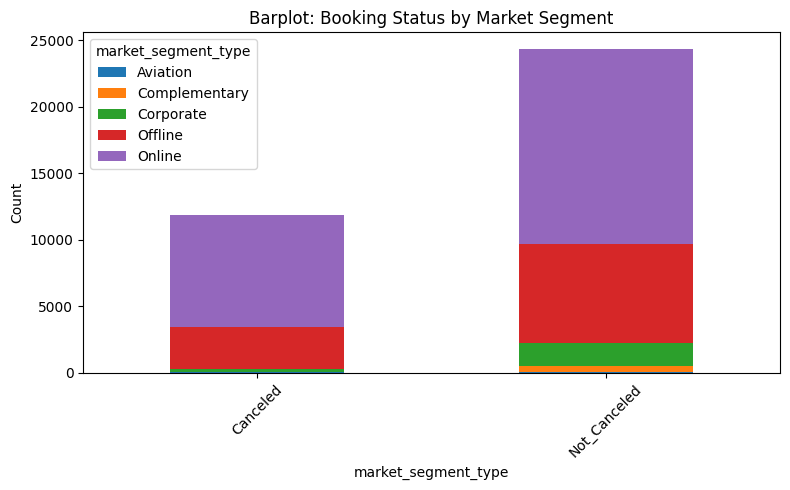

In [ ]:
# Print simple stacked barplot for bookings by market segment type
print_stacked_barplot(df_eda, 'booking_status', 'market_segment_type', 8, 5, 'Barplot: Booking Status by Market Segment')

In [ ]:
# Inspect cancellation averages by market segment
print('Averages by Market Segment:', df_eda['market_segment_type'].value_counts(normalize=True))

market_segments = df_eda['market_segment_type'].unique()

for segment in market_segments:
  print(f'\nCancellation Averages: {segment}', df_eda[df_eda['market_segment_type']==segment]['booking_status'].value_counts(normalize=True))

Averages by Market Segment: market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64

Cancellation Averages: Offline booking_status
Not_Canceled    0.700513
Canceled        0.299487
Name: proportion, dtype: float64

Cancellation Averages: Online booking_status
Not_Canceled    0.634919
Canceled        0.365081
Name: proportion, dtype: float64

Cancellation Averages: Corporate booking_status
Not_Canceled    0.890927
Canceled        0.109073
Name: proportion, dtype: float64

Cancellation Averages: Aviation booking_status
Not_Canceled    0.704
Canceled        0.296
Name: proportion, dtype: float64

Cancellation Averages: Complementary booking_status
Not_Canceled    1.0
Name: proportion, dtype: float64


**OBSERVATIONS**

* Fewer cancellations occur with Corporate rentals (only 10% of all Corporate bookings), although they are a much smaller subset of all cancellations.
* Online bookings dominate both cancellations (71%) and non-cancellations (60%), followed by Offline bookings.


###Cancellations by Room Type

Do cancellations vary by room type?

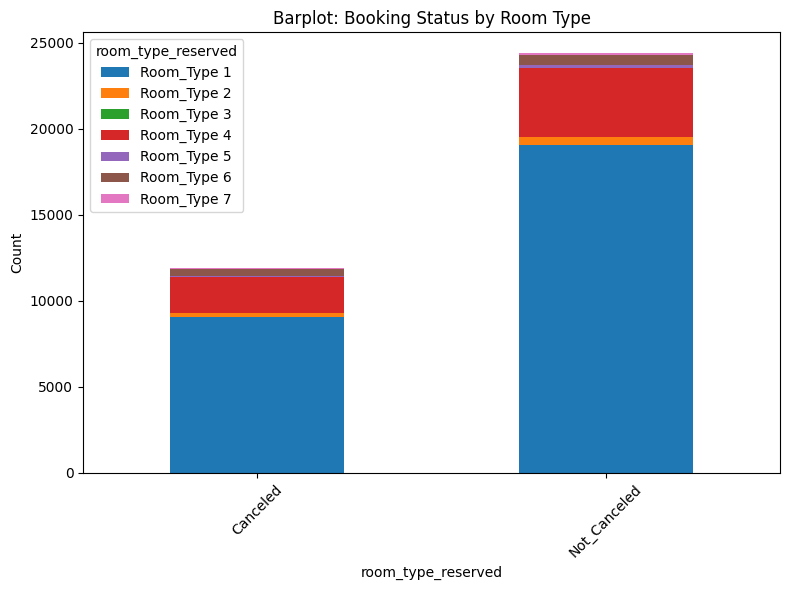

In [ ]:
# Print simple stacked barplot for bookings by market segment type
print_stacked_barplot(df_eda, 'booking_status', 'room_type_reserved', 8, 6, 'Barplot: Booking Status by Room Type')

In [ ]:
# Inspect cancellation averages by room type

print('Averages by Room Type:', df_eda['room_type_reserved'].value_counts(normalize=True))

room_types = df_eda['room_type_reserved'].unique()

for room in room_types:
  print(f'\nCancellation Averages: {room}', df_eda[df_eda['room_type_reserved']==room]['booking_status'].value_counts(normalize=True))

Averages by Room Type: room_type_reserved
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: proportion, dtype: float64

Cancellation Averages: Room_Type 1 booking_status
Not_Canceled    0.677497
Canceled        0.322503
Name: proportion, dtype: float64

Cancellation Averages: Room_Type 4 booking_status
Not_Canceled    0.658412
Canceled        0.341588
Name: proportion, dtype: float64

Cancellation Averages: Room_Type 2 booking_status
Not_Canceled    0.67052
Canceled        0.32948
Name: proportion, dtype: float64

Cancellation Averages: Room_Type 6 booking_status
Not_Canceled    0.57971
Canceled        0.42029
Name: proportion, dtype: float64

Cancellation Averages: Room_Type 5 booking_status
Not_Canceled    0.728302
Canceled        0.271698
Name: proportion, dtype: float64

Cancellation Averages: Room_Type 7 booking_status
Not_Canceled    0.772152
Canceled       

**OBSERVATIONS**

* Room Type 1 is reserved most often.
* Room Types 3, 5, and 7 are canceled most often (over 70%).

###Cancellations by Meal Plan Selection

Do cancellations vary by meal plan?

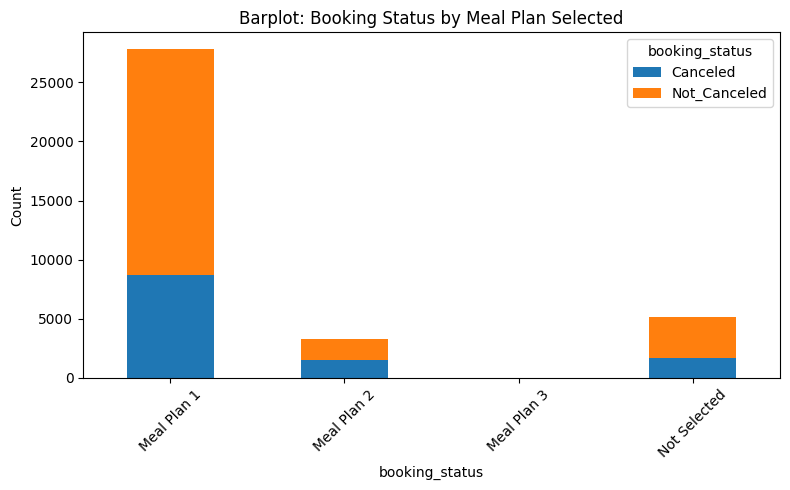

In [ ]:
# Print simple stacked barplot for bookings by month of year
print_stacked_barplot(df_eda, 'type_of_meal_plan', 'booking_status', 8, 5, 'Barplot: Booking Status by Meal Plan Selected')

In [ ]:
# Inspect cancellation averages by meal plan type

print('Averages by Meal Plan Type:', df_eda['type_of_meal_plan'].value_counts(normalize=True))

meal_plans = df_eda['type_of_meal_plan'].unique()

for plan in meal_plans:
  print(f'\nCancellation Averages: {plan}', df_eda[df_eda['type_of_meal_plan']==plan]['booking_status'].value_counts(normalize=True))

Averages by Meal Plan Type: type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64

Cancellation Averages: Meal Plan 1 booking_status
Not_Canceled    0.688198
Canceled        0.311802
Name: proportion, dtype: float64

Cancellation Averages: Not Selected booking_status
Not_Canceled    0.668811
Canceled        0.331189
Name: proportion, dtype: float64

Cancellation Averages: Meal Plan 2 booking_status
Not_Canceled    0.544327
Canceled        0.455673
Name: proportion, dtype: float64

Cancellation Averages: Meal Plan 3 booking_status
Not_Canceled    0.8
Canceled        0.2
Name: proportion, dtype: float64


**OBSERVATION**

* Meal Plan 1 is the most popular (and likely breakfast, if these are bed & breakfast properties).
* While there are many more cancellations for Meal Plan 1, the ratio of canceled vs. not canceled appears similar in all cases.
* Meal Plan 3 is rarely selected, but also rarely canceled.
* We can say the meal plans do not seem to be a factor in cancellations.

###Cancellations by Arrival Month

Are certain months prone to cancellation?

In [ ]:
# Create pivot for cancellation percentages by month
df_group_month_pivot_counts_canceled = df_eda[df_eda['booking_status'] == 'Canceled'].pivot_table(
    index=['arrival_month'],
    values=['booking_status'],
    aggfunc='count',
    margins=True,
    margins_name='Total Canceled'
)

df_group_month_pivot_counts_not_canceled = df_eda[df_eda['booking_status'] == 'Not_Canceled'].pivot_table(
    index=['arrival_month'],
    values=['booking_status'],
    aggfunc='count',
    margins=True,
    margins_name='Total Not Canceled'
)

#Rename the columns
df_group_month_pivot_counts_canceled.rename(columns={'booking_status': 'Canceled'}, inplace=True)
df_group_month_pivot_counts_not_canceled.rename(columns={'booking_status': 'Not_Canceled'}, inplace=True)

df_group_month_pivot_combined = pd.concat([df_group_month_pivot_counts_canceled, df_group_month_pivot_counts_not_canceled], axis=1)

df_group_month_pivot_combined.fillna(0, inplace=True)

df_group_month_pivot_combined['Cancellation_Percentage'] =df_group_month_pivot_combined['Canceled'] / df_group_month_pivot_combined['Not_Canceled']

# Calculate cancellation ratio
df_group_month_pivot_combined['Cancellation_Percentage'] = df_group_month_pivot_combined.apply(
    lambda row: 0 if row['Not_Canceled'] == 0 else row['Canceled'] / row['Not_Canceled'],
    axis=1
)

print('Average Cancellation Ratio:', df_group_month_pivot_combined['Cancellation_Percentage'].mean())
print('Median Cancellation Ratio:', df_group_month_pivot_combined['Cancellation_Percentage'].median())

df_group_month_pivot_combined

Average Cancellation Ratio: 0.4057180001587088
Median Cancellation Ratio: 0.4613417692600285


Canceled  Not_Canceled  Cancellation_Percentage
arrival_month                                                      
1                       24.0         990.0                 0.024242
2                      430.0        1274.0                 0.337520
3                      700.0        1658.0                 0.422195
4                      995.0        1741.0                 0.571511
5                      948.0        1650.0                 0.574545
6                     1291.0        1912.0                 0.675209
7                     1314.0        1606.0                 0.818182
8                     1488.0        2325.0                 0.640000
9                     1538.0        3073.0                 0.500488
10                    1880.0        3437.0                 0.546989
11                     875.0        2105.0                 0.415677
12                     402.0        2619.0                 0.153494
Total Canceled       11885.0           0.0                 0.000000
Total Not Canceled       0.0       24390.0                 0.000000

**OBSERVATION**

* Summer season has the most cancellations, at 68% for June, 82% for July, 64% for August.
* The fewest cancellations occur in December and January.

###Cancellations and Lead Time

Does lead time impact cancellation rates?

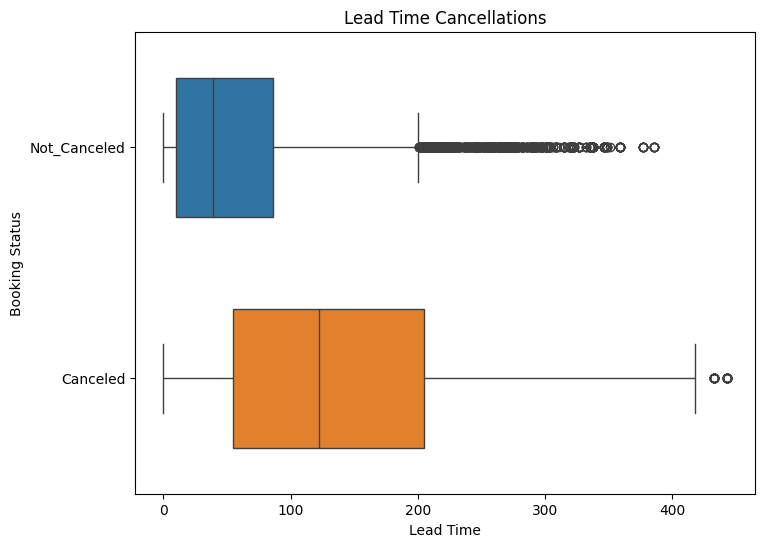

In [ ]:
# Create a boxplot for both canceled and non-cancelled booking distribution by amount of lead time.
# Here, we'll need to create the chart since the existing UDF does not accept hue as an input

# Set figure size
plt.figure(figsize=(8, 6))

# Create boxplot with seaborn
sns.boxplot(data=df_eda, x='lead_time', y='booking_status', orient='h', hue='booking_status', width=0.6)

# Set title and labels
plt.title('Lead Time Cancellations')
plt.xlabel('Lead Time')
plt.ylabel('Booking Status')

# Show plot
plt.show()

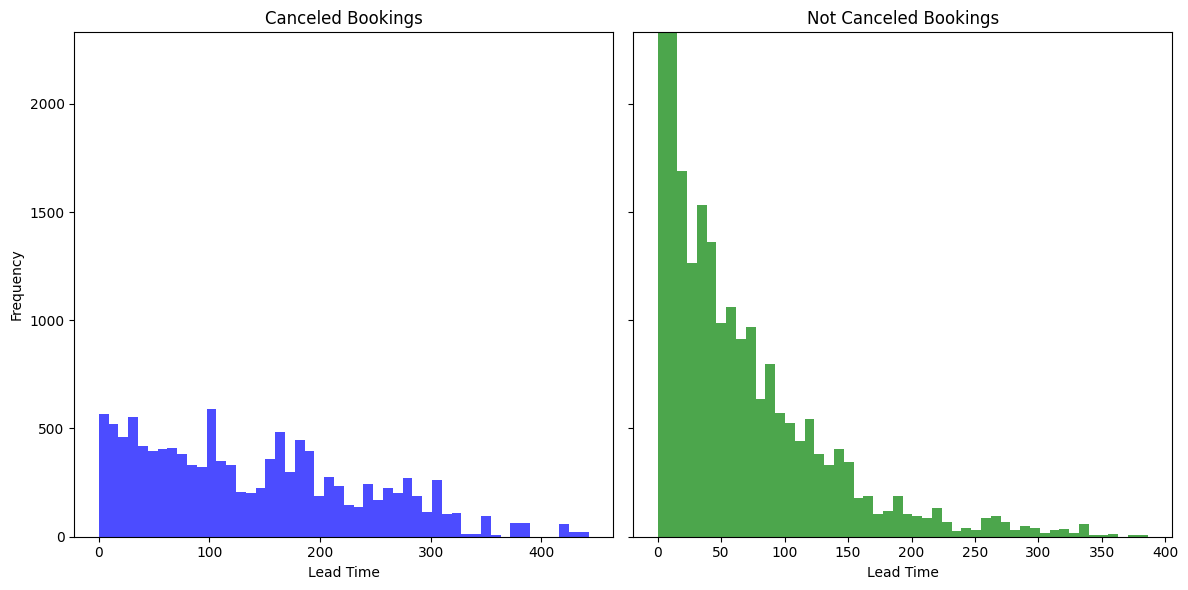

In [ ]:
# Create a similar chart but with a histogram

# Define bins for lead_time
bins = 50  # Number of bins

# Separate lead_time values by booking_status
lead_time_canceled = df_eda[df_eda['booking_status'] == 'Canceled']['lead_time']
lead_time_not_canceled = df_eda[df_eda['booking_status'] == 'Not_Canceled']['lead_time']

# Calculate y-axis limits for both histograms
max_count = lead_time_not_canceled.max() + lead_time_canceled.max() + 1500

# Create subplots for side-by-side histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot histogram for Canceled bookings on the left
ax1.hist(lead_time_canceled, bins=bins, alpha=0.7, color='blue')
ax1.set_title('Canceled Bookings')
ax1.set_xlabel('Lead Time')
ax1.set_ylabel('Frequency')
ax1.set_ylim(0, max_count + 1)  # Set y-axis limits

# Plot histogram for Not Canceled bookings on the right
ax2.hist(lead_time_not_canceled, bins=bins, alpha=0.7, color='green')
ax2.set_title('Not Canceled Bookings')
ax2.set_xlabel('Lead Time')
ax2.set_ylim(0, max_count + 1)  # Set y-axis limits

# Show plot
plt.tight_layout()
plt.show()



**OBSERVATIONS**

* Earlier we found a negative correlation between lead time and booking status.
* It does appear that the majority of non-cancelled bookings are placed with shorter lead times.
* Overall the number of cancellations decreases with lead time of about 6 months.
* The most cancellations seem to occur with lead times of less than 25 days and also spikes around 100 days.

###Cancellations by Repeat Guests

Let's chart cancellations with respect to how many prior visits were made and either canceled or not canceled.

In [ ]:
# Copy the dataframe
df_eda_repeat_guests = df_eda[df_eda['repeated_guest'] == 1].copy()

# Add a total visits column
df_eda_repeat_guests['total_visits'] = df_eda_repeat_guests['no_of_previous_cancellations'] + df_eda_repeat_guests['no_of_previous_bookings_not_canceled']
df_eda_repeat_guests['perc_canceled'] = df_eda_repeat_guests['no_of_previous_cancellations'] / df_eda_repeat_guests['total_visits']
df_eda_repeat_guests['perc_not_canceled'] = df_eda_repeat_guests['no_of_previous_bookings_not_canceled'] / df_eda_repeat_guests['total_visits']

print('Average # of repeat visits:',
      df_eda_repeat_guests['total_visits'].mean())
print('Average # of prior cancellations:',df_eda_repeat_guests['no_of_previous_cancellations'].mean())
print('Average # of prior non-cancellations:',df_eda_repeat_guests['no_of_previous_bookings_not_canceled'].mean())
print('Average ratio of cancellations for repeat guests:',df_eda_repeat_guests['perc_canceled'].mean())
print('Average ratio of non-cancellations for repeat guests:',df_eda_repeat_guests['perc_not_canceled'].mean())


Average # of repeat visits: 6.894623655913978
Average # of prior cancellations: 0.910752688172043
Average # of prior non-cancellations: 5.983870967741935
Average ratio of cancellations for repeat guests: 0.18579533181592528
Average ratio of non-cancellations for repeat guests: 0.8142046681840748


In [ ]:
# Create a pivot table to show prior visits for repeat guests
df_group_prior_visits = df_eda_repeat_guests.pivot_table(index=['booking_status']
                                                     ,values=['total_visits','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']
                                                     ,aggfunc='mean'
                                                     ,margins=True
                                                     ,margins_name='Average Repeat Customer Visits'
                                                     )
df_group_prior_visits

no_of_previous_bookings_not_canceled  \
booking_status                                                         
Canceled                                                    1.625000   
Not_Canceled                                                6.060175   
Average Repeat Customer Visits                              5.983871   

                                no_of_previous_cancellations  total_visits  
booking_status                                                              
Canceled                                            4.125000      5.750000  
Not_Canceled                                        0.854486      6.914661  
Average Repeat Customer Visits                      0.910753      6.894624

In [ ]:
# Create pivot table for repeat visits (counts and percentages)
df_group_repeat_pivot_counts_both = df_eda_repeat_guests.pivot_table(
    index=['booking_status'],
    values=['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'],
    aggfunc='sum'
)

<Figure size 1200x1200 with 0 Axes>

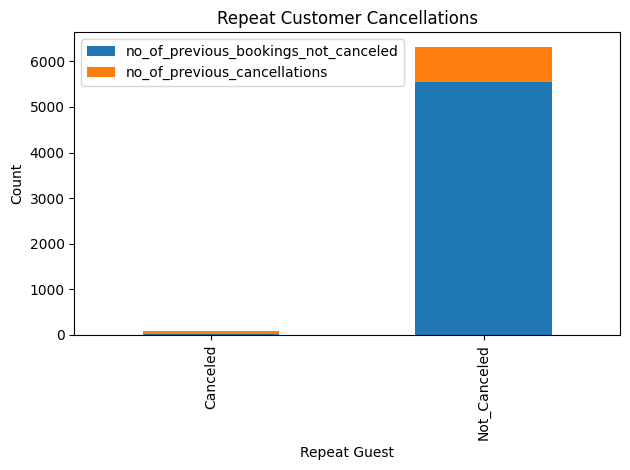

In [ ]:
# Print simple stacked barplot for bookings by repeat guests
plt.figure(figsize=(12, 12))

df_group_repeat_pivot_counts_both.plot(kind='bar', stacked=True)
plt.title('Repeat Customer Cancellations')
plt.xlabel('Repeat Guest')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Add new column for total bookings
df_group_repeat_pivot_counts_both['total_bookings'] = df_group_repeat_pivot_counts_both['no_of_previous_cancellations'] + df_group_repeat_pivot_counts_both['no_of_previous_bookings_not_canceled']
df_group_repeat_pivot_counts_both['cancellation_rate'] = df_group_repeat_pivot_counts_both['no_of_previous_cancellations'] / df_group_repeat_pivot_counts_both['total_bookings']

display(df_group_repeat_pivot_counts_both)

no_of_previous_bookings_not_canceled  \
booking_status                                         
Canceled                                          26   
Not_Canceled                                    5539   

                no_of_previous_cancellations  total_bookings  \
booking_status                                                 
Canceled                                  66              92   
Not_Canceled                             781            6320   

                cancellation_rate  
booking_status                     
Canceled                 0.717391  
Not_Canceled             0.123576

**OBSERVATIONS**

* If someone has canceled a booking prior, we can say the chance appears much higher that they will cancel for future reservations and attempt to predict this later.
  * For bookings with no prior cancellations, only around 12% were canceled (less than half the average rate).
  * For bookings with prior cancellations, this rises to nearly 72% (about twice the rate).

###Cancellations by Special Request Count

Do special requests impact cancellations?

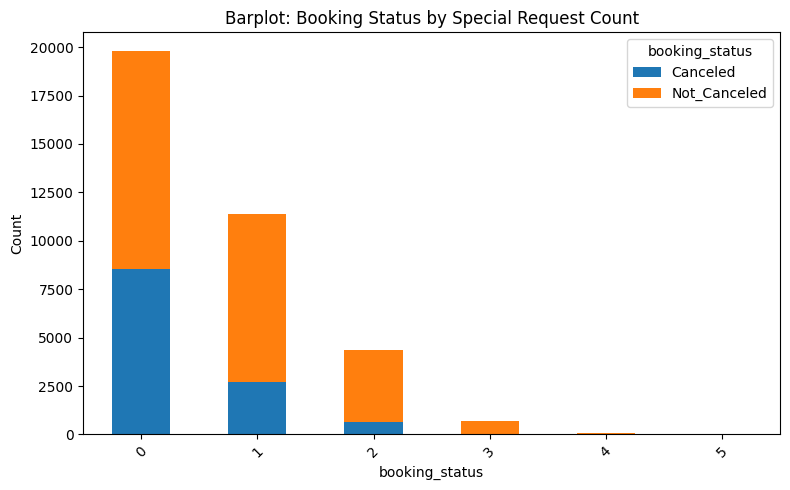

In [ ]:
# Print simple stacked barplot for bookings by special requests
print_stacked_barplot(df_eda, 'no_of_special_requests', 'booking_status', 8, 5, 'Barplot: Booking Status by Special Request Count')

**OBSERVATIONS**

* The number of special requests does appear to impact cancellation rates in terms of the ratio of canceled to non-canceled bookings.
* Bookings with more than 2 special requests are rarely canceled.

###Cancellations by Parking Space Request Count

Does the need for parking contribute to cancellations?

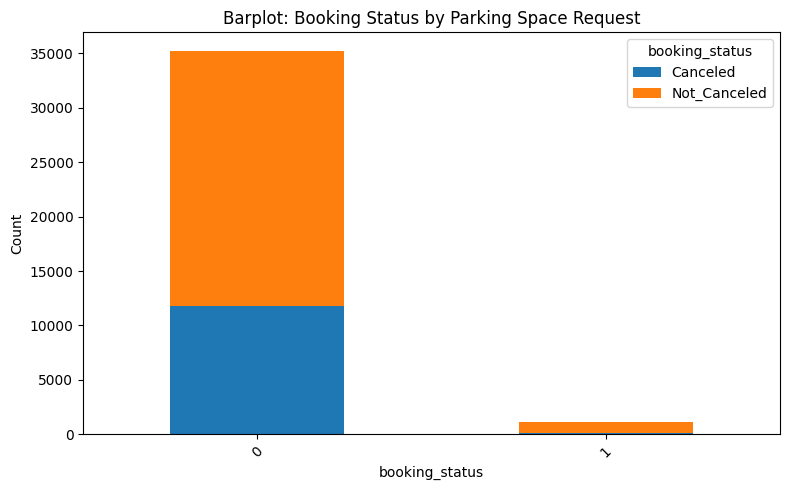

In [ ]:
# Print simple stacked barplot for bookings by parking space required
print_stacked_barplot(df_eda, 'required_car_parking_space', 'booking_status', 8, 5, 'Barplot: Booking Status by Parking Space Request')

**OBSERVATIONS**

* The need for a parking space does not appear to impact cancellation rates.

## Questions to Answer

#### Question 1: What are the busiest months in the hotel?

To find this, we need to account for the number of bookings by month.

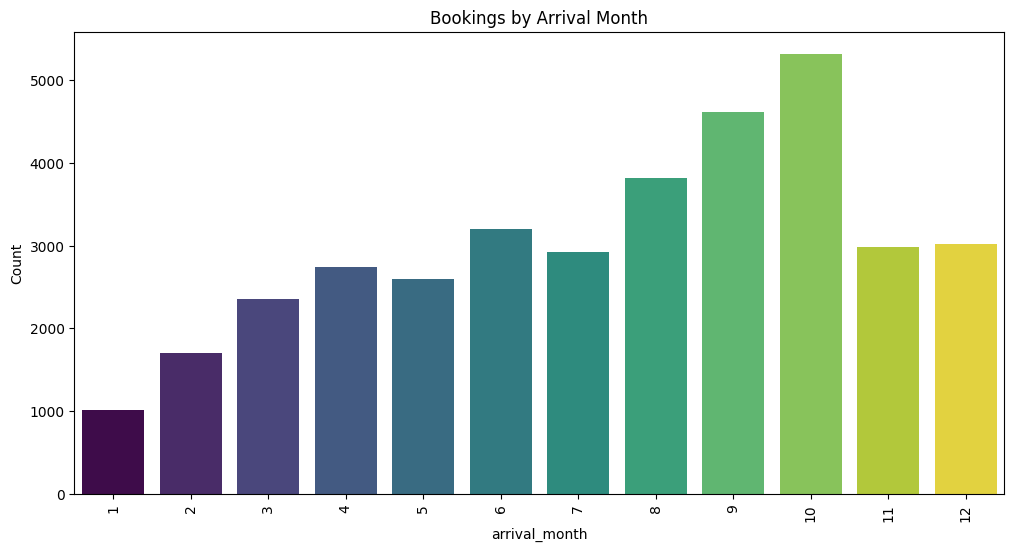

In [ ]:
df_bookings_by_month = df_eda.groupby('arrival_month')['Booking_ID'].count().reset_index()
print_simple_count_barplot(df_bookings_by_month, 'arrival_month', 12, 6, 'Bookings by Arrival Month')

**OBSERVATIONS**

* In general, Fall is the busiest season.
  * October is the busiest month, followed by September and August.
* January is the least busiest month for bookings.

#### Question 2: Which market segment do most of the guests come from?

To find this, we'll group the bookings by segment.

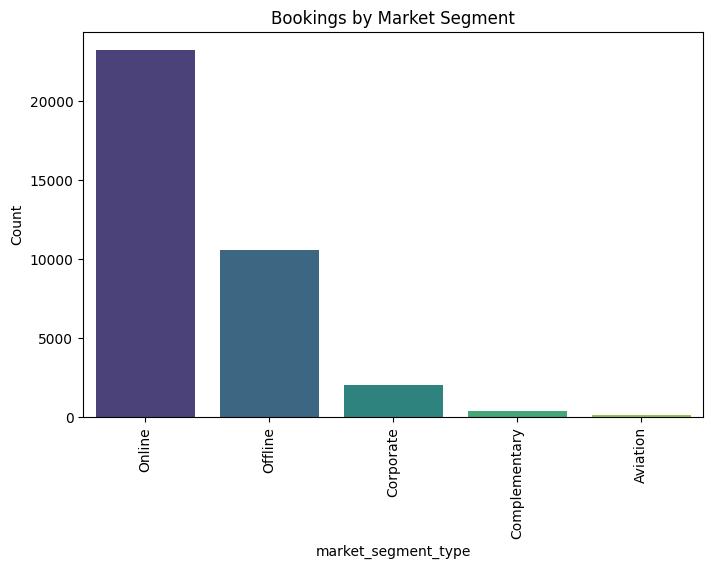

In [ ]:
df_bookings_by_segment = df_eda.groupby('market_segment_type')['Booking_ID'].count().reset_index()
print_simple_count_barplot(df_bookings_by_segment, 'market_segment_type', 8, 5, 'Bookings by Market Segment')

**OBSERVATION**

* Online bookings constitute the majority of the dataset.
* About half of the remaining bookings are made offline.
* Very few bookings are made for Corporate, Complementary, or Aviation market segements.

#### Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

To determine rates by market segment, we need to aggregrate the data by segment and view totals. A crosstab is a simple way to achieve this.

In [ ]:
# Create a pivot table with mean, min, and max of ave_price_per_room by market_segment_type
pivot_table_price_by_market_segment = pd.pivot_table(  df_eda
                                                     , values='avg_price_per_room'
                                                     , index='market_segment_type'
                                                     , aggfunc={'avg_price_per_room': ['mean', 'min', 'max']}
                                                    )
# Sort values
pivot_table_price_by_market_segment = pivot_table_price_by_market_segment.sort_values(by='mean', ascending=False)


In [ ]:
# Display pivot
pivot_table_price_by_market_segment.applymap(format_euros)

max     mean     min
market_segment_type                          
Online               €375.50  €112.26   €0.00
Aviation             €110.00  €100.70  €79.00
Offline              €540.00   €91.63  €12.00
Corporate            €220.00   €82.91  €31.00
Complementary        €170.00    €3.14   €0.00

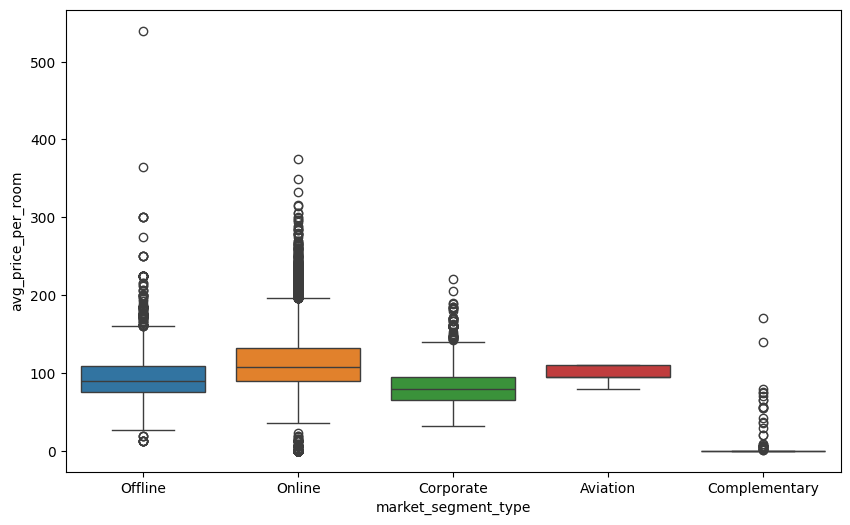

In [ ]:
# Create a plot to see how prices vary by market segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda, x='market_segment_type', y='avg_price_per_room', hue='market_segment_type')
plt.show()


**OBSERVATION**

* The most expensive rates on average are for rooms booked Online, at 112 EUR on average.
* Complementary bookings have the lowest rate at 3.14 EURO.
  * Since complementary implies free, we may need to further investigation. Perhap taxes account for these rates.
* Except for Complementary bookings, the average price is around 100 EUR..
* Some Offline bookings have exceptionally high rates, ranging up to 540 EUR. We can see this in the outliers.
* Aviation bookings have the tightest range and fewest outliers.


#### Question 4: What percentage of bookings are canceled?

We can easily find this by checking the normalized value counts.

In [ ]:
df_eda['booking_status_active_int'].value_counts(normalize=True)

booking_status_active_int
1    0.672364
0    0.327636
Name: proportion, dtype: float64

**OBSERVATION**

* 32.7% of bookings are canceled


#### Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

We can create a grouped dataset for repeat vs. non-repeat guests, and inspect the percentages for each group.

In [ ]:
# Create pivot table with counts
pivot_counts = df_eda.pivot_table( index='repeated_guest'
                             , columns='booking_status_active_int'
                             , values='Booking_ID'
                             , aggfunc='count'
                             , margins=True
                             , margins_name='Total')

# Calculate percentages
pivot_percentages = pivot_counts.div(pivot_counts.loc['Total']) * 100

# Format percentages to two decimal places
pivot_percentages = pivot_percentages.round(2)

# Display the pivot table with counts and percentages
print('Pivot table with counts:')
display(pivot_counts)
print('\nPivot table with percentages (%):')
display(pivot_percentages)

Pivot table with counts:


booking_status_active_int      0      1  Total
repeated_guest                                
0                          11869  23476  35345
1                             16    914    930
Total                      11885  24390  36275


Pivot table with percentages (%):


booking_status_active_int       0       1   Total
repeated_guest                                   
0                           99.87   96.25   97.44
1                            0.13    3.75    2.56
Total                      100.00  100.00  100.00

**OBSERVATION**

* Out of all 36,275 bookings, only 930 were booked by repeat guests (2.56% of all bookings).
* 16 of those 930 repeat customer bookings were canceled (1.72% of all bookings).

#### Question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

To answer this question, we need to compare the cancelled bookings against the special requirements.

In [ ]:
# Create pivot table with counts
pivot_spreq_cancellation_counts = df_eda.pivot_table( index='no_of_special_requests'
                             , columns='booking_status'
                             , values='Booking_ID'
                             , aggfunc='count'
                             , margins=True
                             , margins_name='Total').fillna(0)

# Calculate percentages
pivot_spreq_cancellation_percentages = pivot_spreq_cancellation_counts.div(pivot_spreq_cancellation_counts.loc['Total']) * 100

# Format percentages to two decimal places
pivot_spreq_cancellation_percentages = pivot_spreq_cancellation_percentages.round(2)

# Display the pivot table with counts and percentages
print('Pivot table with counts:')
display(pivot_spreq_cancellation_counts)
print('\nPivot table with percentages (%):')
display(pivot_spreq_cancellation_percentages)

Pivot table with counts:


booking_status          Canceled  Not_Canceled  Total
no_of_special_requests                               
0                         8545.0       11232.0  19777
1                         2703.0        8670.0  11373
2                          637.0        3727.0   4364
3                            0.0         675.0    675
4                            0.0          78.0     78
5                            0.0           8.0      8
Total                    11885.0       24390.0  36275


Pivot table with percentages (%):


booking_status          Canceled  Not_Canceled   Total
no_of_special_requests                                
0                          71.90         46.05   54.52
1                          22.74         35.55   31.35
2                           5.36         15.28   12.03
3                           0.00          2.77    1.86
4                           0.00          0.32    0.22
5                           0.00          0.03    0.02
Total                     100.00        100.00  100.00

11885 bookings were canceled, while 24390 were not canceled.


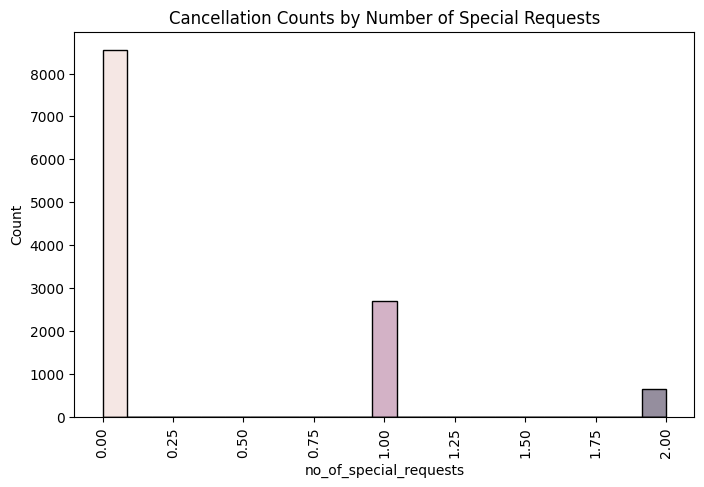

In [ ]:
# Create a plot to see how how special requests impact cancellations

df_spreq_cancellations = df_eda[df_eda['booking_status'] == 'Canceled']
print(df_spreq_cancellations.shape[0],'bookings were canceled, while',df_eda.shape[0]-df_spreq_cancellations.shape[0],'were not canceled.')
print_histogram(df_spreq_cancellations, 'no_of_special_requests', 8, 5, 'Cancellation Counts by Number of Special Requests', hue='no_of_special_requests')


**OBSERVATIONS**

* The majority of the cancellations (8,545 out of 11,885, or 71.9% of all cancellations) had no special requests at all.
* Just over 22% of cancellations had a single special request.
* About 5% of cancellations had two special requests.
* A higher number of special requests shows very few cancellations; therefore, we can say that more special requests do not result in higher numbers of cancellations.

This is one row in the data, and should not greatly impact the overall model. However, we may decide later to test the model excluding this row to see if it makes a true difference, before we land on our final model.

## Data Preprocessing

Before we move into modeling the data, let's process it to ensure we're starting with a clean dataset.

- Missing value treatment
- Feature engineering
- Outlier detection and treatment



In [ ]:
# Create a copy of the original dataframe
df_clean = df.copy()

###Missing Values

Earlier, we determined that the dataset had no missing values, but we can revisit.

In [ ]:
print('The dataset has',df.isnull().sum(),'null values.')

The dataset has Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
booking_status_int                      0
dtype: int64 null values.


###Feature Engineering

Because we don't need to consider certain columns such as unique identifiers in our model, we can safely drop booking ID.

We also need to decide whether to convert some of our categorical values to numerical ones, or treat them as dummy variables in our model.

In [ ]:
# Drop booking Id in our dataframe copy

df_clean.drop('Booking_ID', axis=1, inplace=True)

In [ ]:
# List our categorical series again, with their unique values
for series in series_values:
    if series in list_catcol:
      print('Feature:', series)
      print(df_clean[series].unique())
      print()


Feature: type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Feature: room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Feature: market_segment_type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Feature: booking_status
['Not_Canceled' 'Canceled']



In [ ]:
# Convert Booking Status to an integer status

# Define mapping dictionary
mapping_booking_status = {
    'Not_Canceled': 0,
    'Canceled': 1
}

# Remap values
remapped_booking_status = [mapping_booking_status[value] for value in series_values['booking_status']]

print('Remapped values for booking status:', remapped_booking_status)

# Update the column
df['booking_status_int'] = df['booking_status'].map(mapping_booking_status)

# Drop the original column
df_clean.drop('booking_status', axis=1, inplace=True)

Remapped values for booking status: [0, 1]


Let's preview our final clean dataframe, and create new lists for categorical and numerical data, and re-run our original univariate analysis.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
# Finally, create our new numerical and categorical column lists
list_catcol = df_clean.select_dtypes(include=['object']).columns.to_list()
list_numcol = df_clean.select_dtypes(exclude=['object']).columns.to_list()

print('Catcol:',list_numcol)
print('Numcol:',list_numcol)

Catcol: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status_int']
Numcol: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status_int']


In [ ]:
# Preview the final, cleaned dataframe
df_clean

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4             48          2018              4            11   
...          ...           ...            ...           ...   
36270         85          2018              8             3   
36271        228          2018             10            17   
36272        148          2018              7             1   
36273         63          2018              4            21   
36274        207          2018             12            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
36270              Online               0                             0   
36271              Online               0                             0   
36272              Online               0                             0   
36273              Online               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                         

###Treatment of Outliers

We noted earlier that several features have outliers. While we may opt to leave these in place, we should investigate any egregious records.

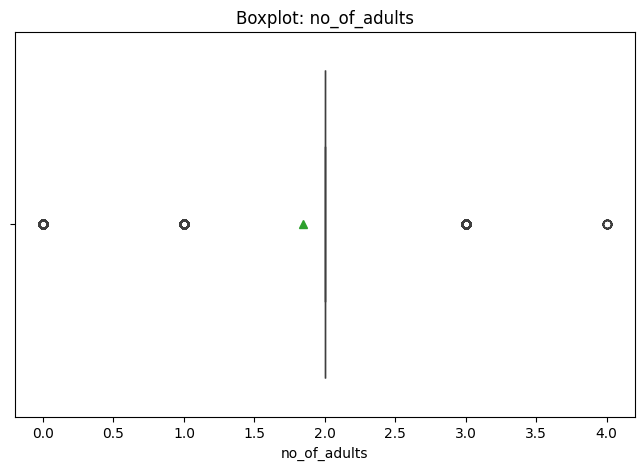

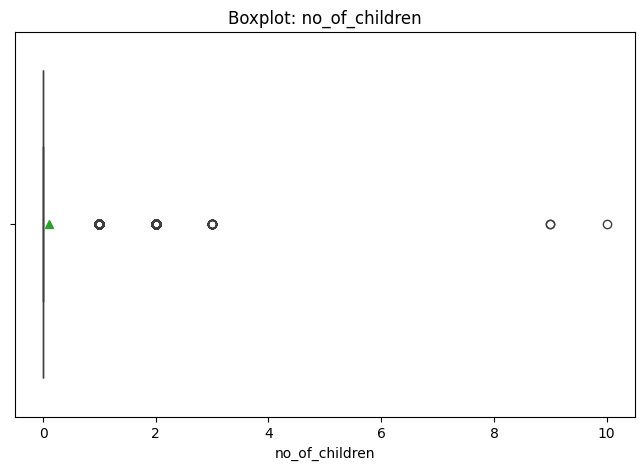

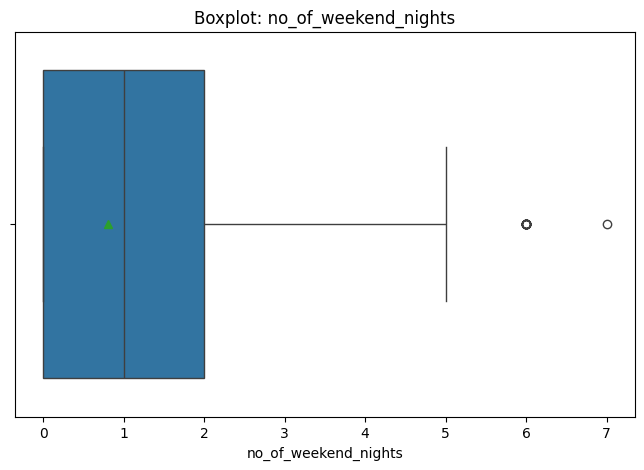

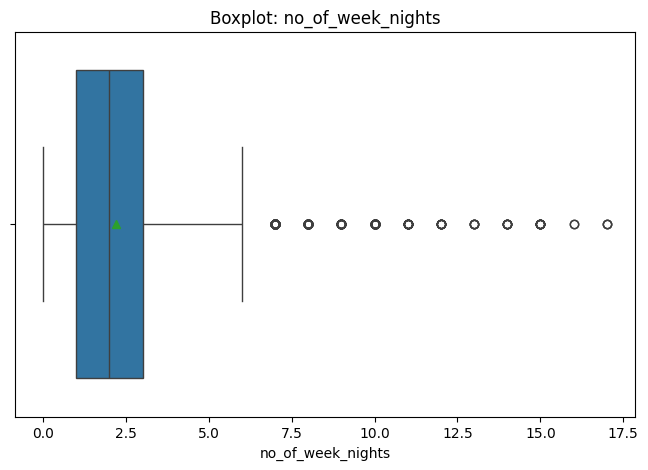

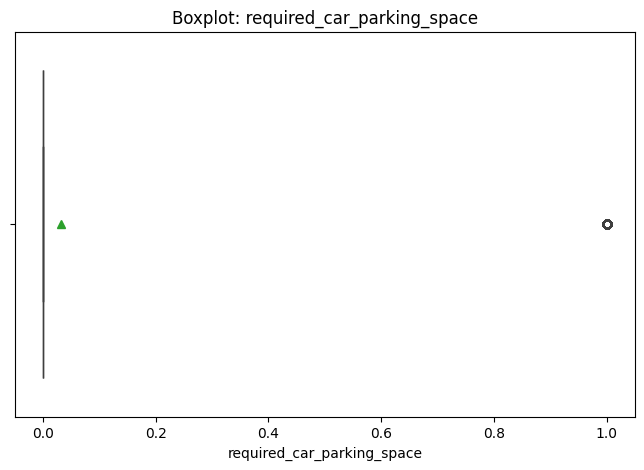

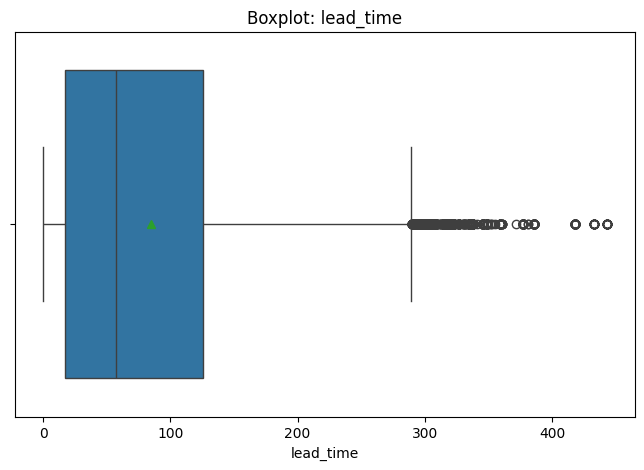

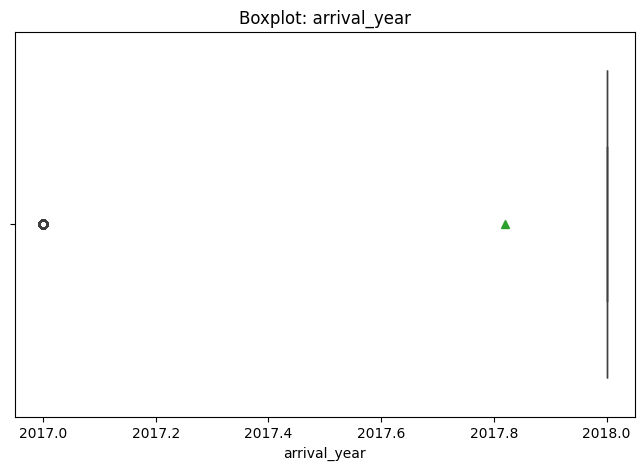

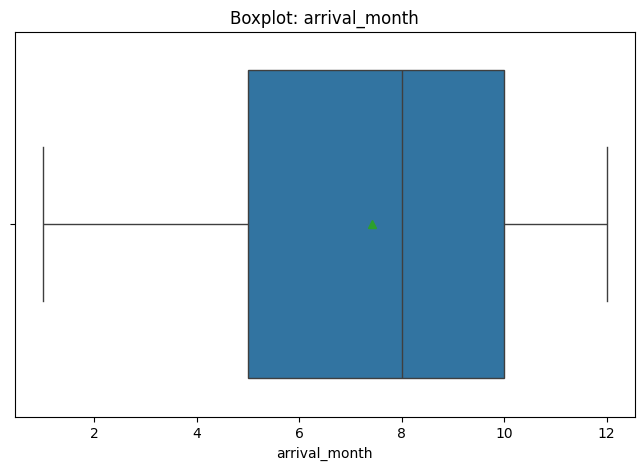

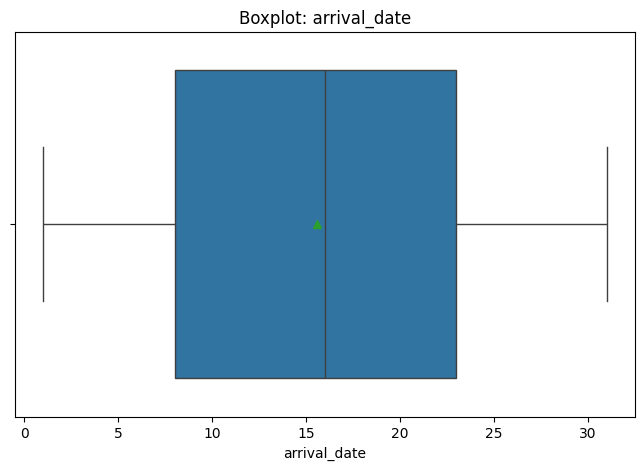

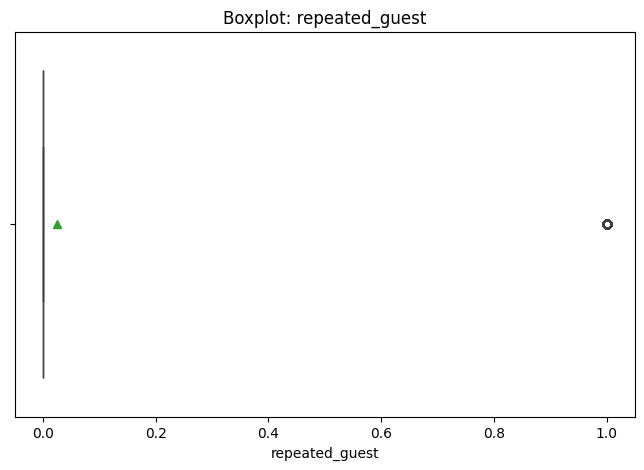

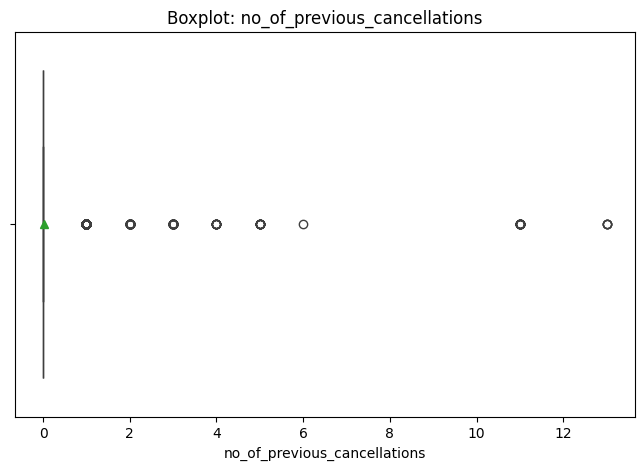

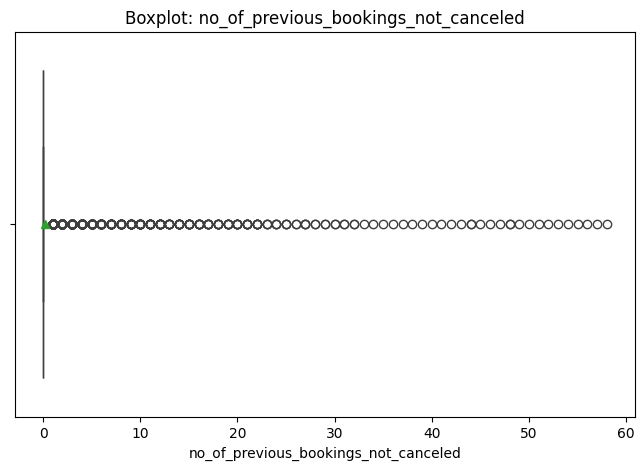

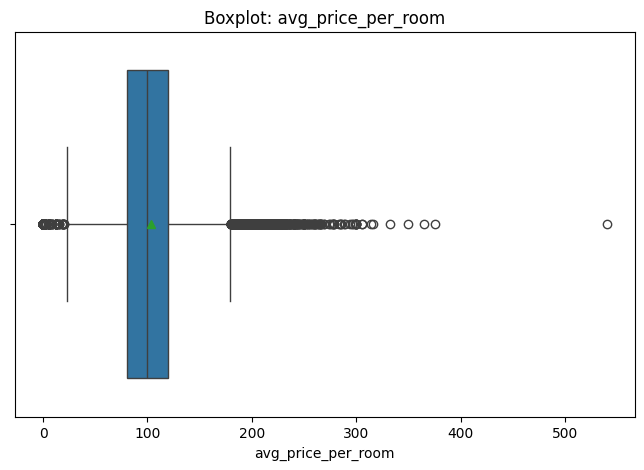

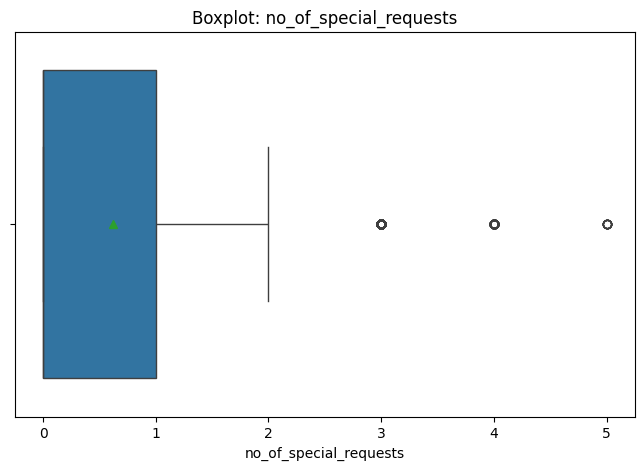

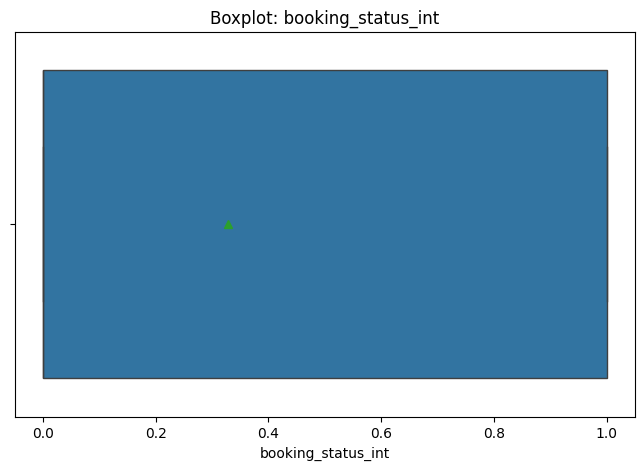

In [ ]:
# Print boxplots for each numeric column
for col in list_numcol:
    title = f'Boxplot: {col}'
    print_boxplot(df_clean, col, 8, 5, title)


Let's look at the records with 0 adults, as the properties likely do not rent to minors.

While this does seem suspect, it could be that bookings for families included multiple rooms, and some of the rooms were occupied only by non-adults. We will leave these in place.

In [ ]:
df_clean[df_clean['no_of_adults'] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
32                0               2                     0                  3   
287               0               2                     2                  2   
653               0               2                     1                  2   
937               0               2                     0                  3   
954               0               2                     1                  1   
...             ...             ...                   ...                ...   
34720             0               2                     0                  3   
34730             0               2                     1                  1   
34890             0               2                     2                  2   
35691             0               2                     2                  1   
35797             0               2                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
32          Meal Plan 1                           0        Room_Type 2   
287         Meal Plan 1                           0        Room_Type 1   
653         Meal Plan 1                           0        Room_Type 2   
937         Meal Plan 1                           0        Room_Type 2   
954         Meal Plan 1                           0        Room_Type 2   
...                 ...                         ...                ...   
34720       Meal Plan 1                           0        Room_Type 2   
34730       Meal Plan 1                           0        Room_Type 2   
34890       Meal Plan 1                           0        Room_Type 2   
35691       Meal Plan 1                           0        Room_Type 2   
35797       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_year  arrival_month  arrival_date  \
32            56          2018             12             7   
287           68          2018              4            24   
653           78          2018              8            19   
937           40          2018              1            14   
954           92          2018             10            29   
...          ...           ...            ...           ...   
34720         76          2018              9            21   
34730        178          2018              8            27   
34890         31          2018              9            16   
35691         75          2018              3            19   
35797        120          2018              6            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
32                 Online               0                             0   
287                Online               0                             0   
653                Online               0                             0   
937                Online               0                             0   
954                Online               0                             0   
...                   ...             ...                           ...   
34720              Online               0                             0   
34730              Online               0                             0   
34890              Online               0                             0   
35691              Online               0                             0   
35797              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
32                                        0               82.44   
287                                       0              108.38   
653                                       0              115.68   
937                                       0                6.67   
954                                       0               81.50   
...                                     ...                 ...   
34720                         

We can also see a very high price outlier data point, so let's look into this.

In [ ]:
df_clean[df_clean['avg_price_per_room'] > 500]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0               540.0   

       no_of_special_requests  booking_status_int  
33114                       0                   1

### Exploratory Data Analysis, Revisited

- We dropped one column from the data, and added more. Let's revisit the data distribution to ensure it has not fundamentally changed.

In [ ]:
# Determine if we want to display data for all numerical columns or only some
list_numcol


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status_int']

In [ ]:
# Check for NaNs
df_clean.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status_int                      0
dtype: int64

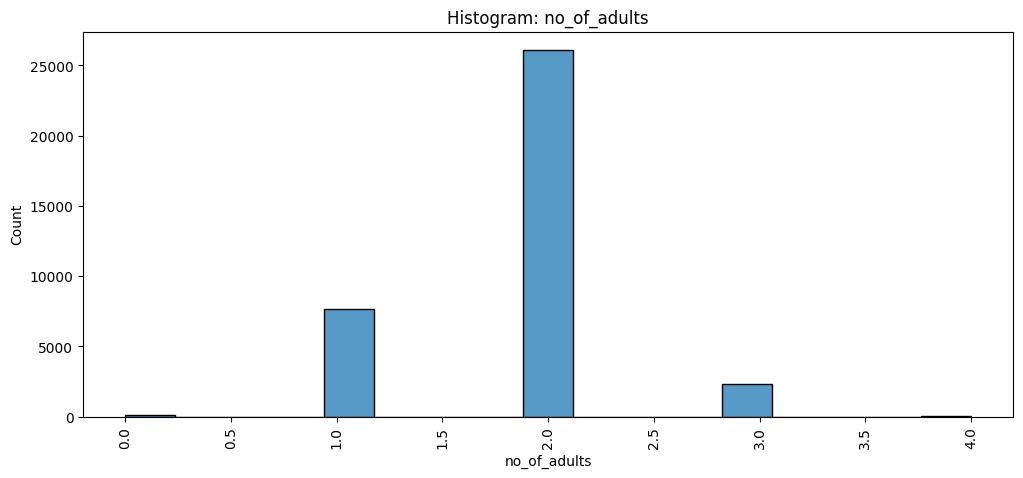

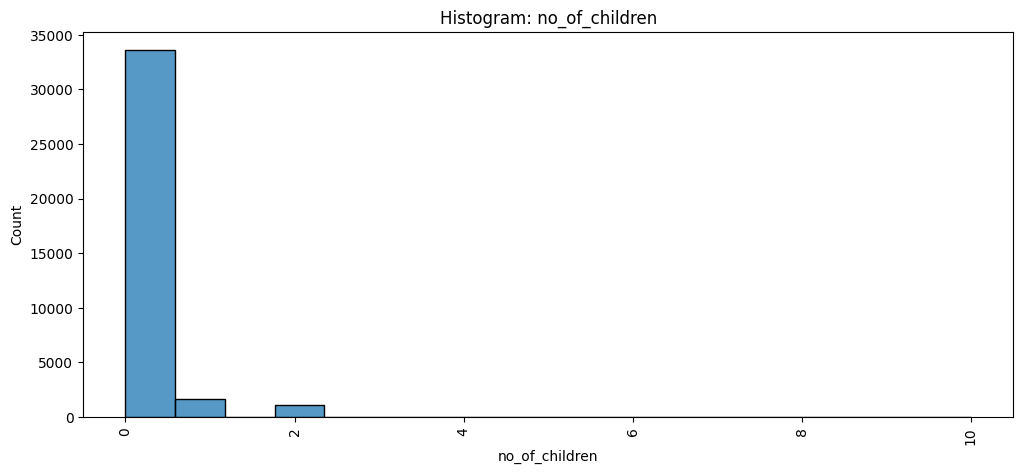

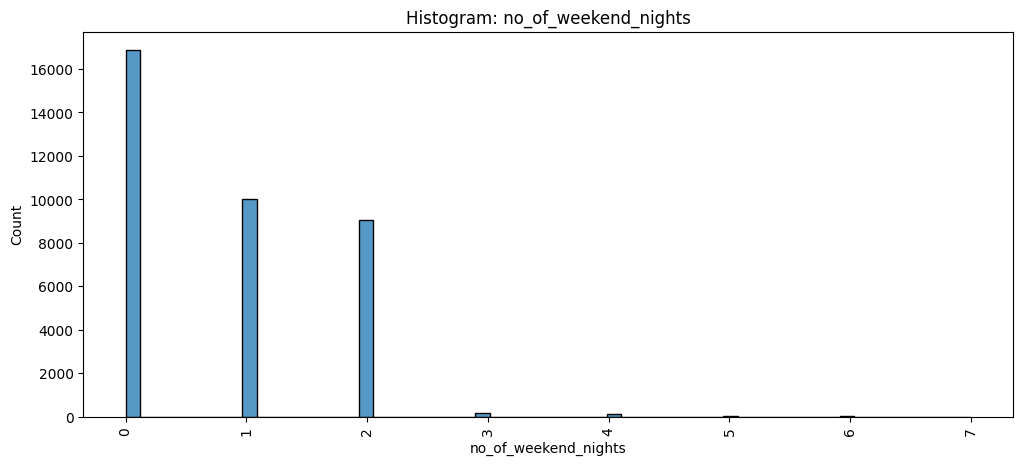

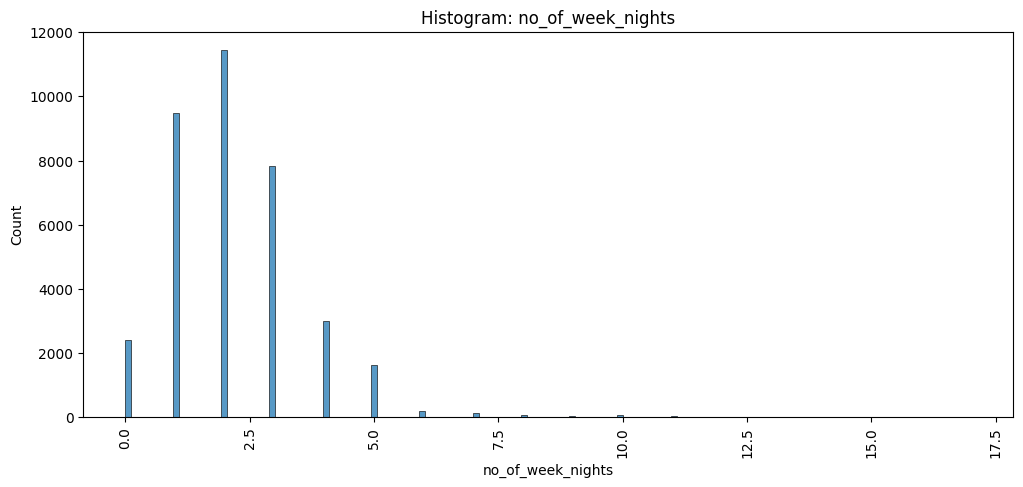

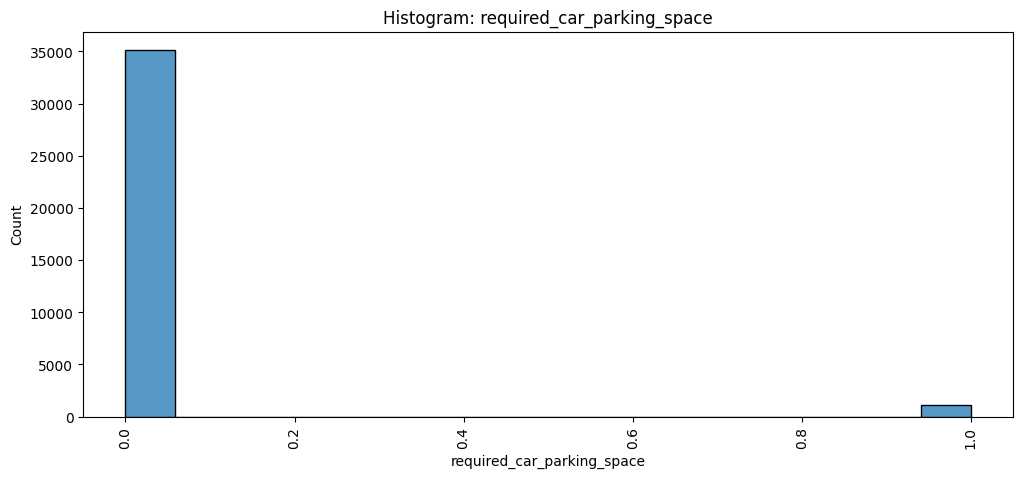

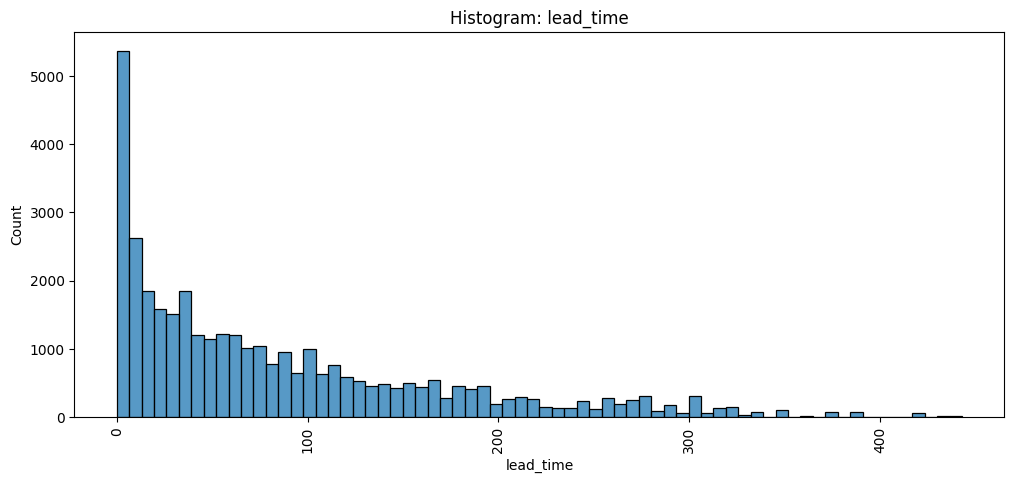

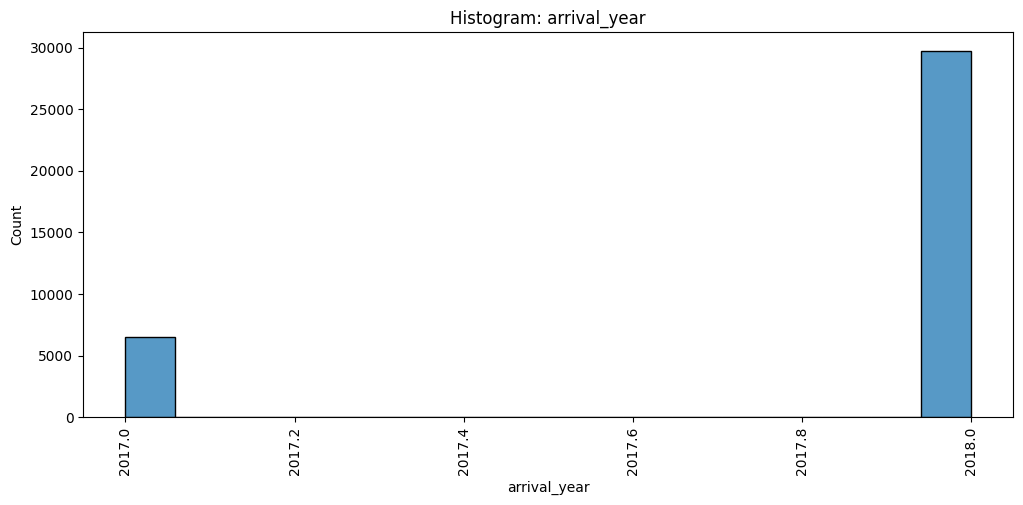

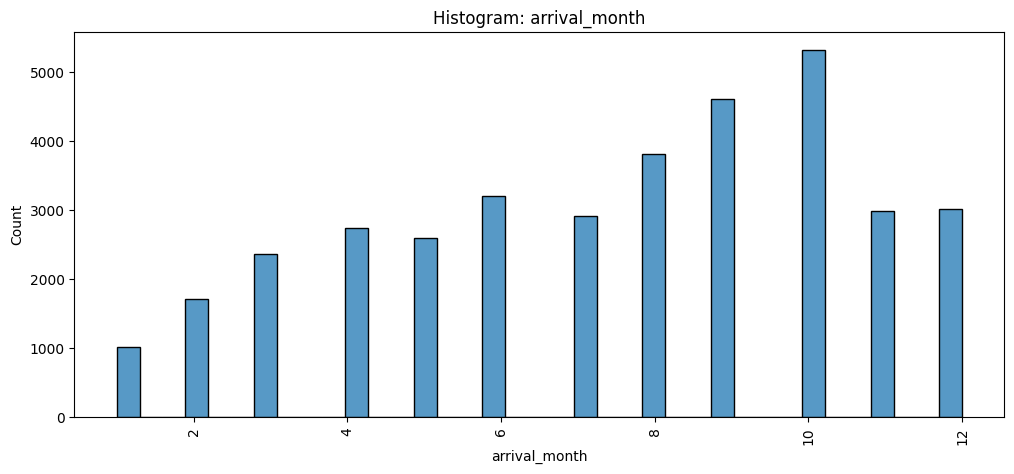

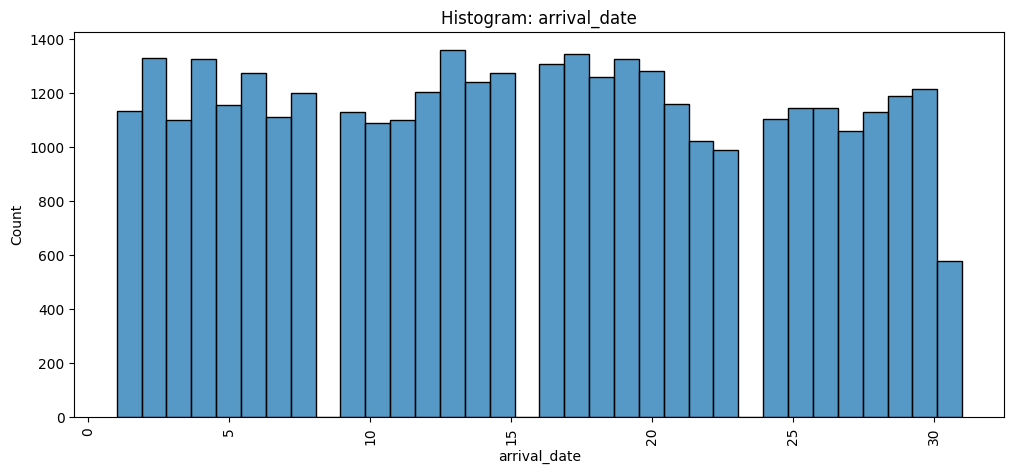

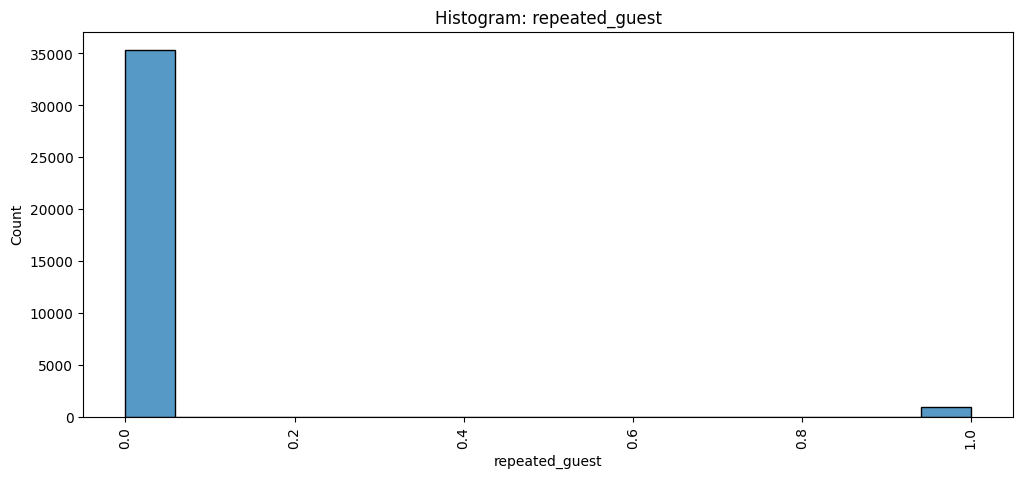

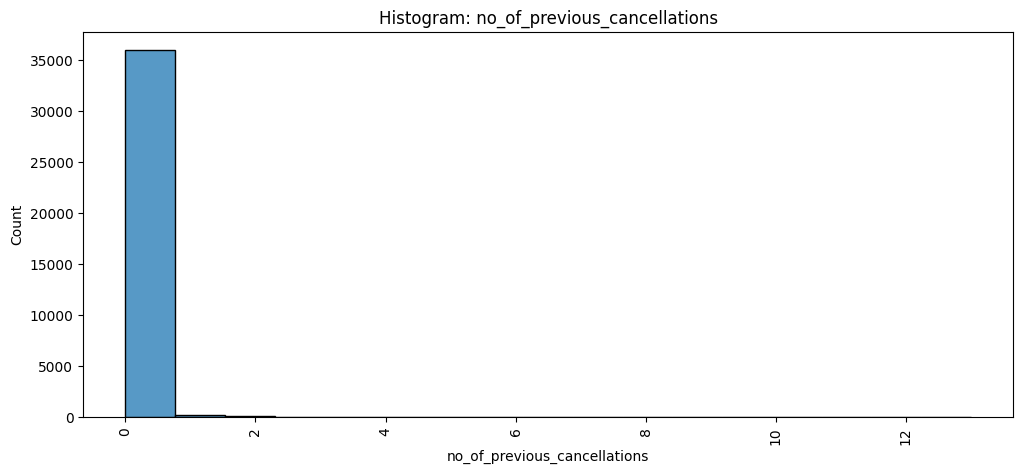

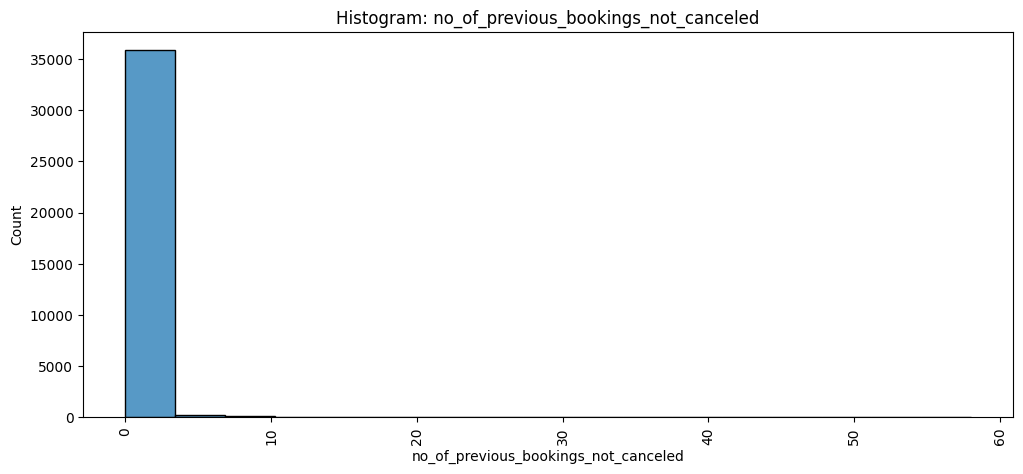

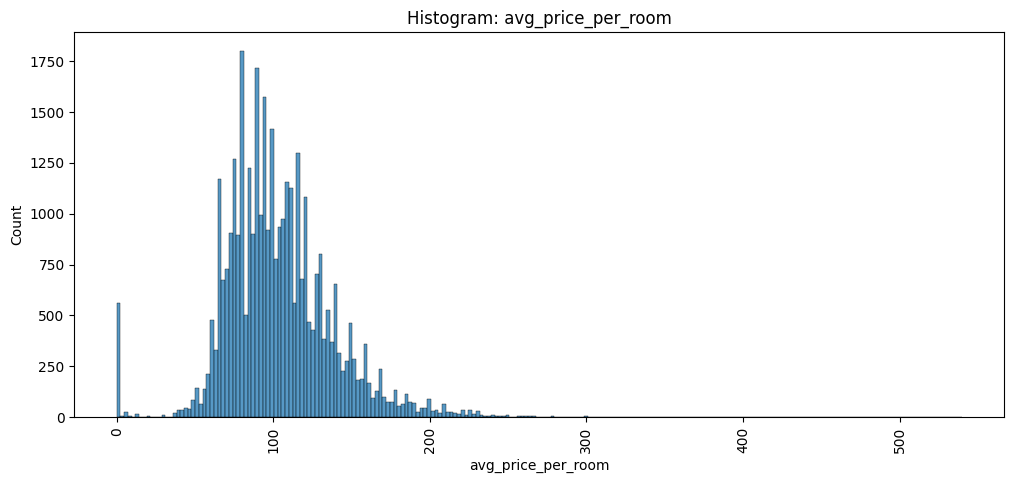

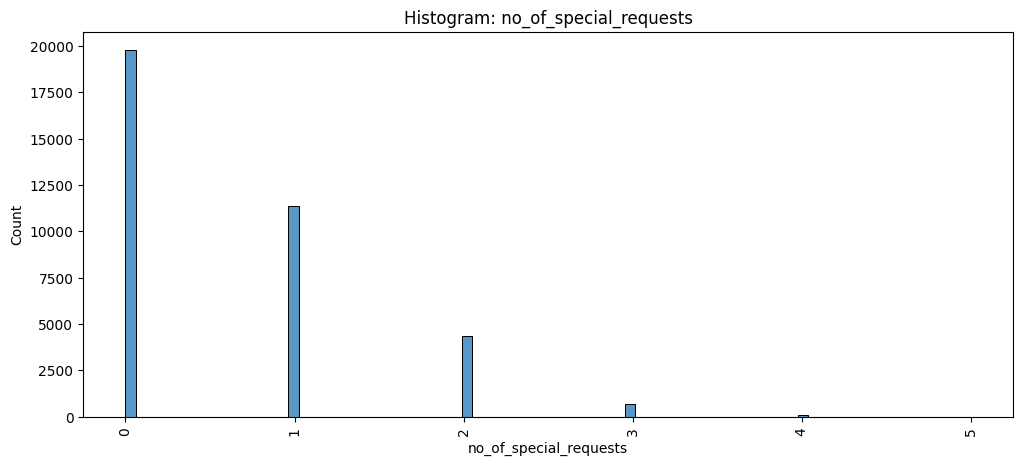

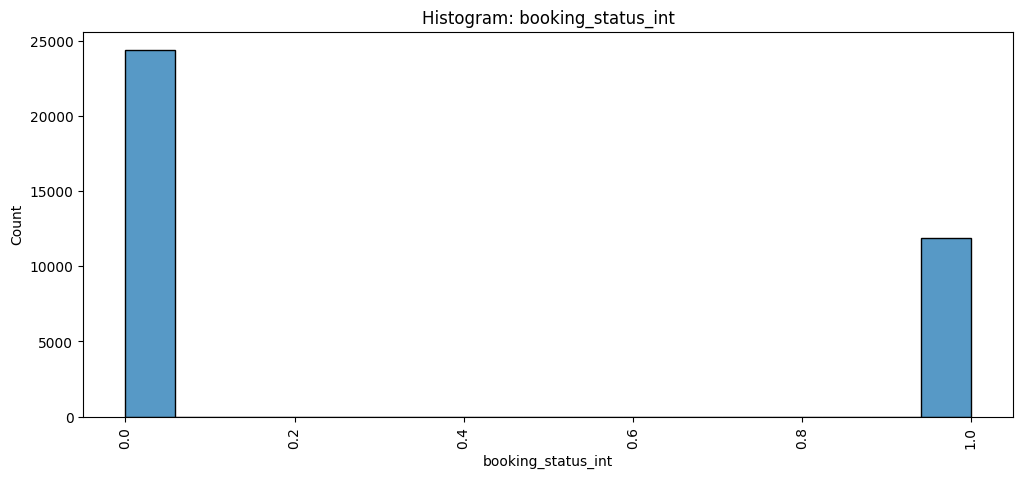

In [ ]:
# Print simple histogram for all numerical columns
for col in list_numcol:
  title = f'Histogram: {col}'
  print_histogram(df_clean, col, 12, 5, title, hue=None)

##Regression Analysis

Now, we are ready to begin our regression activities. During this phase, we will:

*   Examine and address multicollinearity
*   Create training and test datasets
*   Construct and evaluate logistic regression models
*   Determine our final model
*   Build decision tree
*   Evaluate results for final model

We also have to decide what we are targeting in our analysis: fewer false positives, or fewer false negatives? Which one is worst?

Our original objective:

*Analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance...*

In this case:

* **(FN) False Negatives**: Predicting someone WILL NOT cancel a booking, but they actually DO CANCEL. Leads to underbooking. In this case, the room will likely be unbooked and revenue will be lost.
Customer is minimal, but the business will lose money.

* **(FP) False Positives**: Predicting someone WILL CANCEL a booking, but it's actually NOT CANCELED. Leads to overbooking and customer dissatisfaction when customers show up. In this case the company may lose customer and brand loyalty. Given that hospitality is highly subjective to reviews and customer perception, and those drive bookings/revenue, this is also important.

Both of these lead outcomes potentially impact the business, but False Negatives have the most financial impact on the business. In the case of False Positives, overbooking can be addressed by complementary rooms at another time, or partnerships with other nearby properties.

Therefore, we will focus on minimizing false negatives (Recall).

We can also state our null and alternative hypothesis:
* H0: Null Hypothesis: Feature coefficients have zero (no) impact on cancellation rates.
  * H<sub>0</sub>: β1 = 0

* H<sub>A</sub>: Alternative Hypothesis: Feature coefficients have an impact on cancellation rates.
  * H<sub>A</sub>: β1 ≠ 0


###Regression Helpers

These functions below will assist with our regression analysis.

In [ ]:
# Import additional sklearn libraries to evaluate metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve)

In [ ]:
# This  function computes metrics to check performance of a classification model
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,},
        index=[0],
    )

    return df_perf


In [ ]:
# This function plots a confusion_matrix for a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###Create Training and Test Data

In [ ]:
# Split data into test and training sets

# Define independent  and dependent variables
# Target variable: Cancellations
X = df_clean.drop(['booking_status_int'], axis=1)
y = df_clean['booking_status_int']

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# Convert  attributes into float type for modeling
X = X.astype(float)
y = y.astype(float)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
# Look at data shape
print('\nTraining:', X_train.shape)
print('\nData split: Training')
print(X_train.info())

print('\nTest:', X_test.shape)
print('\nData split: Test')

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Training: (25392, 28)

Data split: Training
<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 13662 to 33003
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  float64
 2   no_of_children                        25392 non-null  float64
 3   no_of_weekend_nights                  25392 non-null  float64
 4   no_of_week_nights                     25392 non-null  float64
 5   required_car_parking_space            25392 non-null  float64
 6   lead_time                             25392 non-null  float64
 7   arrival_year                          25392 non-null  float64
 8   arrival_month                         25392 non-null  float64
 9   arrival_date                          25392 non-null  float64
 10  repeated_guest                        

In [ ]:
# Check for NaNs again
print(X_train.isna().sum())

const                                   0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5          0
room_type_reserved_Room_Type 6          0
room_type_reserved_Room_Type 7    

In [ ]:
# Check counts and positive and negative infinity values
inf_count = (df == np.inf).sum().sum()  # Count of positive infinity
neg_inf_count = (df == -np.inf).sum().sum()  # Count of negative infinity

print('X_train count:',X_train.count())
print('X_test count:',X_test.count())
print('y_train count:',y_train.count())
print('y_test count:',y_test.count())

print('Positive infinity count:',inf_count)
print('Negative infinity count:',neg_inf_count)

X_train count: const                                   25392
no_of_adults                            25392
no_of_children                          25392
no_of_weekend_nights                    25392
no_of_week_nights                       25392
required_car_parking_space              25392
lead_time                               25392
arrival_year                            25392
arrival_month                           25392
arrival_date                            25392
repeated_guest                          25392
no_of_previous_cancellations            25392
no_of_previous_bookings_not_canceled    25392
avg_price_per_room                      25392
no_of_special_requests                  25392
type_of_meal_plan_Meal Plan 2           25392
type_of_meal_plan_Meal Plan 3           25392
type_of_meal_plan_Not Selected          25392
room_type_reserved_Room_Type 2          25392
room_type_reserved_Room_Type 3          25392
room_type_reserved_Room_Type 4          25392
room_type_reserved_

In [ ]:
# Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

## Building the Initial Logistic Regression model

In [ ]:
# Fit our regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.3293
Time:                        23:01:43   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

The initial regression results show that we have a few coefficients with high p-values:

* **arrival_date**: 0.801
* **no_of_previous_bookings_not_canceled**: 0.258
* **type_of_meal_plan_Meal Plan 3**: 0.997
* **type_of_meal_plan_Not Selected**: 0.000       0.174       0.382
* **room_type_reserved_Room_Type 3**: 0.999
* **market_segment_type_Complementar**y: 1.000
* **market_segment_type_Online**: 0.112

Next, let's check VIF as well.

Based on results, we will remove these singly and re-run to see if removing each improves p-value.

In [ ]:
# Check VIF

# Initialize an empty list to store VIF values
vif_values = []

# Calculate VIF for each feature and append to the list
for i in range(X_train.shape[1]):
    vif = variance_inflation_factor(X_train.values, i)
    vif_values.append(vif)

# Create a Series with the calculated VIF values
vif_series = pd.Series(vif_values, index=X_train.columns, dtype=float)

# Show with decimal spaces
pd.options.display.float_format = '{:.6f}'.format

# Show VIF dataframe
vif

# Show the results
vif_series

const                                  39468156.706004
no_of_adults                                  1.348154
no_of_children                                1.978229
no_of_weekend_nights                          1.069475
no_of_week_nights                             1.095667
required_car_parking_space                    1.039928
lead_time                                     1.394914
arrival_year                                  1.430830
arrival_month                                 1.275673
arrival_date                                  1.006738
repeated_guest                                1.783516
no_of_previous_cancellations                  1.395689
no_of_previous_bookings_not_canceled          1.651986
avg_price_per_room                            2.050421
no_of_special_requests                        1.247278
type_of_meal_plan_Meal Plan 2                 1.271851
type_of_meal_plan_Meal Plan 3                 1.025216
type_of_meal_plan_Not Selected                1.272183
room_type_

Since market segment type values are all higher than 2, we can safely drop these from our dataset all at once. Later, we will need to do this with the test data if we land on the same dataset.

* market_segment_type_Complementary: .500109
* market_segment_type_Corporate: 16.928435
* market_segment_type_Offline: 64.113924
* market_segment_type_Online: 71.176430

After dropping these features, let's re-run both VIF and the initial regression.

In [ ]:
# Drop market segment
X_train1 = X_train.copy()
X_train1 = X_train1.drop(['market_segment_type_Complementary'], axis=1)
X_train1 = X_train1.drop(['market_segment_type_Corporate'], axis=1)
X_train1 = X_train1.drop(['market_segment_type_Offline'], axis=1)
X_train1 = X_train1.drop(['market_segment_type_Online'], axis=1)

# Make sure we dropped it
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 13662 to 33003
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  float64
 2   no_of_children                        25392 non-null  float64
 3   no_of_weekend_nights                  25392 non-null  float64
 4   no_of_week_nights                     25392 non-null  float64
 5   required_car_parking_space            25392 non-null  float64
 6   lead_time                             25392 non-null  float64
 7   arrival_year                          25392 non-null  float64
 8   arrival_month                         25392 non-null  float64
 9   arrival_date                          25392 non-null  float64
 10  repeated_guest                        25392 non-null  float64
 11  no_of_previous_c

In [ ]:
# Check VIF again

# Initialize an empty list to store VIF values
vif_values1 = []

# Calculate VIF for each feature and append to the list
for i in range(X_train1.shape[1]):
    vif1 = variance_inflation_factor(X_train1.values, i)
    vif_values1.append(vif1)

# Create a Series with the calculated VIF values
vif_series1 = pd.Series(vif_values1, index=X_train1.columns, dtype=float)

# Show with decimal spaces
pd.options.display.float_format = '{:.6f}'.format

# Show VIF dataframe
vif1

# Show the results
vif_series1

const                                  39130383.266049
no_of_adults                                  1.290938
no_of_children                                1.969236
no_of_weekend_nights                          1.055365
no_of_week_nights                             1.086653
required_car_parking_space                    1.035473
lead_time                                     1.331366
arrival_year                                  1.418927
arrival_month                                 1.269681
arrival_date                                  1.005764
repeated_guest                                1.583461
no_of_previous_cancellations                  1.377521
no_of_previous_bookings_not_canceled          1.637018
avg_price_per_room                            1.685514
no_of_special_requests                        1.131005
type_of_meal_plan_Meal Plan 2                 1.202406
type_of_meal_plan_Meal Plan 3                 1.018656
type_of_meal_plan_Not Selected                1.150110
room_type_

In [ ]:
# This function checks VIF and returns new values

def check_VIF(df_temp, colToDrop):
  # Drop column
  df_temp = df_temp.drop([colToDrop], axis=1)

  # Initialize an empty list to store VIF values
  vif_values = []

  # Calculate VIF for each feature and append to the list
  for i in range(df_temp.shape[1]):
      vif = variance_inflation_factor(X_train.values, i)
      vif_values.append(vif)

  # Create a Series with the calculated VIF values
  vif_series1 = pd.Series(vif_values1, index=X_train1.columns, dtype=float)

  # Show with decimal spaces
  pd.options.display.float_format = '{:.6f}'.format

  # Show VIF dataframe
  vif1

  # Show the results
  vif_series1

All values are now below 2, which is acceptable.

In [ ]:
# Fit our regression model again
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2867
Time:                        23:01:45   Log-Likelihood:                -11478.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1255.3849    117.765    -10.660      0.000   -1486.201   -1024.569
no_of_adults                             0.1718      

No changes occurred for our other p-values. We can proceed with eliminating these singly.

In [ ]:
# Delete arrival_date and re-run
# Drop market segment
X_train2 = X_train1.copy()
X_train2 = X_train2.drop(['arrival_date'], axis=1)

# Fit our regression model again
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2867
Time:                        23:01:45   Log-Likelihood:                -11478.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1255.1502    117.784    -10.656      0.000   -1486.002   -1024.298
no_of_adults                             0.1725      

In [ ]:
# Delete no_of_previous_bookings_not_canceled and re-run
# Drop no_of_previous_bookings_not_canceled
X_train3 = X_train2.copy()
X_train3 = X_train3.drop(['no_of_previous_bookings_not_canceled'], axis=1)

# Fit our regression model again
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2866
Time:                        23:01:46   Log-Likelihood:                -11479.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1253.0674    117.799    -10.637      0.000   -1483.949   -1022.186
no_of_adults                       0.1727      0.036      4.863      0.

In [ ]:
# Delete type_of_meal_plan_Meal Plan 3 and re-run
# Drop type_of_meal_plan_Meal Plan 3
X_train4 = X_train3.copy()
X_train4 = X_train4.drop(['type_of_meal_plan_Meal Plan 3'], axis=1)

# Fit our regression model again
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(disp=False)

print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2866
Time:                        23:01:46   Log-Likelihood:                -11480.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1251.1967    117.755    -10.625      0.000   -1481.993   -1020.400
no_of_adults                       0.1727      0.036      4.863      0.

In [ ]:
# Delete room_type_reserved_Room_Type 2 and re-run
# Drop room_type_reserved_Room_Type 2
X_train5 = X_train4.copy()
X_train5 = X_train5.drop(['room_type_reserved_Room_Type 2'], axis=1)

# Fit our regression model again
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2865
Time:                        23:01:46   Log-Likelihood:                -11481.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1249.9939    117.758    -10.615      0.000   -1480.795   -1019.192
no_of_adults                       0.1706      0.035      4.806      0.

In [ ]:
# Delete room_type_reserved_Room_Type 3 and re-run
# Drop room_type_reserved_Room_Type 3
X_train6 = X_train5.copy()
X_train6 = X_train6.drop(['room_type_reserved_Room_Type 3'], axis=1)

# Fit our regression model again
logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit(disp=False)

print(lg6.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2865
Time:                        23:01:47   Log-Likelihood:                -11481.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1249.9927    117.758    -10.615      0.000   -1480.794   -1019.192
no_of_adults                       0.1706      0.035      4.806      0.

In [ ]:
# Delete room_type_reserved_Room_Type 4 and re-run
# Drop room_type_reserved_Room_Type 4
X_train7 = X_train6.copy()
X_train7 = X_train7.drop(['room_type_reserved_Room_Type 4'], axis=1)

# Fit our regression model again
logit7 = sm.Logit(y_train, X_train7.astype(float))
lg7 = logit7.fit(disp=False)

print(lg7.summary())

                           Logit Regression Results                           
Dep. Variable:     booking_status_int   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.2865
Time:                        23:01:47   Log-Likelihood:                -11481.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1250.6913    117.651    -10.630      0.000   -1481.284   -1020.099
no_of_adults                       0.1718      0.034      4.979      0.

All of the p-values are now below our level of statistical significance of .05, and we can proceed with model evaluation.

Our last step is to align our test data schema.

In [ ]:
# Drop our columns on a copy of X_test.
X_test7 = X_test.copy()

X_test7.drop(['arrival_date'], axis=1, inplace=True)
X_test7.drop(['no_of_previous_bookings_not_canceled'], axis=1, inplace=True)
X_test7.drop(['type_of_meal_plan_Meal Plan 3'], axis=1, inplace=True)
X_test7.drop(['room_type_reserved_Room_Type 2'], axis=1, inplace=True)
X_test7.drop(['room_type_reserved_Room_Type 3'], axis=1, inplace=True)
X_test7.drop(['room_type_reserved_Room_Type 4'], axis=1, inplace=True)
X_test7.drop(['market_segment_type_Complementary'], axis=1, inplace=True)
X_test7.drop(['market_segment_type_Online'], axis=1, inplace=True)
X_test7.drop(['market_segment_type_Corporate'], axis=1, inplace=True)
X_test7.drop(['market_segment_type_Offline'], axis=1, inplace=True)

# Make sure they were dropped in both X sets
X_train7.info()
X_test7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 13662 to 33003
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25392 non-null  float64
 1   no_of_adults                    25392 non-null  float64
 2   no_of_children                  25392 non-null  float64
 3   no_of_weekend_nights            25392 non-null  float64
 4   no_of_week_nights               25392 non-null  float64
 5   required_car_parking_space      25392 non-null  float64
 6   lead_time                       25392 non-null  float64
 7   arrival_year                    25392 non-null  float64
 8   arrival_month                   25392 non-null  float64
 9   repeated_guest                  25392 non-null  float64
 10  no_of_previous_cancellations    25392 non-null  float64
 11  avg_price_per_room              25392 non-null  float64
 12  no_of_special_requests          2

## Model performance evaluation

####Coefficients of Odds

Next, let's calculate our coefficients of odds.

We know from above that positive coefficients increase the odds, while negative ones decrease them.

**Positive Coefficients**: These increase the odds of cancellation.

* no_of_adults: 0.1718
* no_of_children: 0.3037
* no_of_weekend_nights: 0.1571
* no_of_week_nights: 0.0660
* lead_time: 0.0136
* arrival_year: 0.6178
* no_of_previous_cancellations: 0.1987
* avg_price_per_room: 0.0230
* type_of_meal_plan_Not Selected: 0.8225

**Negative Coefficients**: These decrease the odds of cancellation.
* required_car_parking_space: -1.3829
* arrival_month: -0.0460
* repeated_guest: -2.4276
* no_of_special_requests: -1.1599
* type_of_meal_plan_Meal Plan 2: -0.3682
* room_type_reserved_Room_Type 5: -0.8803
* room_type_reserved_Room_Type 6: -1.0662
* room_type_reserved_Room_Type 7: -1.7408

In [ ]:
# Convert coefficients to odds using version 7 of our dataset
odds = np.exp(lg7.params)

# finding the percentage change
perc_change_odds = (np.exp(lg7.params) - 1) * 100

# removing limit from number of columns to display
#pd.set_option('display.max_columns', None)

# adding the odds to a dataframe
pd.DataFrame({'Odds': odds, 'Change_odd%': perc_change_odds}, index=X_train7.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.000000      1.187389        1.354821              1.170104   
Change_odd% -100.000000     18.738878       35.482109             17.010444   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.068235                    0.250857   1.013701   
Change_odd%           6.823464                  -74.914298   1.370067   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.854787       0.955043        0.088251   
Change_odd%     85.478659      -4.495686      -91.174870   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.219792            1.023228   
Change_odd%                     21.979237            2.322838   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.313528                       0.691982   
Change_odd%              -68.647223                     -30.801761   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 5  \
Odds                               2.276242                        0.414667   
Change_odd%                      127.624233                      -58.533279   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  
Odds                               0.344309                        0.175381  
Change_odd%                      -65.569067                      -82.461943

Interpreting these coefficients, we can see that repeat customers dominates the odds ratio score.

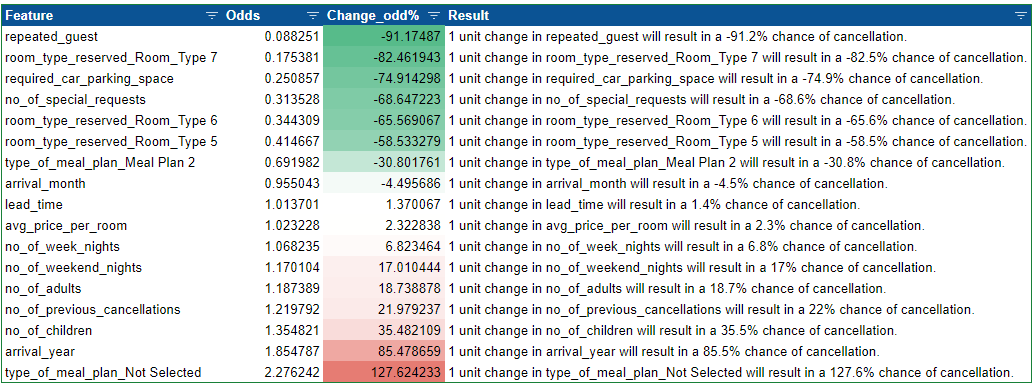

**Training Dataset Performance**

Next, let's generate a confusion matrix so we can examine the training dataset performance.

In [ ]:
# Create a dataframe to hold our results
df_model_results = pd.DataFrame()

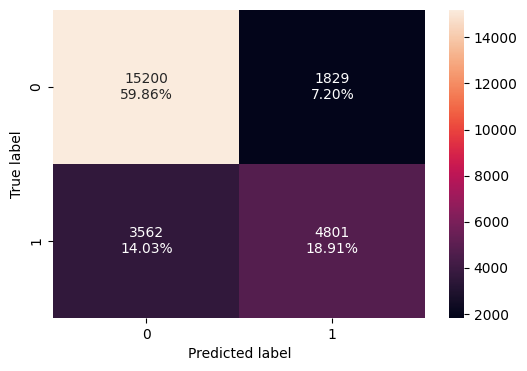

In [ ]:
# Build confusion matrix
confusion_train_1 = confusion_matrix_statsmodels(lg7, X_train7, y_train)
confusion_train_1



In [ ]:
# Calculate model performance on TRAIN data

model_train_perf1 = model_performance_classification_statsmodels(
    lg7, X_train7, y_train
)
print('Training performance:')
model_train_perf1


Training performance:


Accuracy   Recall  Precision       F1
0  0.787689 0.574076   0.724133 0.640432

**Test Dataset Performance**

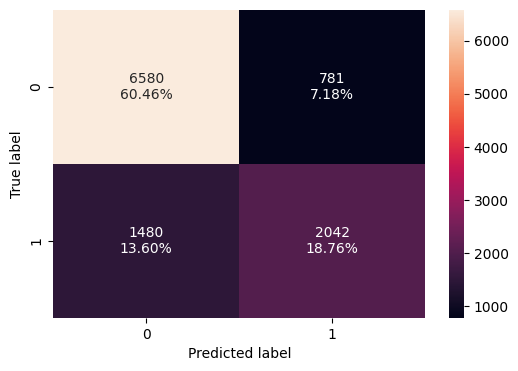

In [ ]:
# Build confusion matrix for TEST data
# Build confusion matrix
confusion_test_1 = confusion_matrix_statsmodels(lg7, X_test7, y_test)
confusion_test_1


In [ ]:
# Calculate model performance on TEST data
model_test_perf1 = model_performance_classification_statsmodels(
    lg7, X_test7, y_test
)

print('Training performance:')
model_test_perf1

Training performance:


Accuracy   Recall  Precision       F1
0  0.792245 0.579784   0.723344 0.643656

Our results are similar for both the training and test sets, for the metric we care most about (Recall, to minimize chance of incorrectly predicting a cancellation).

* Training Recall: .570
* Testing Recall: .579

Since the models performed similarly, we can see it is not an overfitted model.

###Model Improvement

Next, let's see if we can improve the model any by finding a good threshold.
We will take two approaches:

1. Use the ROC-AUC curve and function to find best threshold.
2. Use the precision-recall curve and function to find another potential threshold.

We will take the best result and use it.

###ROC-AUC Curve

**Training Data**

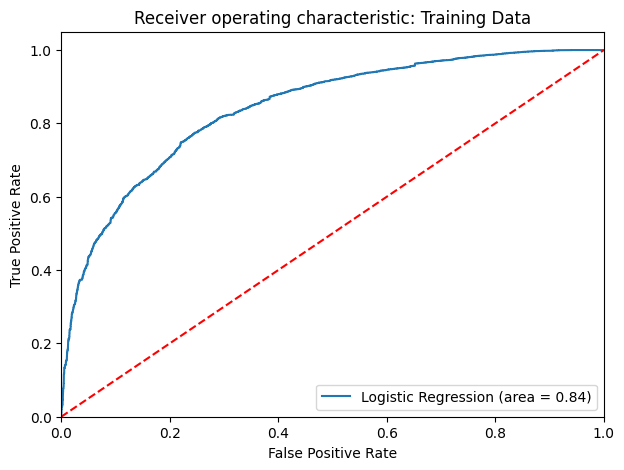

In [ ]:
# Calculate ROC-AUC score: TRAIN
logit_roc_auc_train_1 = roc_auc_score(y_train, lg7.predict(X_train7))

# Get the ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, lg7.predict(X_train7))

# Set up the plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train_1)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Training Data')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate best threshold by using the curve (High TPR, low FPR): TRAIN
# We will denote this as 1 as well
fpr1, tpr1, thresholds1 = roc_curve(y_train, lg7.predict(X_train7))

optimal_idx1 = np.argmax(tpr1 - fpr1)
optimal_threshold1 = thresholds[optimal_idx1]

print('Best Threshold value:',optimal_threshold1)

Best Threshold value: 0.3131113034394255


The area under the curve is large, capturing as many true positive values as possible.

**Training Data**

Now, let's re-run our metrics using the new optimal threshold we found.

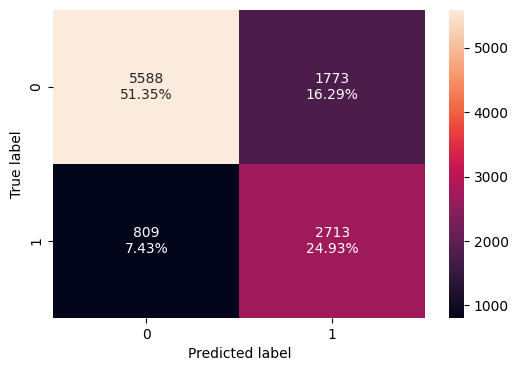

In [ ]:
# Build confusion matrix for TRAIN data
confusion_train_2 = confusion_matrix_statsmodels(lg7, X_test7, y_test, optimal_threshold1)
confusion_train_2


In [ ]:
# Calculate model performance on TRAINING data with new threshold
_model_train_perf2 = model_performance_classification_statsmodels(
    lg7, X_train7, y_train, optimal_threshold1
)

print('Training performance:')
_model_train_perf2

Training performance:


Accuracy   Recall  Precision       F1
0  0.760318 0.774124   0.606691 0.680256

**Test Data**

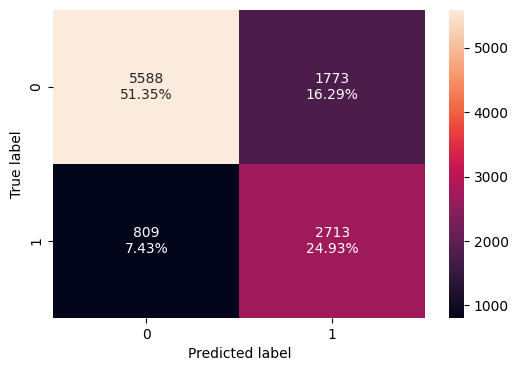

In [ ]:
# Build confusion matrix for TRAIN data
confusion_test_2 = confusion_matrix_statsmodels(lg7, X_test7, y_test, optimal_threshold1)
confusion_test_2


In [ ]:
# Calculate model performance on TEST data with new threshold
model_test_perf2 = model_performance_classification_statsmodels(
    lg7, X_test7, y_test, optimal_threshold1
)

print('Test performance:')
model_test_perf2

Test performance:


Accuracy   Recall  Precision       F1
0  0.762749 0.770301   0.604770 0.677572

The threshold change we made changed the variables as follows:

* **Accuracy**: Slightly decreased
* **Recall**: Increased considerably
* **Precision**: Decreased somewhat
* **F1**: Increased slightly

Let's try a slightly different approach using the precision-recall curve to see if we get a better result.

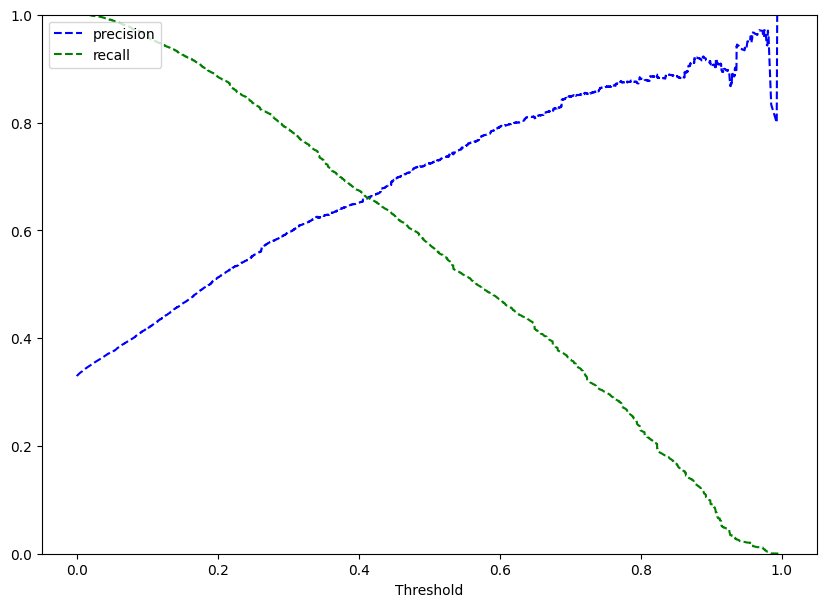

In [ ]:
# Plot recall precision curve

y_scores = lg7.predict(X_train7)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

We can see that precision and recall cross paths at about .40.
Let's try re-running the confusion matrix and ROC-AUC curve with this new threshold value.

**Train**

In [ ]:
# Set new optimal threshold
optimal_threshold2 = .40

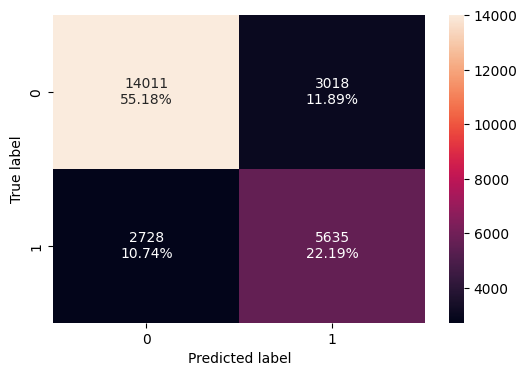

In [ ]:
# Build confusion matrix for TRAIN data
confusion_train_3 = confusion_matrix_statsmodels(lg7, X_train7, y_train, optimal_threshold2)
confusion_train_3


In [ ]:
# Calculate model performance on TRAINING data with new threshold
model_train_perf3 = model_performance_classification_statsmodels(
    lg7, X_train7, y_train, optimal_threshold2
)

print('Training performance:')
model_train_perf3

Training performance:


Accuracy   Recall  Precision       F1
0  0.773708 0.673801   0.651219 0.662318

**Test**

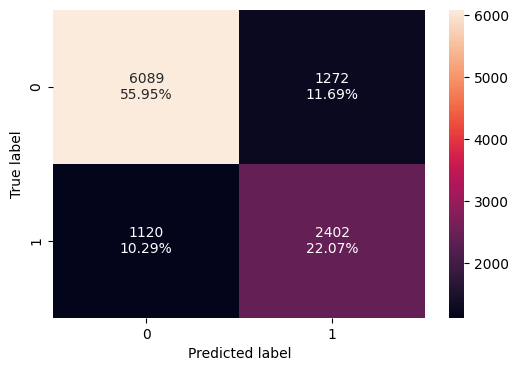

In [ ]:
# Build confusion matrix for TEST data
confusion_test_3 = confusion_matrix_statsmodels(lg7, X_test7, y_test, optimal_threshold2)
confusion_test_3


In [ ]:
# Calculate model performance on TRAINING data with new threshold
model_test_perf3 = model_performance_classification_statsmodels(
    lg7, X_train7, y_train, optimal_threshold2
)

print('Test performance:')
model_test_perf3

Test performance:


Accuracy   Recall  Precision       F1
0  0.773708 0.673801   0.651219 0.662318

###Model Summary

We tried three approaches:
* no defined threshold
* .313 threshold
* .400 threshold

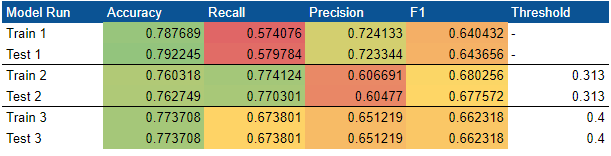

Out of the three approaches (no defined threshold, .313 and .400), the .313 one had the best impact.
* Even though .400 decreased accuracy slightly, it yielded a better F1 score.
* It also increased Recall by nearly .20, while maintaining accuracy.
* We care most about Recall (False Negatives) because this minimizes the changes of lost revenue (incorrectly predicting a cancellation as false, when in reality it is true).

Therefore, we will use .313 in **model_test_perf3**.

We can also see that this threshold keeps our training and testing data metrics within close proximity, which is what we want to see.

##Decision Tree Analysis

Let's approach the problem from a decision tree model standpoint.

In [ ]:
# Libraries for modeling the decision tree

# For building prediction models
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
# For tuning models
from sklearn.model_selection import GridSearchCV

# For calculating model metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)



In [ ]:
# Get column (feature) names
column_names = list(X_train7.columns)
feature_names = column_names
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7']


###Build Decision Tree Model

In [ ]:
# Create the decision tree model
model0 = DecisionTreeClassifier(criterion='entropy', random_state=1)
model0.fit(X_train7, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

###Check Model Performance

**Train**

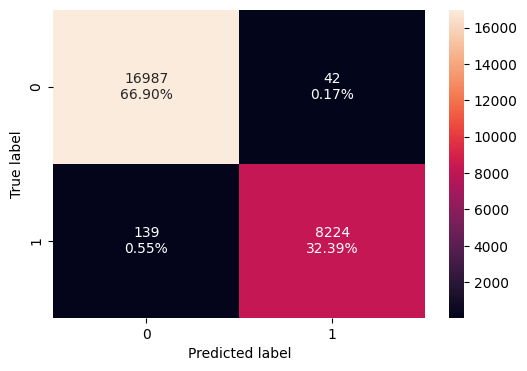

In [ ]:
# Build confusion matrix for TRAIN data
confusion_train_model0 = confusion_matrix_statsmodels(model0, X_train7, y_train, optimal_threshold2)
confusion_train_model0


In [ ]:
# Calculate model performance on TRAINING data with new threshold
decision_tree_perf_train_model0 = model_performance_classification_statsmodels(
    model0, X_train7, y_train, optimal_threshold2
)

print('Training performance:')
decision_tree_perf_train_model0

Training performance:


Accuracy   Recall  Precision       F1
0  0.992872 0.983379   0.994919 0.989115

**Test**

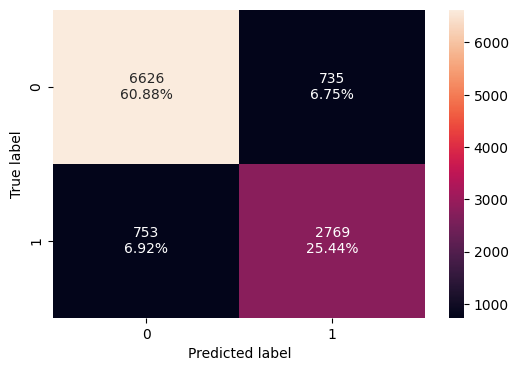

In [ ]:
# Build confusion matrix for TRAIN data
confusion_test_model0 = confusion_matrix_statsmodels(model0, X_test7, y_test, optimal_threshold2)
confusion_test_model0


In [ ]:
# Calculate model performance on TEST data with new threshold
decision_tree_perf_test_model0 = model_performance_classification_statsmodels(
    model0, X_test7, y_test, optimal_threshold2
)

print('Test performance:')
decision_tree_perf_test_model0

Test performance:


Accuracy   Recall  Precision       F1
0  0.863273 0.786201   0.790240 0.788215

**OBSERVATION**

* Training metrics were very good for Recall (.98) and false negatives (.55%).
* The test metrics improved some, but still aren't as good as the training metrics with Recall (.78) and false negatives (6.92%).
* Our model is likely overfitted, and we need to do more work.

###Pre-Pruning

One way to improve the model is to run a cross-validation grid search and come up with the best estimators to use as we tune our hyperparameters.

Before we undertake this, let's look at the importance of certain features.

####Feature Importance

 Here, we will evaluate the importance of each feature in the model.

In [ ]:
# Evaluate feature importance
importances = model0.feature_importances_
importances

array([0.00000000e+00, 3.48965079e-02, 7.69906322e-03, 4.00864982e-02,
       6.76039434e-02, 6.90761975e-03, 3.60102527e-01, 2.11717593e-02,
       9.82225712e-02, 3.66443302e-03, 0.00000000e+00, 2.53083989e-01,
       7.48348753e-02, 7.70616807e-03, 1.94071755e-02, 3.34959263e-03,
       1.02612660e-03, 2.37149519e-04])

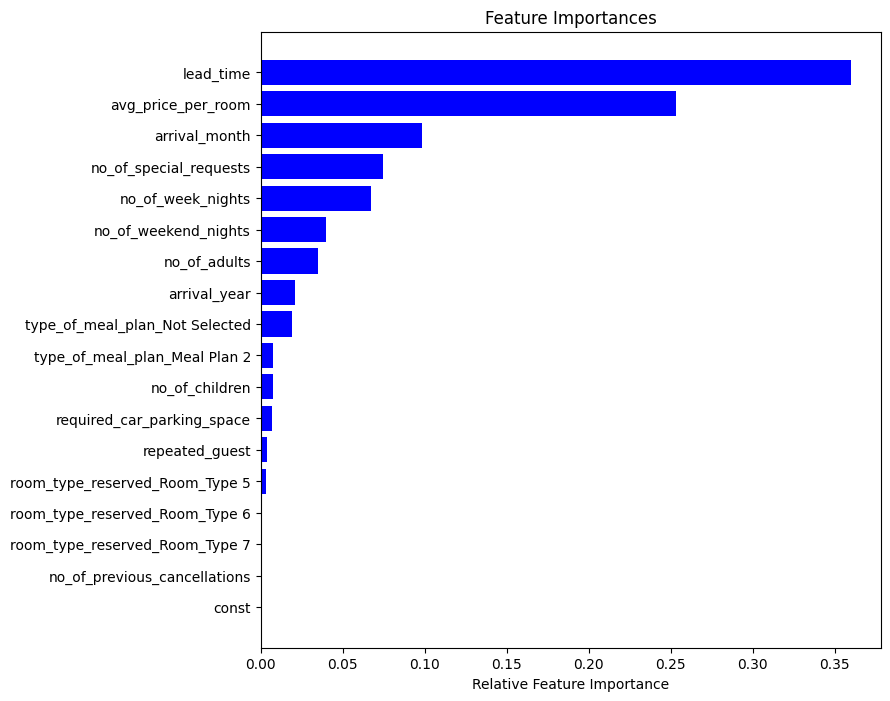

In [ ]:
# Feature importances can be mapped on a barchart to illustrate their weight

feature_names = list(X_train7.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Feature Importance')
plt.show()

**OBSERVATION**

* Lead time is by far the most important feature. We saw that lead time has a high impact on cancellations during our bivariate analysis.
* Number of special requests and average price per room were detected as important as well, but to a lesser extent.
* Surprisingly, repeat customers is not listed here, although we found earlier that repeat customers are far less likely to cancel a room. Perhaps this decision tree model cannot detect that complex relationship.  

####Cross-Validation Grid Search

Let's start by finding the best hyperparameters for our model. As part of this, we will also include a cost complexity parameter to combine a more thorough tree branch search and emit alphas.

Once we run this the first time, we can determine which parameters work best for simplifying our model.


In [ ]:
# Pre-pruning: We will start with the normal standard parameters and tune them later

# Choose the type of classifier (our model)
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from (our dictionary)
# For the initial cross-validation grid search, we will run with some potential hyperparameter values to find the best ones
parameters = {
    'class_weight': [None, 'balanced'],     # Industry-recommended values for now
    'criterion': ['entropy', 'gini'],       # - gini or entropy
    'max_depth': np.arange(2, 7, 2),        # - depth of the tree
    'max_leaf_nodes': [50, 75, 150, 250],   # - maximum number of leaf nodes
    'min_samples_split': [10, 30, 50, 70],  # - how many buckets of data to split into
    'splitter': ['best', 'random'],         # - how to split up the data
    'min_impurity_decrease': [0.0001, 0.001, 0.01], # minimum decrease per split in impurity
    'ccp_alpha': [0.01, 0.1, 1]             # alpha parameters for cost complexity pruning
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train7, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train7, y_train)

# The result below tells you what parameters to use to maximize the score.

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_leaf_nodes=50,
                       min_impurity_decrease=0.0001, min_samples_split=10,
                       random_state=1)

The outcome of the first run recommended:

* class_weight: balanced
* criterion: entropy
* max_depth: 2
* max_leaf_nodes:50
* min_impurity_decrease: 0.0001
* min_samples_split: 10
* random_state: 1
* ccp_alpha: .01

Let's see how the initial model pruning impacted metrics.

**Train**

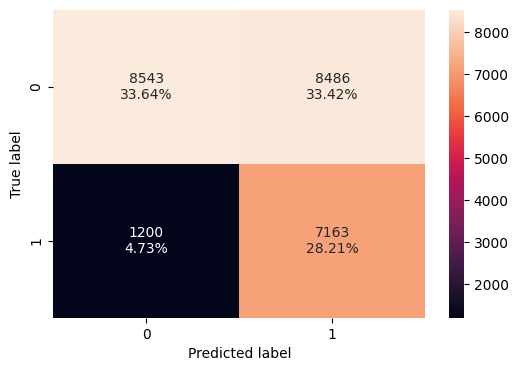

In [ ]:
# Build confusion matrix for TRAIN data
confusion_train_estimator = confusion_matrix_statsmodels(estimator, X_train7, y_train, optimal_threshold2)
confusion_train_estimator


In [ ]:
# Calculate model performance on TRAINING data with new threshold
decision_tree_perf_train_estimator = model_performance_classification_statsmodels(
    estimator, X_train7, y_train, optimal_threshold2
)

print('Training performance:')
decision_tree_perf_train_estimator

Training performance:


Accuracy   Recall  Precision       F1
0  0.618541 0.856511   0.457729 0.596618

**Test**


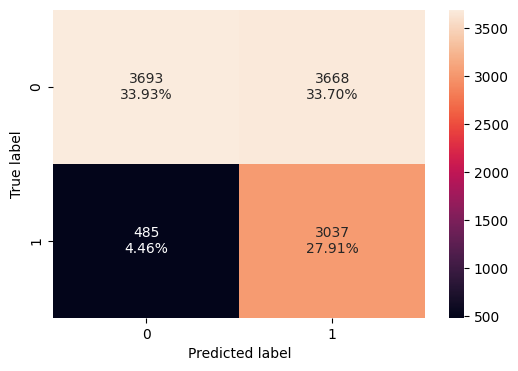

In [ ]:
# Build confusion matrix for TEST data
confusion_test_estimator = confusion_matrix_statsmodels(estimator, X_test7, y_test, optimal_threshold2)
confusion_test_estimator


In [ ]:
# Calculate model performance on TEST data with new threshold
decision_tree_perf_test_estimator = model_performance_classification_statsmodels(
    estimator, X_test7, y_test, optimal_threshold2
)

print('Training performance:')
decision_tree_perf_test_estimator

Training performance:


Accuracy   Recall  Precision       F1
0  0.618396 0.862294   0.452946 0.593918

**OBSERVATIONS**

The estimated model performs better. Even though the training metrics dropped, the test metrics went up. Now, our Recall for training (.85) and test (.86) are nearly identical.

####Estimated Decision Tree Visualization

Let's now visualize the estimated decision tree so we can see if we need to make additional decisions about pruning it to reduce model complexity and overfitting.

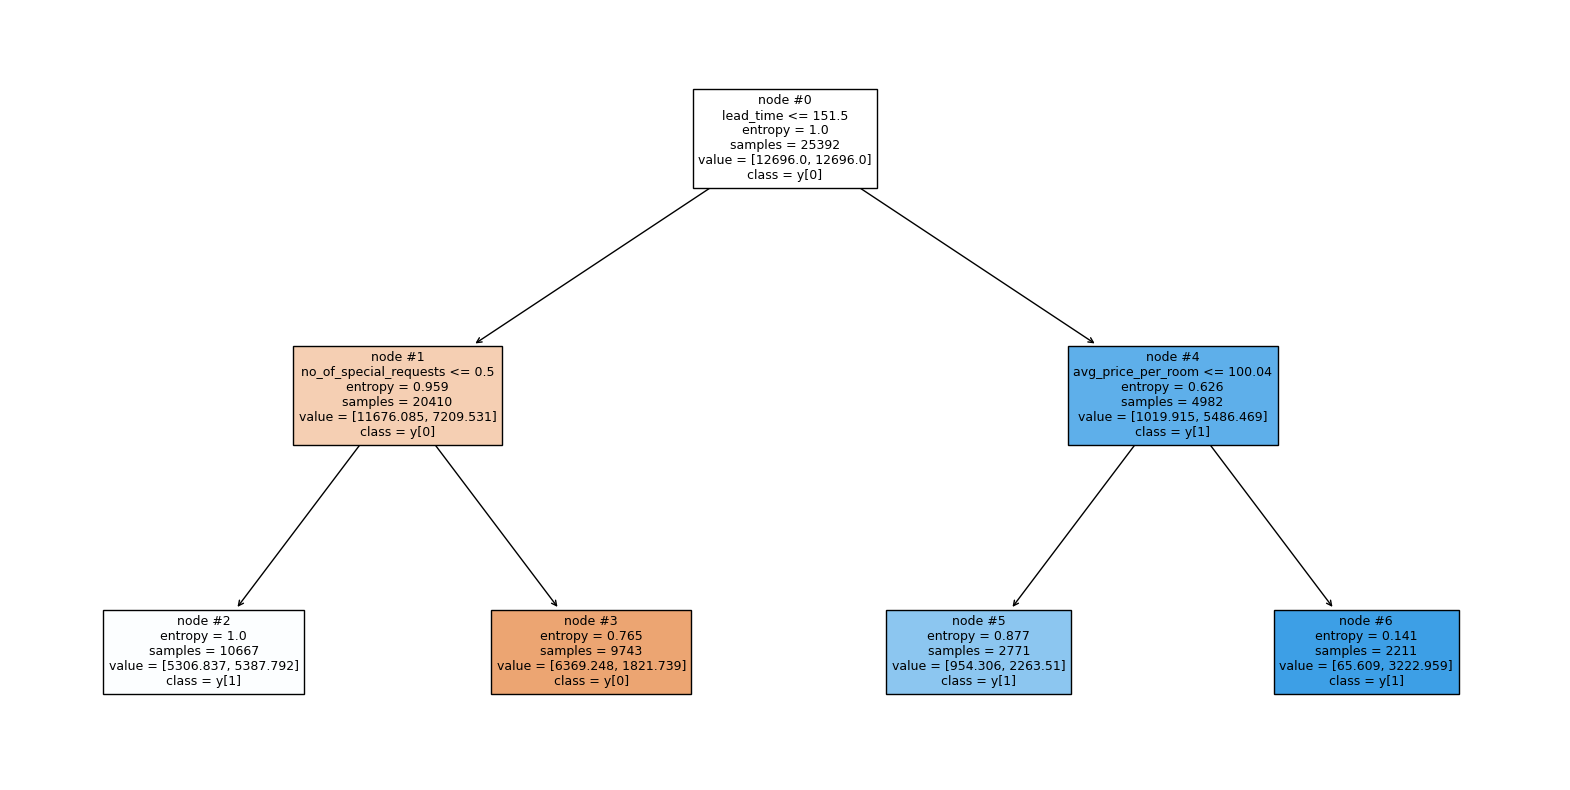

In [ ]:
# Plot the estimated decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Show the base model tree as indented text
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1.0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0.0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1.0
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1.0



####Hyperparameter Tuning

We can further tune the model by applying recommended hyperparameter settings and re-running the model.

In [ ]:
# Re-run with tuned parameters recommended by the outcome of the first run:

# class_weight: balanced
# criterion: entropy
# max_depth: 2
# max_leaf_nodes:50
# min_impurity_decrease: 0.0001
# min_samples_split: 10
# random_state: 1
# ccp_alpha: .01

# Choose the type of classifier (our model)
model1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters recommended
parameters = {
    'class_weight': ['balanced'],
    'criterion': ['entropy'],
    'max_depth': [2],
    'max_leaf_nodes': [50],
    'min_samples_split': [10],
    'splitter': ['best'],
    'min_impurity_decrease': [0.0001],
    'ccp_alpha': [0.01]
    }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(model1, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train7, y_train)

# Set the model to the best combination of parameters
model1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model1.fit(X_train7, y_train)


DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_leaf_nodes=50,
                       min_impurity_decrease=0.0001, min_samples_split=10,
                       random_state=1)

**Train**

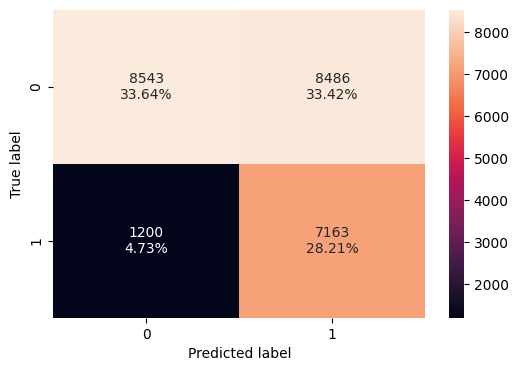

In [ ]:
# Now we need to use the new model on training data and check confusion matrix and also the new accuracy, prediction, recall and F1 score.
confusion_matrix_statsmodels(model1, X_train7, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_statsmodels(
    model1, X_train7, y_train, optimal_threshold2
)
decision_tree_perf_train

print('Decision Tree: Train performance:')
decision_tree_perf_train


Decision Tree: Train performance:


Accuracy   Recall  Precision       F1
0  0.618541 0.856511   0.457729 0.596618

**Test**

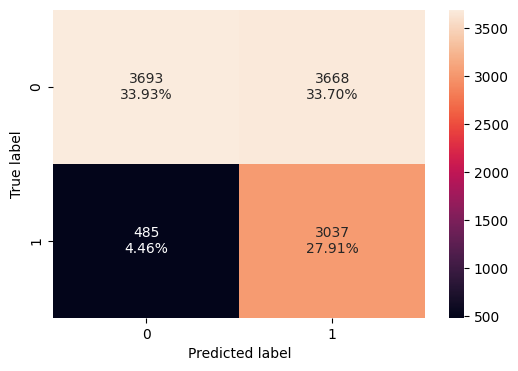

In [ ]:
# Now we need to use the new model on test data and check confusion matrix and also the new accuracy, prediction, recall and F1 score.
confusion_matrix_statsmodels(model1, X_test7, y_test)

In [ ]:
# Assess the model on the test data
decision_tree_perf_test = model_performance_classification_statsmodels(
    model1, X_test7, y_test, optimal_threshold2
)
decision_tree_perf_test

print('Decision Tree: Test performance:')
decision_tree_perf_test


Decision Tree: Test performance:


Accuracy   Recall  Precision       F1
0  0.618396 0.862294   0.452946 0.593918

**OBSERVATION**


**OBSERVATION**

* The tuned model is very close to the estimated one, with only a slight variation in F1 score. We will use this one moving forward.
* Running the decision tree model with the recommended hyperparameters and our threshold found during logistic regression gives us an increase in all categories in our training data.
* We see a smaller increase in our test data metrics as well, and they remain close to our training data metrics.
* Using the estimator results, we have reduced the number of False Negatives to near 5% for training and testing data, but increased the False Positives to 33%.
* However, because the revenue impact of false negatives is more important, this is quite an acceptable error rate.

###Pruning

Let's run a cost complexity algorithm and look at the alpha results for the model.

####Cost Complexity

In [ ]:
# Run cost complexity on our model.
model_classification_tree = DecisionTreeClassifier(random_state=1, class_weight='balanced')

prunepath = model_classification_tree.cost_complexity_pruning_path(X_train7, y_train)
ccp_alphas, impurities = abs(prunepath.ccp_alphas), prunepath.impurities


####Alpha vs. Impurity

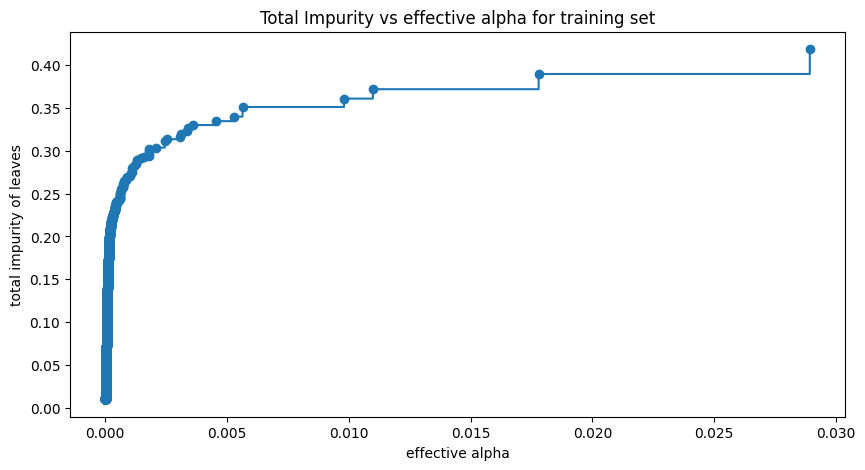

In [ ]:
# Plot the alpha/impurity
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

###Post-Pruning

Now that the tree is simplified and we have our set of alpha data, let's train the models and verify our best alpha value.

####Training the Decision Tree

In [ ]:
# Train the decision tree with the best alpha
model_classification_tree_results = []
for ccp_alpha in ccp_alphas:
    tree_result = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
    tree_result.fit(X_train7, y_train)
    model_classification_tree_results.append(tree_result)
print(
    'Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
        model_classification_tree_results[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


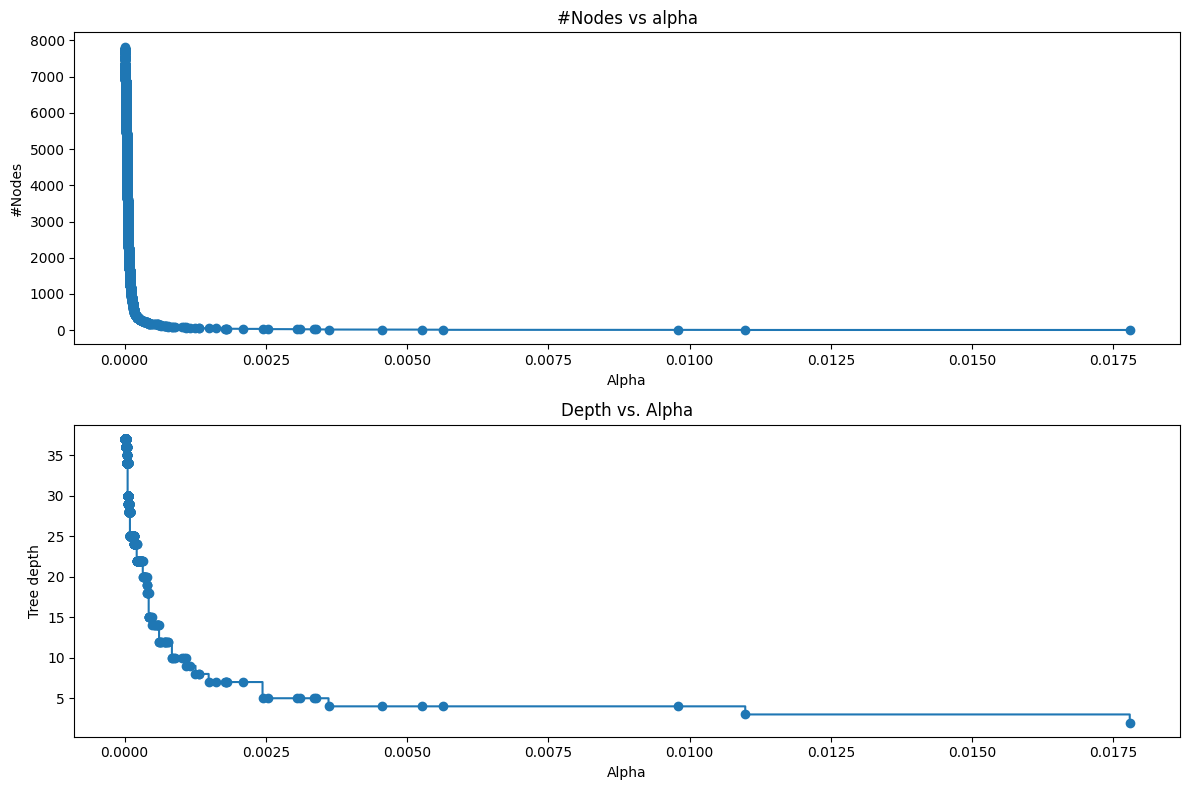

In [ ]:
# Remove the trivial root node
model_classification_tree_results = model_classification_tree_results[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree_result.tree_.node_count for tree_result in model_classification_tree_results]
depth = [tree_result.tree_.max_depth for tree_result in model_classification_tree_results]

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('#Nodes')
ax[0].set_title('#Nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Tree depth')
ax[1].set_title('Depth vs. Alpha')
fig.tight_layout()

We care most about Recall, so let's plot this vs. Alpha, for both training and test datasets.

In [ ]:
# Get training recall performance for each alpha
recall_train = []
for tree_result in model_classification_tree_results:
    pred_train = tree_result.predict(X_train7)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
# Get test recall performance for each alpha
recall_test = []
for tree_result in model_classification_tree_results:
    pred_test = tree_result.predict(X_test7)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

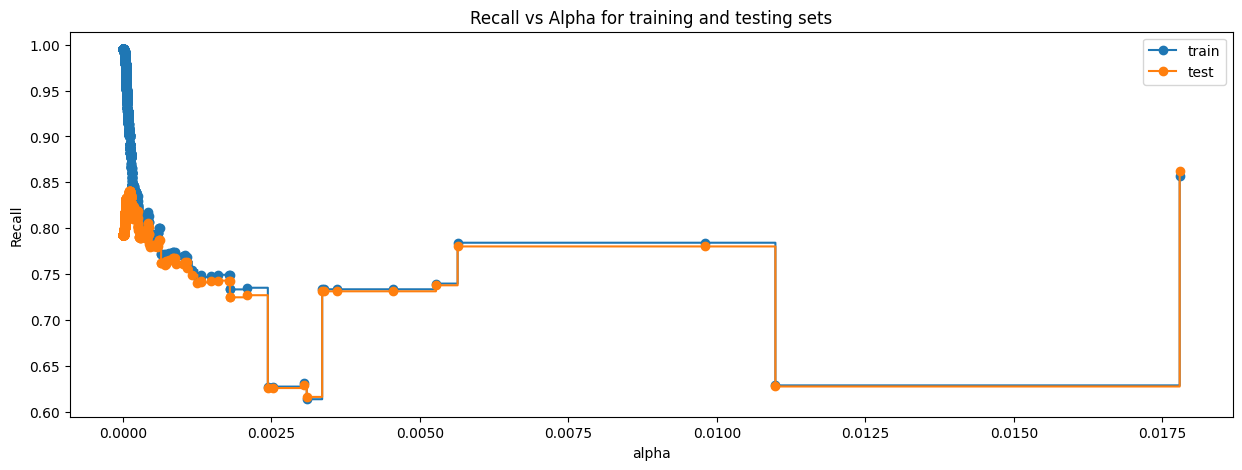

In [ ]:
# Plot them both
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs Alpha for training and testing sets')
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

#####Final Model Testing

In [ ]:
# Create final model with highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = model_classification_tree_results[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01779185293061436, class_weight='balanced',
                       random_state=1)


**Train: Best Model**

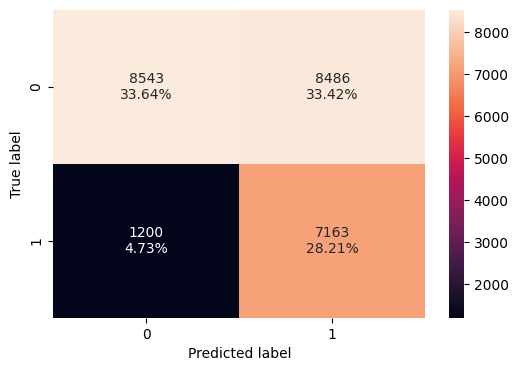

In [ ]:
# Plot the new confusion matrix using our optimal_threshold2
confusion_matrix_statsmodels(best_model, X_train7, y_train, optimal_threshold2)

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_statsmodels(
    best_model, X_train7, y_train
)
decision_tree_postpruned_perf_train

Accuracy   Recall  Precision       F1
0  0.618541 0.856511   0.457729 0.596618

**Test: Best Model**

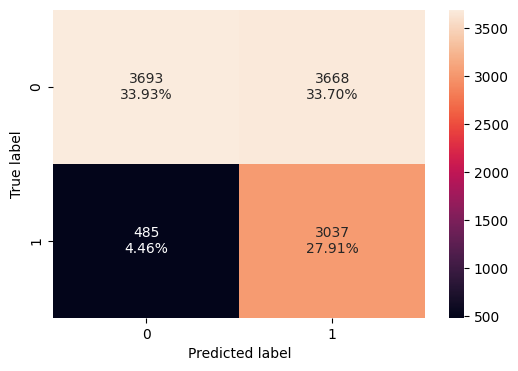

In [ ]:
confusion_matrix_statsmodels(best_model, X_test7, y_test, optimal_threshold2)

In [ ]:
decision_tree_post_test = model_performance_classification_statsmodels(
    best_model, X_test7, y_test
)
decision_tree_post_test

Accuracy   Recall  Precision       F1
0  0.618396 0.862294   0.452946 0.593918

#####Final Model: Decision Tree

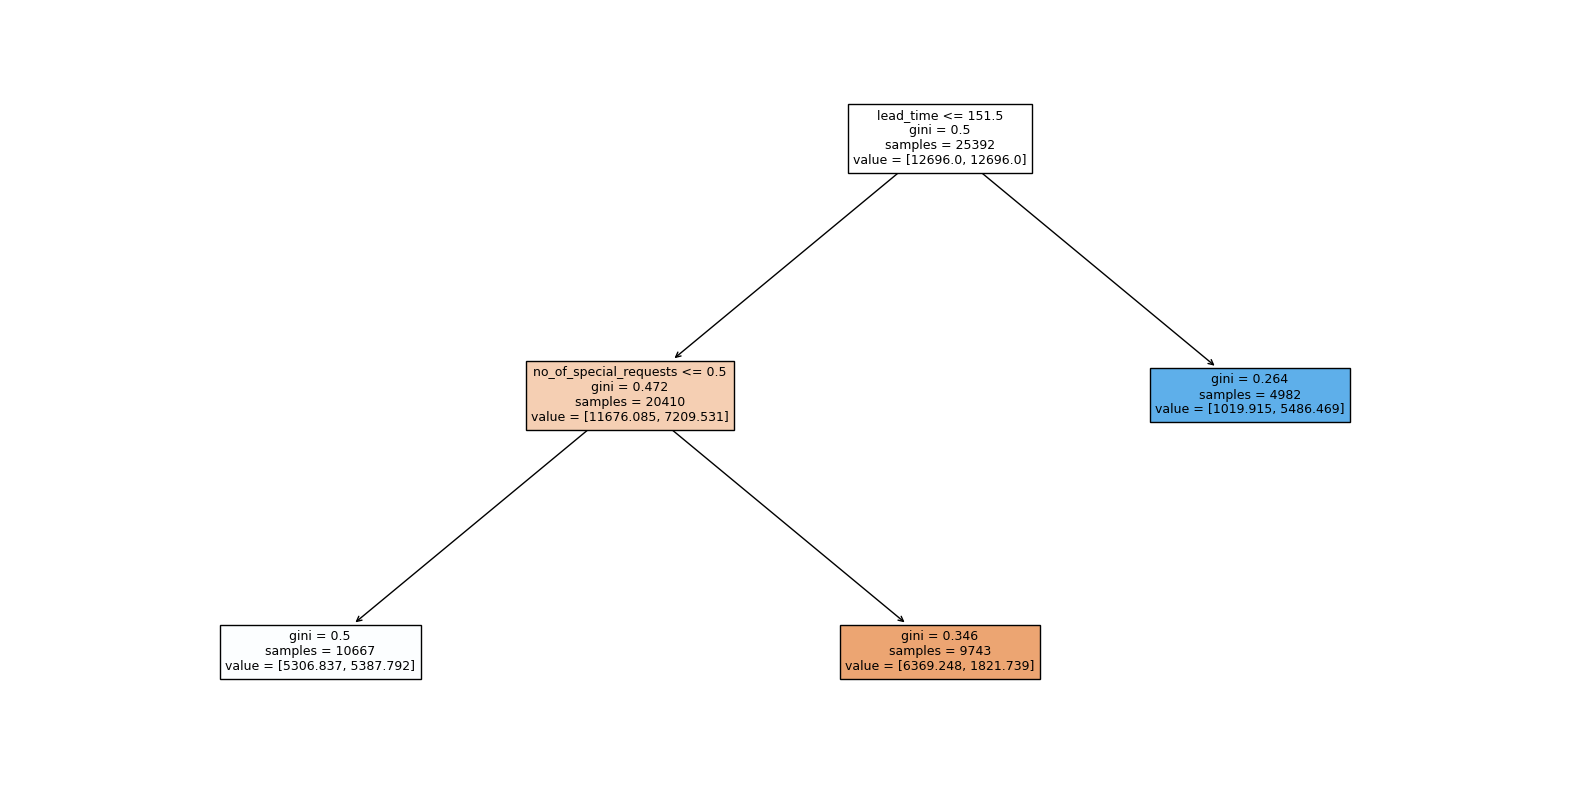

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1.0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0.0
|--- lead_time >  151.50
|   |--- weights: [1019.91, 5486.47] class: 1.0



### Model Performance Comparison and Conclusions

Finally, we can compare the results of the logistic regression and decision tree models.

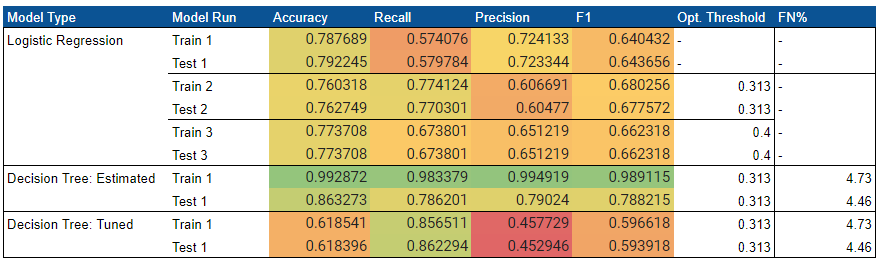

####Logistic Regression Summary

In the logistic regression, we modified the model twice to pare down  features and identify the best threshold for our analysis.

In that model, the final best Recall score was still much lower than what we found with our post-pruned decision tree.

####Decision Tree Summary

In the estimated decision tree, even though we used the identified threshold, the model was clearly overfitted. The training metrics were nearly perfect, and even though the test metrics also improved, we can observe a large gap in values.

Because we are prioritizing Recall, we care most about the False Negative rates and therefore Recall. The final post-pruned model provides a high Recall value (.85 for training data, and .86 for test data) and performed nearly identically when trained on both datasets.

For this reason, we should use the post-pruned model listed above, with the optimal threshold identified during the logistic regression.

The features identified in the decision tree to minimize impurity were:
* lead_time
* no_of_special_requests

## Actionable Insights and Recommendations

Based on the provided data, we can see that about a third of all bookings result in cancellations currently:

* Not_Canceled: 67%
* Canceled: 33%

From a revenue perspective, the losses are considerable.

* Total Revenue: 3,751,689 EUR
* Revenue loss due to cancellations: 1,314,362 EUR (35% of all revenue)
  * Canceled: 1,314,362 EUR
  * Not Canceled: 2,437,327 EUR

As the result of our analysis, we can convey some key insights and recommendations for the company moving forward in the effort to reduce these losses due to cancellations.

###Predictive Model

During our analysis, we tried two different regression approaches: Logistic regression and a Decision Tree. Ultimately, the decision tree with cost complexity and our logistic regression optimal threshold yielded the best result.

The analysis focused on reducing the chances of falsely predicting a cancellation, when in fact no cancellation occurs. Therefore, the targeted metric for the analysis was False Negatives (Recall).

Our final model based on Recall should be able to predict cancellations with just a 4.46% standard error rate, within the standard 95% confidence interval. It performed very well on both our training and test datasets, and should be applied to production data in order to more accurately predict cancellations and reduce the large revenue loss due to cancellations.

###Insights

**Lead Time**

* In both analyses, we found that lead time is one of the critical leading indicators for cancellations.
  * The longer the lead time, the more likely the cancellation.
  * Bookings with lead times less than 4 months have less likelihood of cancelling, and 50% of cancellations occur for lead times longer than this.

**Arrival Month**
* Even though most bookings occur in October, most cancellations occur in the summer. This aligns with long lead times (more than 6 months) and cancellations.
  * June: 68
  * July: 82%
  * August: 68%

**Repeat Customers**
* A key relationship exists between customers and whether or not they've canceled a prior reservation.
* On average, repeat guests have made approximately 6 to 7 prior bookings.
* Out of 36,275 bookings, only 930 were booked by repeat guests (2.56%).
  * 16 of those 930 repeat customer bookings were canceled (1.72% of all bookings total).
Prior cancellations in conjunction with repeat customers appears to have a critical relationship:
  * Only 12% of bookings are cancelled by repeat customers who have no prior  cancellations (about 1 in 5 cancellations).
  * By contrast, 72% of the canceled bookings were from repeat customers who have canceled in the past (about 4 of every 5 cancellations).

* All other features held constant, repeat customers who have not canceled in the past are the least likely to cancel overall (-91.4% less likely to cancel, if they have never canceled, all other factors equal).

**Special Requests**

* Bookings with 1 or 2 special requests are less likely to get canceled, and a special request, all other features held constant, reduces the chance of cancellation by nearly 67%.

**Children**

* Bookings with children have a higher chance of getting canceled.

* All other features constant, increasing the count of children increases the chance of cancellation by about 35%.

### Recommendations

**Data Collection**

* Although we have information about booking lead times, We lack data about when cancellations were made. This could be useful in understanding proximity of the cancellation date to the arrival date.
* We do not have information about WHY a booking was canceled. Having this level of detail would be helpful in understand what scenarios can lead to cancellations.
* We also do not have information about repeat bookings by location, which would be useful to understand.

#### Cancellation Reduction Strategies

**Repeat Customers**

* Since price does not appear to impact cancellations, properties could dynamically price bookings higher for repeat customers who have canceled before.

* Similarly, properties could offer "loyal customer" discounts for repeat customers who have no prior cancellations, or no more than one.

**Confirmation System**

* If the properties do not have a confirmation system, the company should consider putting one in place.

* Proactively confirming reservations with guests before the time of their arrival will help ensure that properties are informed sooner.

**Cancellation Rules**

* The properties should require reasons for cancellations, and also perhaps follow up with surveys to gather more details from customers.

* The business could also adopt a stricter cancellation policy:
  * Apply cancellation fees.
  * Limit the allowable timeline for cancellations.
  * Limit refunds for cancellationss. If customers are more likely to lose their deposit or prepayment, they may be less likely to cancel.

* Limit the lead time by which customers can book a property to 180 days (just under the 50% median for cancellations by lead time). This can potentially eliminate nearly half of all cancellations.

* Because cancellations can still often occur last minute, the company should partner with a last-minute booking system oneline, or a marketing-based initiative to rent properties available at the last minute. Even if the properties are discounted, this could cut down on any lost revenue.

## Export Notebook to HTML

In [ ]:
# Create an HTML version of this notebook - do this last
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA//4-Supervised Machine Learning Classification/Project 4/Project_SLC_DSBA_INNHotels_FullCode_Tuesday_Frase.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA//4-Supervised Machine Learning Classification/Project 4/Project_SLC_DSBA_INNHotels_FullCode_Tuesday_Frase.ipynb to html
[NbConvertApp] Writing 5039899 bytes to /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/4-Supervised Machine Learning Classification/Project 4/Project_SLC_DSBA_INNHotels_FullCode_Tuesday_Frase.html
